The goal of the project is to predict the failure of a water pump that experienced frequent failures during the spring and summer of 2018.

The dataset for this project was collected from the pump and consists of 52 sensors that measure various physical properties of the system.

## Import libraries

In [45]:
# Loading dataset and numpy
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime

# Missing data imputation
from feature_engine.imputation import RandomSampleImputer

# Pipeline and training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Feature selection
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
from sklearn.feature_selection import VarianceThreshold

# Feature magnitude
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, 
    confusion_matrix,
    recall_score, 
    f1_score,
    precision_score,
    recall_score
)

# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Libraries for Deep learning model

from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


# Keras tuner
from kerastuner.tuners import RandomSearch, Hyperband

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset from local .csv file.

data = pd.read_csv('../all_datasets/sensor_TP.csv')

In [3]:
data.head()

Unnamed: 0         timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
0           0  2018-04-01 00:00   2.465394   47.09201    53.2118  46.310760   
1           1  2018-04-01 00:01   2.465394   47.09201    53.2118  46.310760   
2           2  2018-04-01 00:02   2.444734   47.35243    53.2118  46.397570   
3           3  2018-04-01 00:03   2.460474   47.09201    53.1684  46.397568   
4           4  2018-04-01 00:04   2.445718   47.13541    53.2118  46.397568   

   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   
1   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   
2   638.8889   73.54598   13.32465   16.03733   15.61777   15.01013   
3   628.1250   76.98898   13.31742   16.24711   15.69734   15.08247   
4   636.4583   76.58897   13.35359   16.21094   15.69734   15.08247   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0   37.22740   47.52422   31.11716   1.681353   419.5747        NaN   
1   37.22740   47.52422   31.11716   1.681353   419.5747        NaN   
2   37.86777   48.17723   32.08894   1.708474   420.8480        NaN   
3   38.57977   48.65607   31.67221   1.579427   420.7494        NaN   
4   39.48939   49.06298   31.95202   1.683831   419.8926        NaN   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  \
0   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   
1   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   
2   462.7798   459.6364   2.500062   666.2234   399.9418   880.4237   
3   462.8980   460.8858   2.509521   666.0114   399.1046   878.8917   
4   461.4906   468.2206   2.604785   663.2111   400.5426   882.5874   

   sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  sensor_27  \
0   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   
1   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   
2   501.3617   982.7342   631.1326   740.8031   849.8997   454.2390   
3   499.0430   977.7520   625.4076   739.2722   847.7579   474.8731   
4   498.5383   979.5755   627.1830   737.6033   846.9182   408.8159   

   sensor_28  sensor_29  sensor_30  sensor_31  sensor_32  sensor_33  \
0   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   
1   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   
2   778.5734   715.6266   661.5740   721.8750   694.7721   441.2635   
3   779.5091   690.4011   686.1111   754.6875   683.3831   446.2493   
4   785.2307   704.6937   631.4814   766.1458   702.4431   433.9081   

   sensor_34  sensor_35  sensor_36  sensor_37  sensor_38  sensor_39  \
0   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   
1   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   
2   169.9820   343.1955   200.9694   93.90508   41.40625   31.25000   
3   166.4987   343.9586   193.1689  101.04060   41.92708   31.51042   
4   164.7498   339.9630   193.8770  101.70380   42.70833   31.51042   

   sensor_40  sensor_41  sensor_42  sensor_43  sensor_44  sensor_45  \
0   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   
1   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   
2   69.53125   30.46875  31.770830   41.66666  39.351852   65.39352   
3   72.13541   30.46875  31.510420   40.88541  39.062500   64.81481   
4   76.82291   30.98958  31.510420   41.40625  38.773150   65.10416   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
0   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
1   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
2   51.21528  38.194443   155.9606   67.12963   241.3194   203.7037   
3   51.21528  38.194440   155.9606   66.84028   240.4514   203.1250   
4   51.79398  38.773150   158.2755   66.55093   242.1875   201.3889   

  machine_status  
0         NORMAL  
1         NORMAL  
2         NORMAL  
3         NORMAL  
4         NORMAL

In [4]:
data.shape

(220320, 55)

## Step 2. Data analysis

### Functions

In [5]:
# Function to show missing data
def missing_data_plot(df):
    data.isnull().mean().plot.bar(figsize = (12, 6))
    plt.ylabel("Missing values")
    plt.xlabel('Features')
    plt.title("Missing Data Analysis")
    plt.show()

# Function to show the distribution of variable
def value_counts_plot(df, variable):
    counts = df[variable].value_counts().rename_axis(variable).reset_index(name = 'count')

    ax = sns.barplot(x = variable, y = 'count', data = counts)
    ax.bar_label(ax.containers[0])
    plt.title('Value counts of {}'.format(variable))
    plt.ylabel('Number of Occurrences', fontsize = 12)
    plt.xlabel(variable, fontsize = 12)
    plt.show()

# Function to show the broken status compare to date
def plot_label_by_date(df, variable):
    df['datetime'] = pd.to_datetime(df['timestamp'])
    broken = df[df['machine_status']=='BROKEN']
    recovering = df[df['machine_status']=='RECOVERING']
    
    plt.figure(figsize=(18,3))
    plt.plot(broken['datetime'], broken[variable], linestyle = 'none', marker = 'X', color = 'red', markersize = 12, label = 'BROKEN')
    plt.plot(recovering['datetime'], recovering[variable], linestyle = 'none', marker='X', color='orange', markersize=6, label = 'RECOVERING')
    plt.plot(df['datetime'], df[variable], color = 'blue', label = 'WORKING')
    plt.title(variable)
    plt.legend()
    plt.show()

# Function to calculate recovering time
def get_recovering_times(df):
    recovering_times_hours = []

    BROKEN_rows = list(df[df['machine_status'] == "BROKEN"]['Unnamed: 0'].values)

    for i in BROKEN_rows:
        go_further = True
        j = i
        while go_further:
            j += 1
            machine_status_in_row_j = df.iloc[j]["machine_status"]        
            if machine_status_in_row_j != "RECOVERING":
                go_further = False
            
        recovering_hours = (j-i) / 60

        recovering_times_hours.append(recovering_hours)
    
    return recovering_times_hours, BROKEN_rows
   
def diagnostic_plots(df, variable):
    fig = plt.figure()
    plt.figure(figsize = (18, 5))
   
    plt.subplot(1, 3, 1)
    fig = df[variable].hist(bins = 30)
    fig.set_ylabel ('Count')
    fig.set_xlabel(variable)

    plt.subplot(1, 3, 2)
    stats.probplot(x = df[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    fig = df.boxplot(column = variable)
    fig.set_title('Box-plot')
    fig.set_ylabel(variable)

    plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

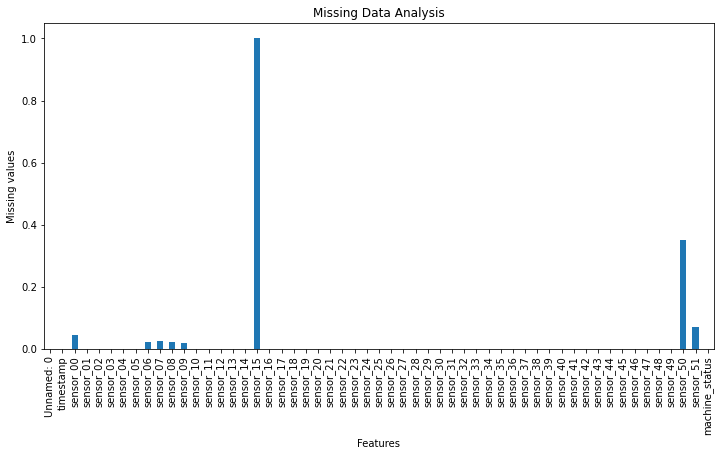

In [7]:
missing_data_plot(data)

In [8]:
data.isnull().mean()

Unnamed: 0        0.000000
timestamp         0.000000
sensor_00         0.046333
sensor_01         0.001675
sensor_02         0.000086
sensor_03         0.000086
sensor_04         0.000086
sensor_05         0.000086
sensor_06         0.021777
sensor_07         0.024741
sensor_08         0.023180
sensor_09         0.020856
sensor_10         0.000086
sensor_11         0.000086
sensor_12         0.000086
sensor_13         0.000086
sensor_14         0.000095
sensor_15         1.000000
sensor_16         0.000141
sensor_17         0.000209
sensor_18         0.000209
sensor_19         0.000073
sensor_20         0.000073
sensor_21         0.000073
sensor_22         0.000186
sensor_23         0.000073
sensor_24         0.000073
sensor_25         0.000163
sensor_26         0.000091
sensor_27         0.000073
sensor_28         0.000073
sensor_29         0.000327
sensor_30         0.001185
sensor_31         0.000073
sensor_32         0.000309
sensor_33         0.000073
sensor_34         0.000073
s

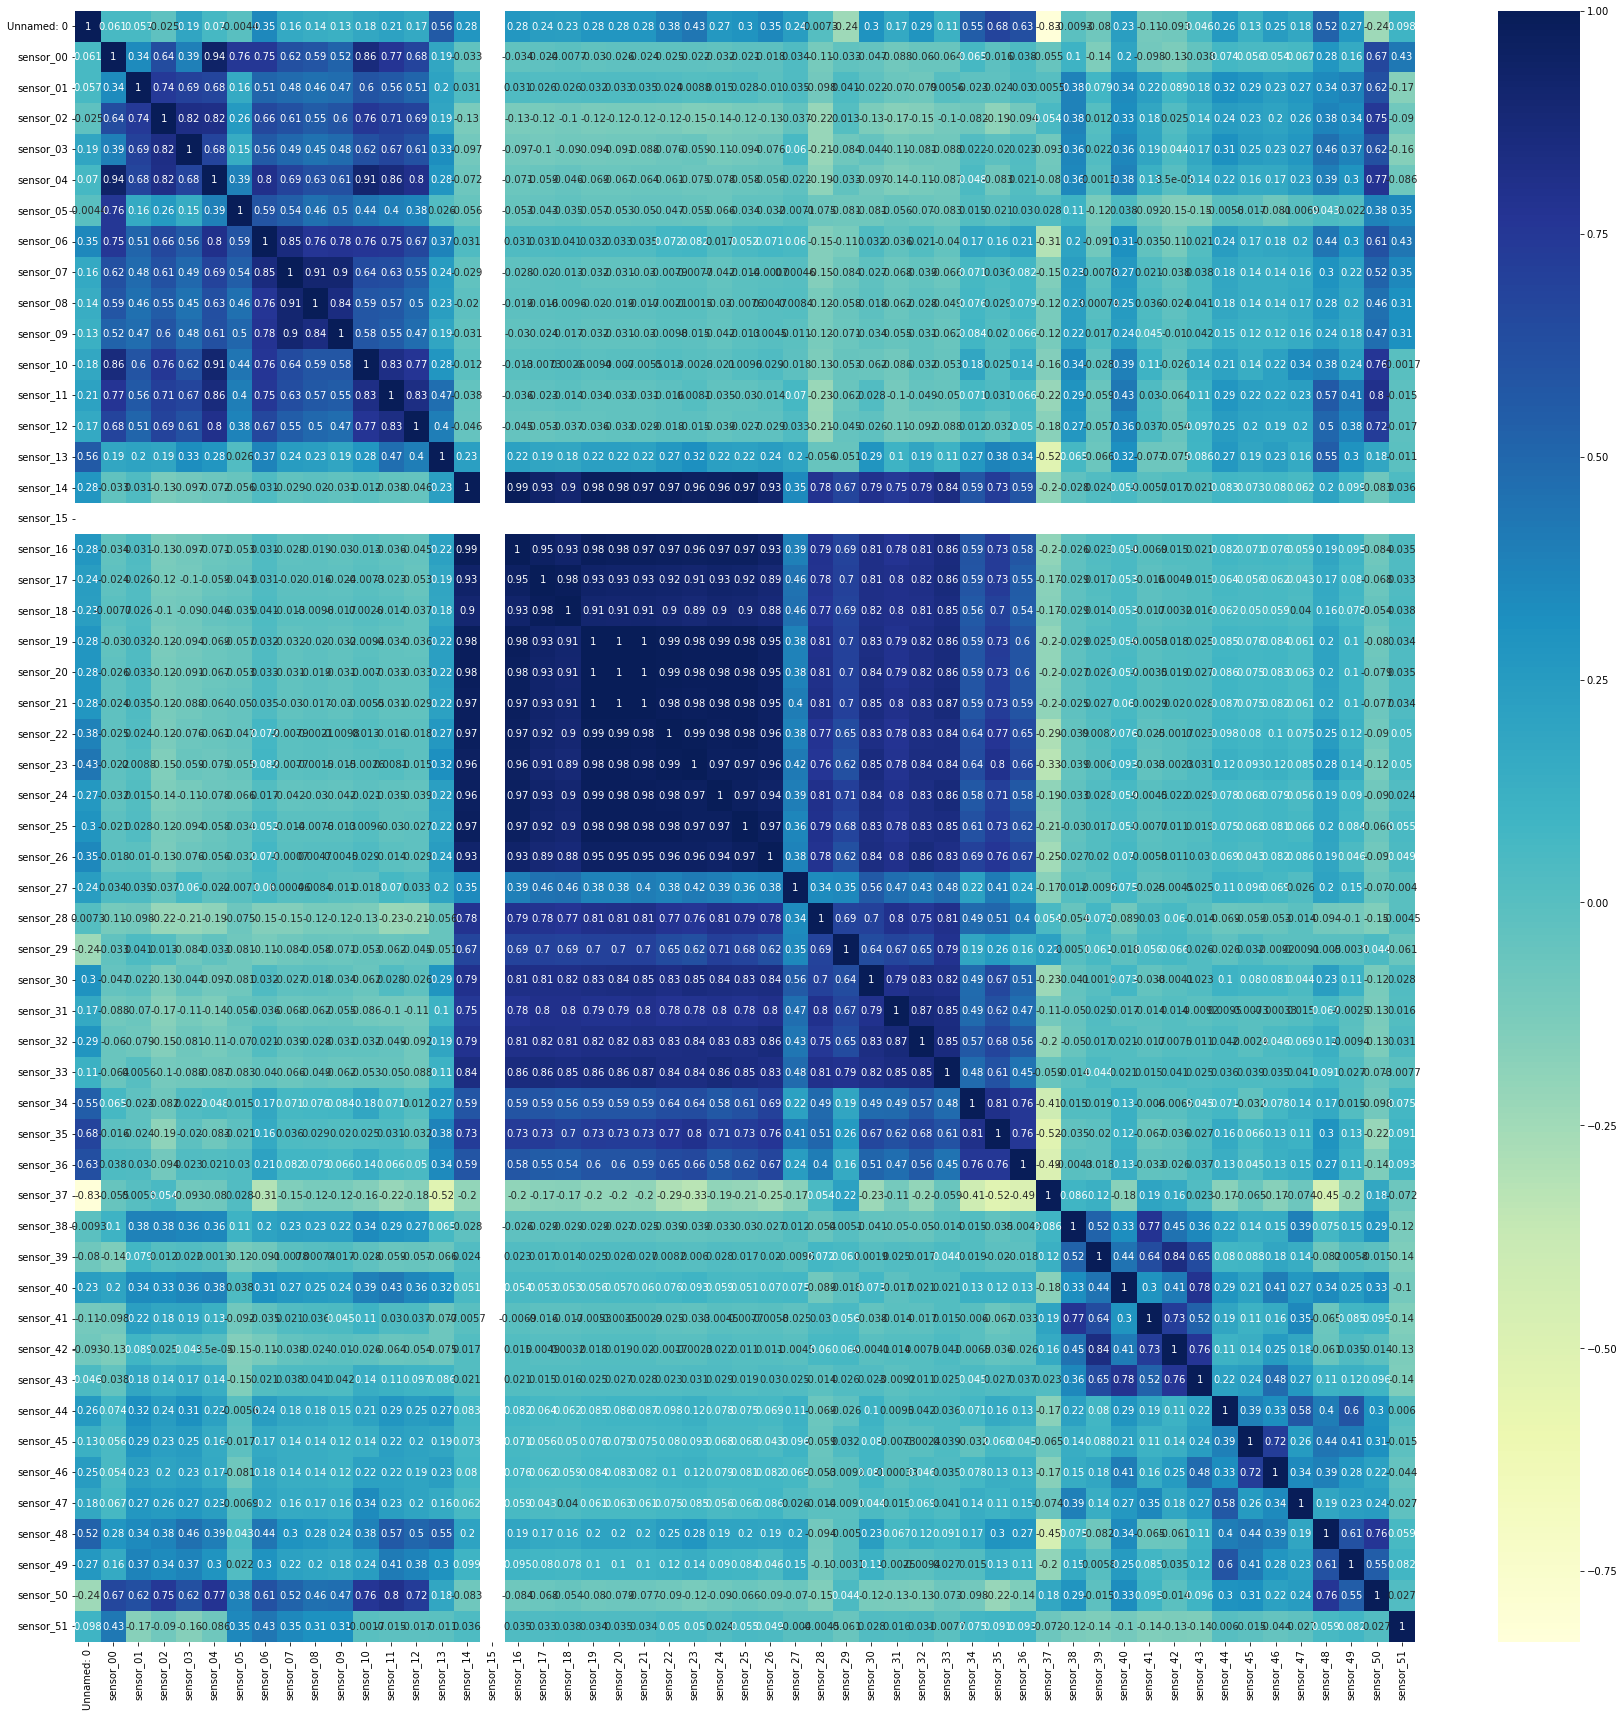

In [9]:
#correlation matrix

fig, ax = plt.subplots(figsize = (30, 30)) 
sns.heatmap(data.corr(), cmap = "YlGnBu", annot=True);

Confusion matrix shows a lot of correlated variables. During the data preprocessing we have to handle them.

In [10]:
data.describe().transpose()

count           mean           std        min           25%  \
Unnamed: 0  220320.0  110159.500000  63601.049991   0.000000  55079.750000   
sensor_00   210112.0       2.372221      0.412227   0.000000      2.438831   
sensor_01   219951.0      47.591611      3.296666   0.000000     46.310760   
sensor_02   220301.0      50.867392      3.666820  33.159720     50.390620   
sensor_03   220301.0      43.752481      2.418887  31.640620     42.838539   
sensor_04   220301.0     590.673936    144.023912   2.798032    626.620400   
sensor_05   220301.0      73.396414     17.298247   0.000000     69.976260   
sensor_06   215522.0      13.501537      2.163736   0.014468     13.346350   
sensor_07   214869.0      15.843152      2.201155   0.000000     15.907120   
sensor_08   215213.0      15.200721      2.037390   0.028935     15.183740   
sensor_09   215725.0      14.799210      2.091963   0.000000     15.053530   
sensor_10   220301.0      41.470339     12.093519   0.000000     40.705260   
sensor_11   220301.0      41.918319     13.056425   0.000000     38.856420   
sensor_12   220301.0      29.136975     10.113935   0.000000     28.686810   
sensor_13   220301.0       7.078858      6.901755   0.000000      1.538516   
sensor_14   220299.0     376.860041    113.206382  32.409550    418.103250   
sensor_15        0.0            NaN           NaN        NaN           NaN   
sensor_16   220289.0     416.472892    126.072642   0.000000    459.453400   
sensor_17   220274.0     421.127517    129.156175   0.000000    454.138825   
sensor_18   220274.0       2.303785      0.765883   0.000000      2.447542   
sensor_19   220304.0     590.829775    199.345820   0.000000    662.768975   
sensor_20   220304.0     360.805165    101.974118   0.000000    398.021500   
sensor_21   220304.0     796.225942    226.679317  95.527660    875.464400   
sensor_22   220279.0     459.792815    154.528337   0.000000    478.962600   
sensor_23   220304.0     922.609264    291.835280   0.000000    950.922400   
sensor_24   220304.0     556.235397    182.297979   0.000000    601.151050   
sensor_25   220284.0     649.144799    220.865166   0.000000    693.957800   
sensor_26   220300.0     786.411781    246.663608  43.154790    790.489575   
sensor_27   220304.0     501.506589    169.823173   0.000000    448.297950   
sensor_28   220304.0     851.690339    313.074032   4.319347    782.682625   
sensor_29   220248.0     576.195305    225.764091   0.636574    518.947225   
sensor_30   220059.0     614.596442    195.726872   0.000000    627.777800   
sensor_31   220304.0     863.323100    283.544760  23.958330    839.062400   
sensor_32   220252.0     804.283915    260.602361   0.240716    760.607475   
sensor_33   220304.0     486.405980    150.751836   6.460602    489.761075   
sensor_34   220304.0     234.971776     88.376065  54.882370    172.486300   
sensor_35   220304.0     427.129817    141.772519   0.000000    353.176625   
sensor_36   220304.0     593.033876    289.385511   2.260970    288.547575   
sensor_37   220304.0      60.787360     37.604883   0.000000     28.799220   
sensor_38   220293.0      49.655946     10.540397  24.479166     45.572910   
sensor_39   220293.0      36.610444     15.613723  19.270830     32.552080   
sensor_40   220293.0      68.844530     21.371139  23.437500     57.812500   
sensor_41   220293.0      35.365126      7.898665  20.833330     32.552080   
sensor_42   220293.0      35.453455     10.259521  22.135416     32.812500   
sensor_43   220293.0      43.879591     11.044404  24.479166     39.583330   
sensor_44   220293.0      42.656877     11.576355  25.752316     36.747684   
sensor_45   220293.0      43.094984     12.837520  26.331018     36.747684   
sensor_46   220293.0      48.018585     15.641284  26.331018     40.509258   
sensor_47   220293.0      44.340903     10.442437  27.199070     39.062500   
sensor_48   220293.0     150.889044     82.244957  26.331018     83.912030   
sensor_49   220293.0      57.119968  

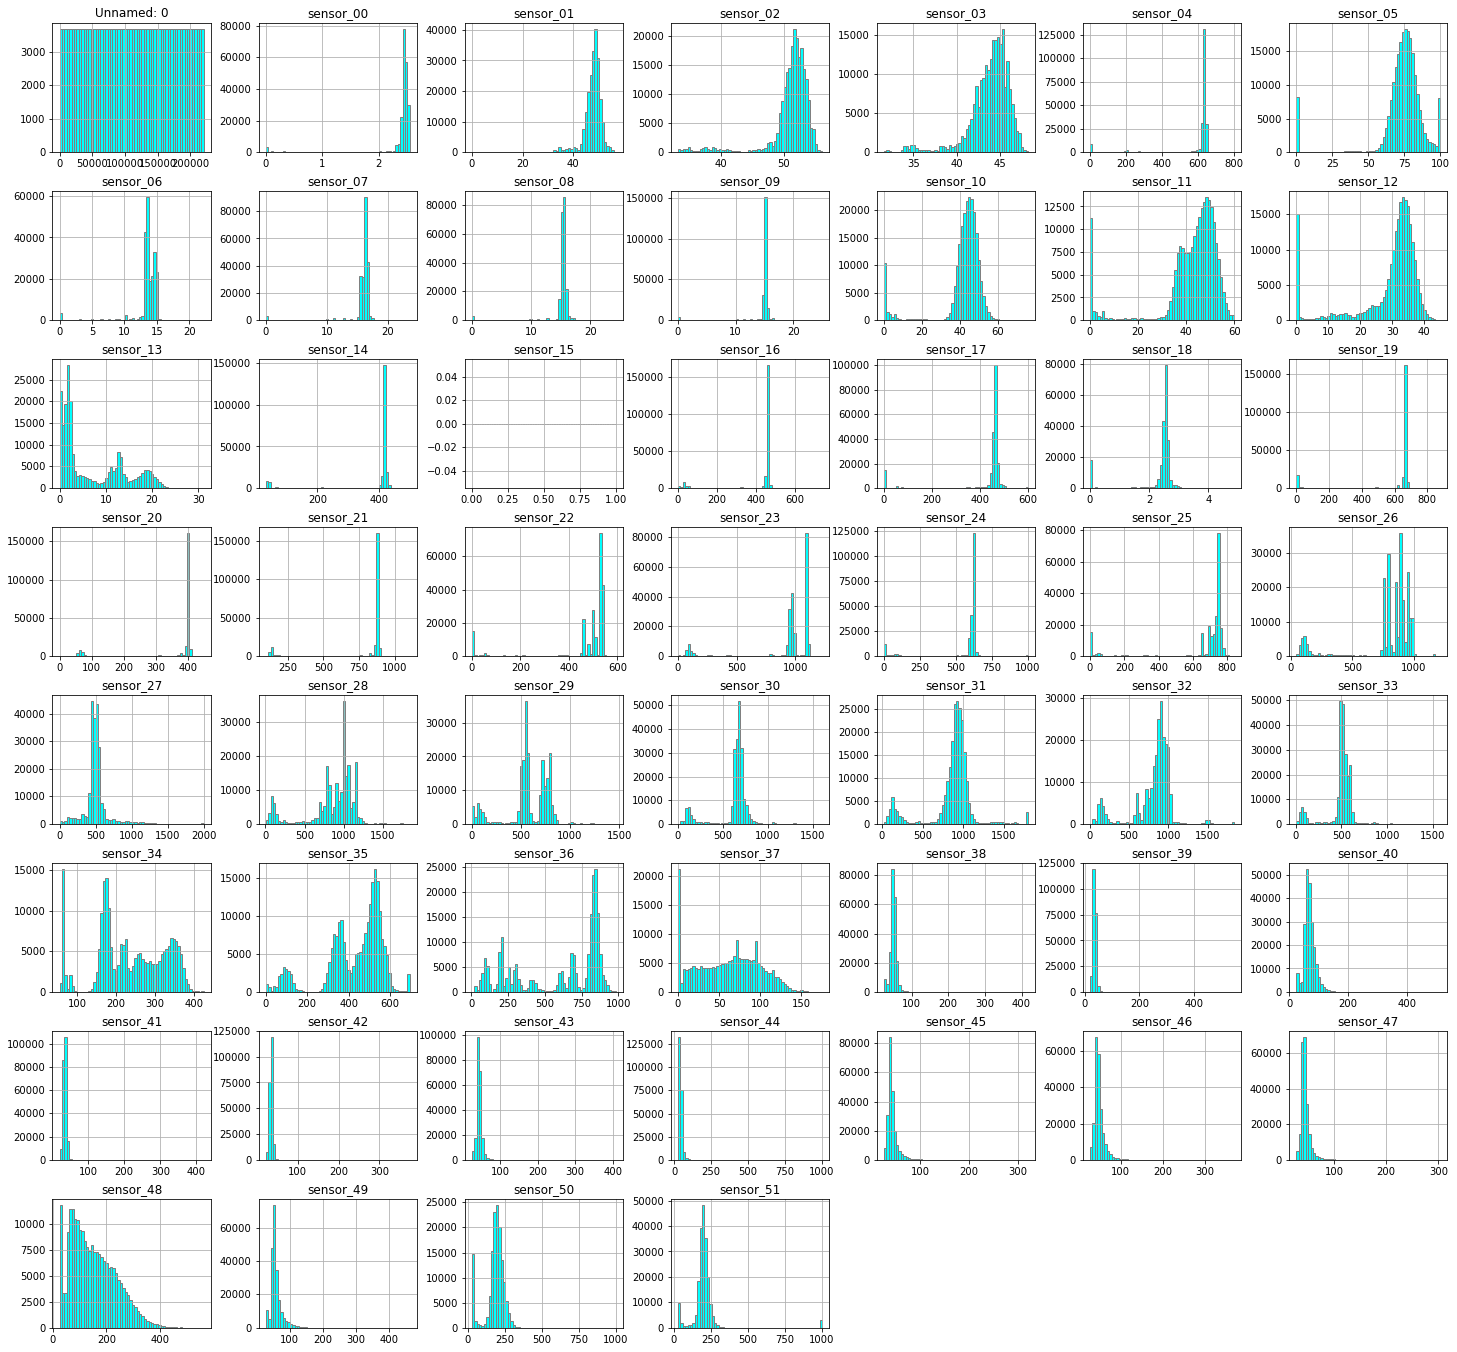

In [11]:
# distribution
fig_ = data.hist(figsize=(25, 24), bins=60, color="cyan",
                         edgecolor="gray", xlabelsize=10, ylabelsize=10)

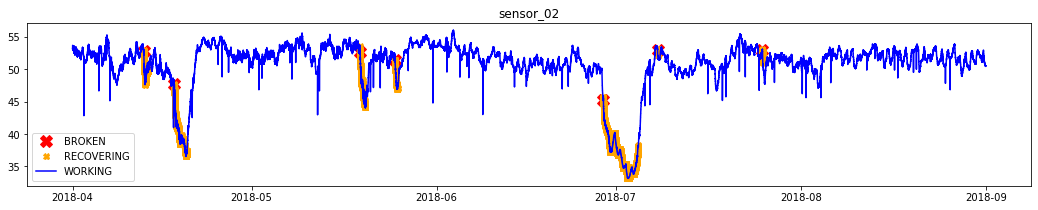

In [12]:
plot_label_by_date(data, 'sensor_02')

This plot shows us when the pump broke down during all the time.

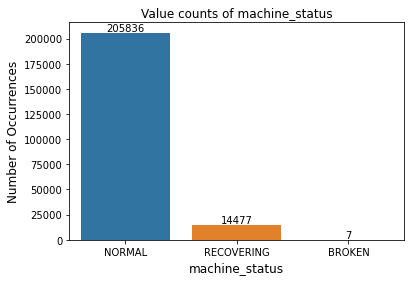

In [13]:
# distribution of target variable

value_counts_plot(data, "machine_status")

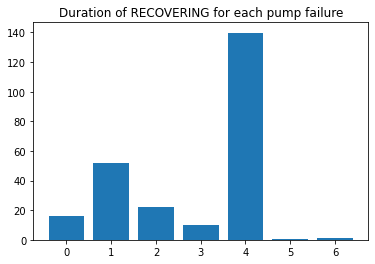

In [14]:
recovering_times_hours, broken_rows = get_recovering_times(data)

xpos = np.arange( len(recovering_times_hours) )

fig, ax = plt.subplots()
ax.bar(xpos,recovering_times_hours)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos)
ax.set_title("Duration of RECOVERING for each pump failure")
plt.show()

This graph shows duration of recovering for each pump failure.

As you can see most of recoverings last less then 50 hours.

<Figure size 432x288 with 0 Axes>

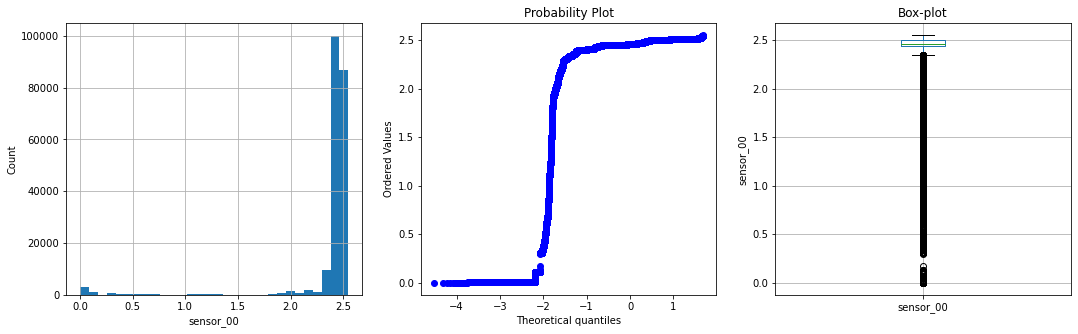

<Figure size 432x288 with 0 Axes>

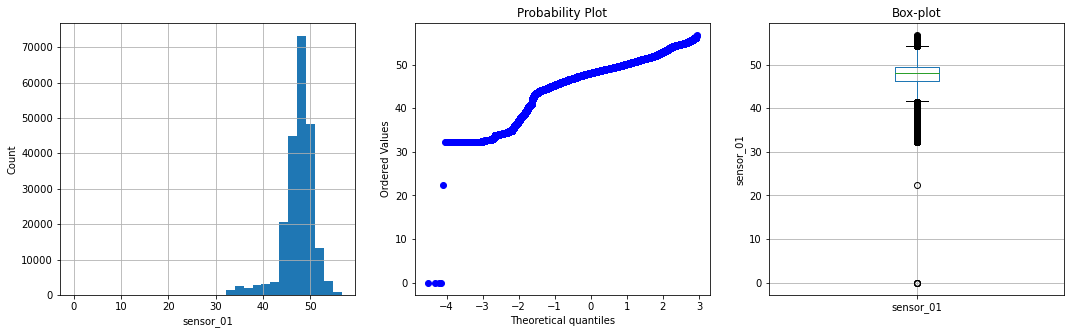

<Figure size 432x288 with 0 Axes>

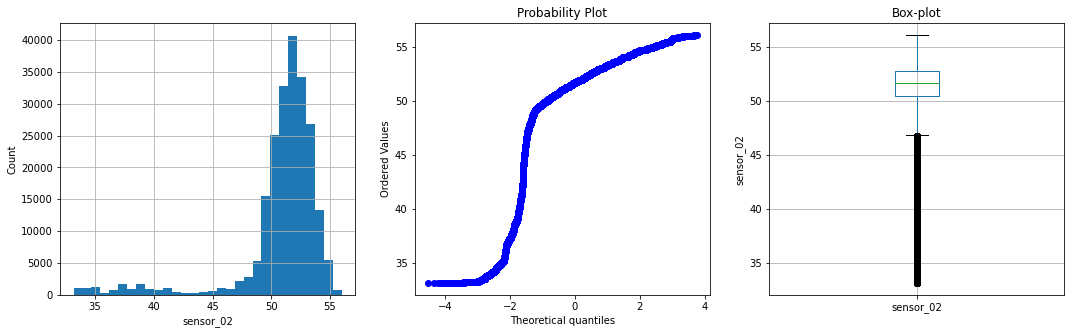

<Figure size 432x288 with 0 Axes>

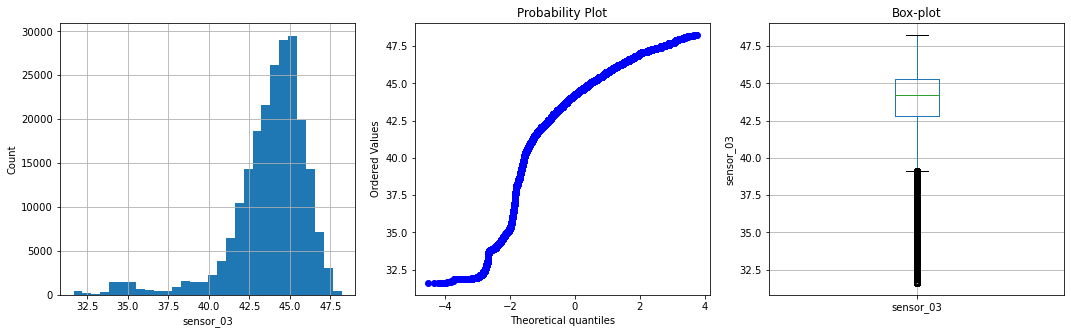

<Figure size 432x288 with 0 Axes>

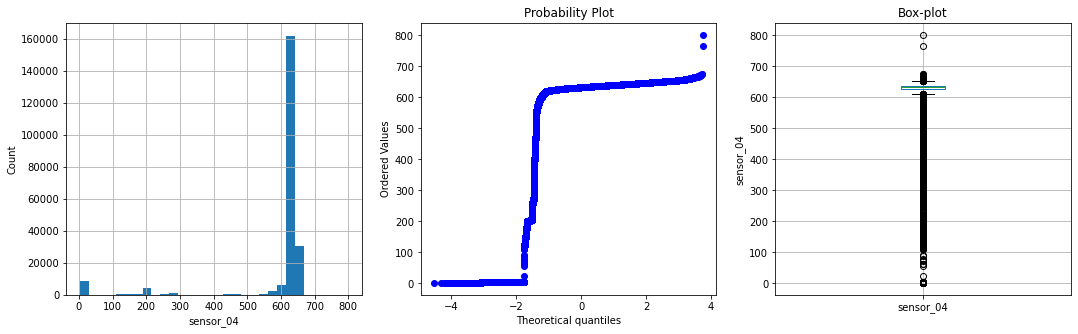

<Figure size 432x288 with 0 Axes>

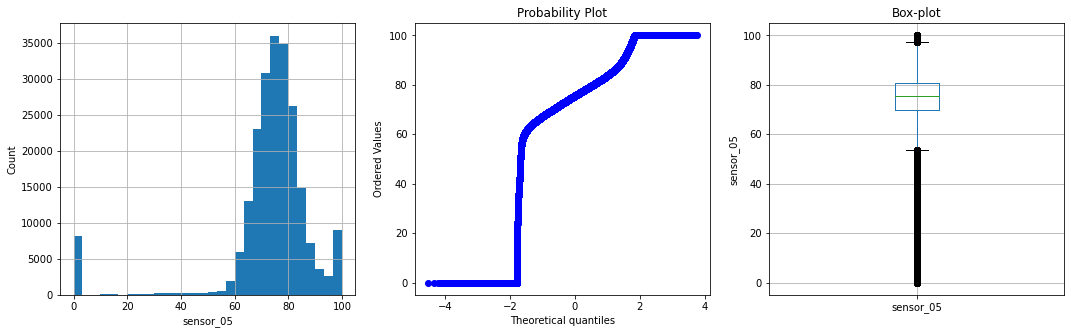

<Figure size 432x288 with 0 Axes>

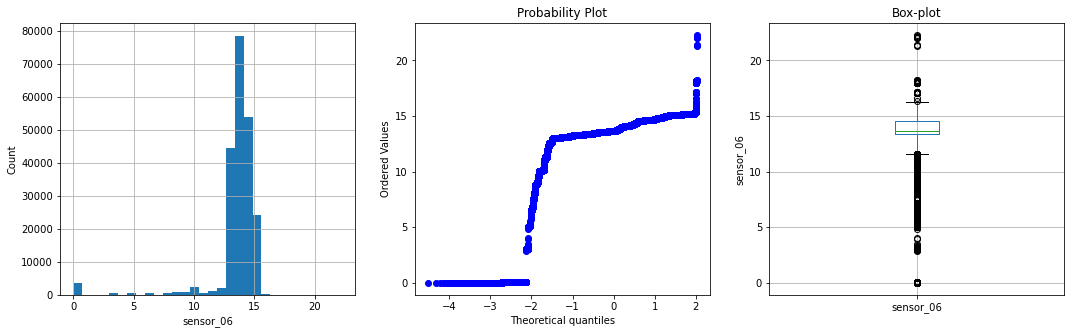

<Figure size 432x288 with 0 Axes>

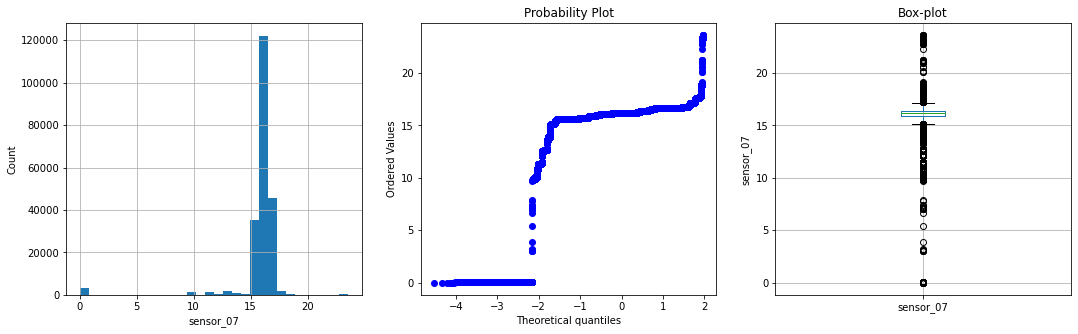

<Figure size 432x288 with 0 Axes>

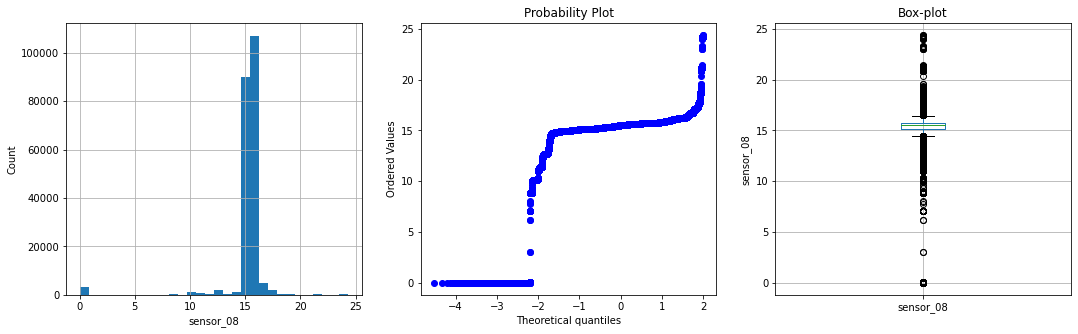

<Figure size 432x288 with 0 Axes>

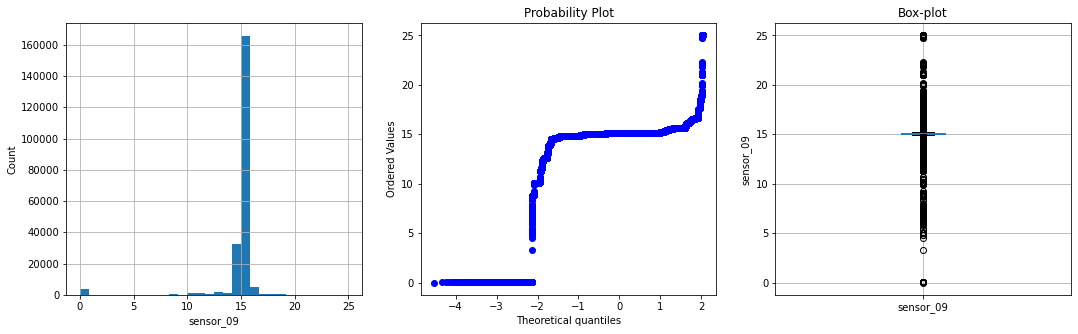

<Figure size 432x288 with 0 Axes>

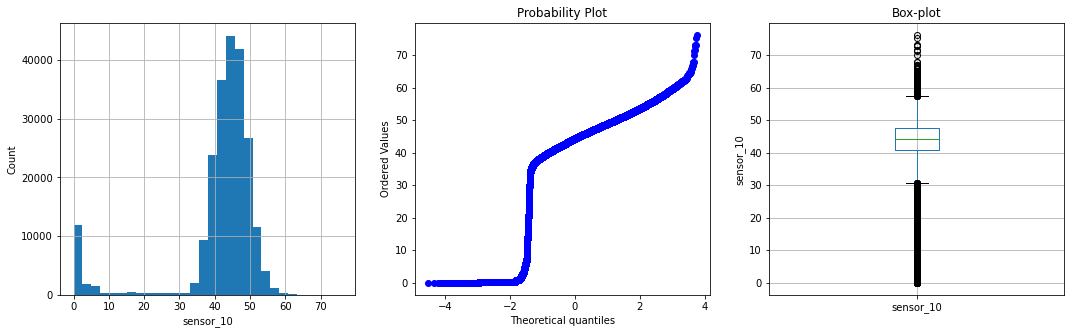

<Figure size 432x288 with 0 Axes>

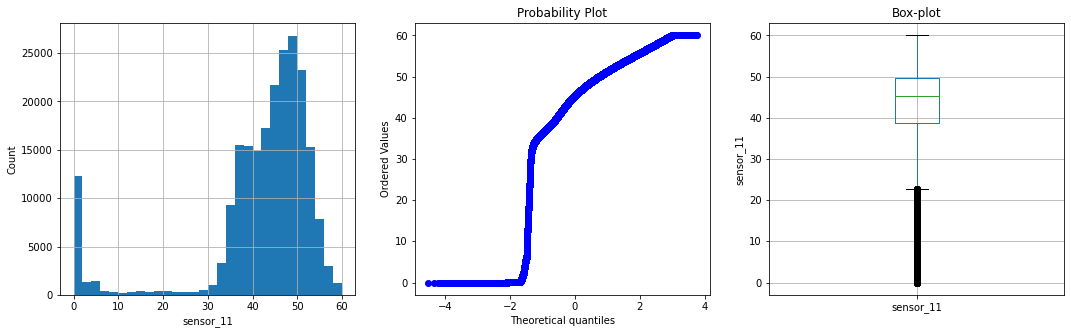

<Figure size 432x288 with 0 Axes>

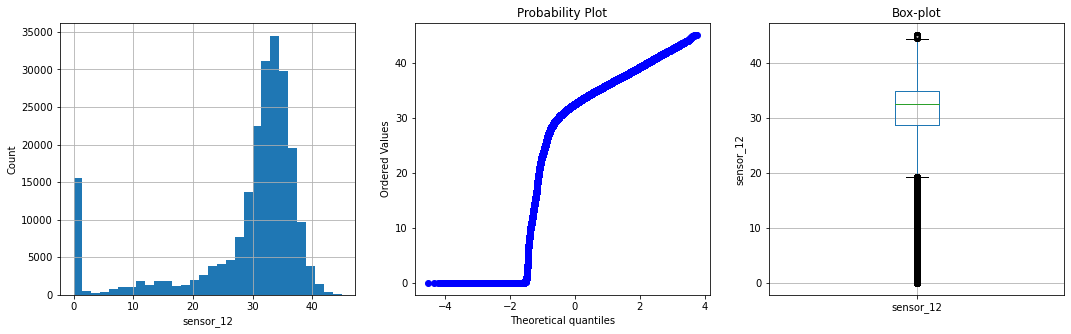

<Figure size 432x288 with 0 Axes>

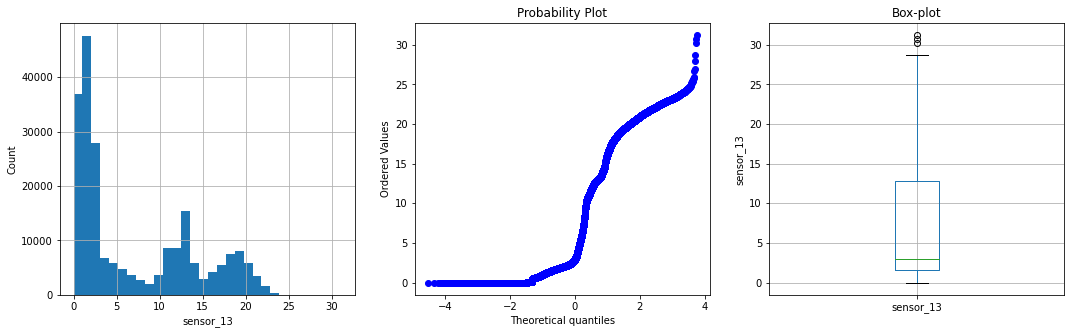

<Figure size 432x288 with 0 Axes>

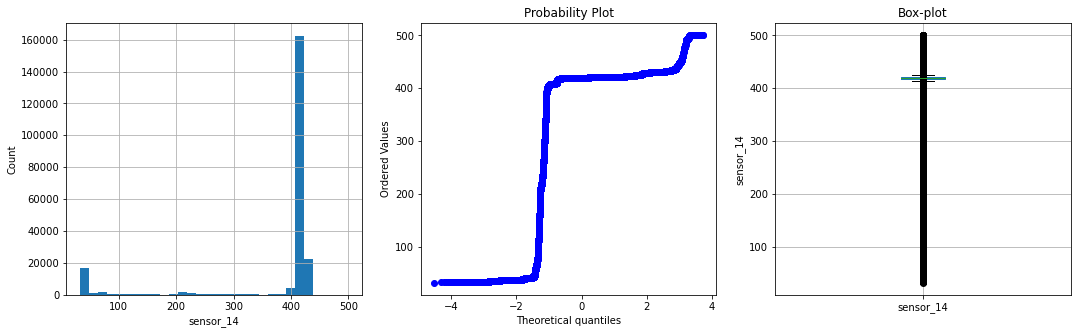

<Figure size 432x288 with 0 Axes>

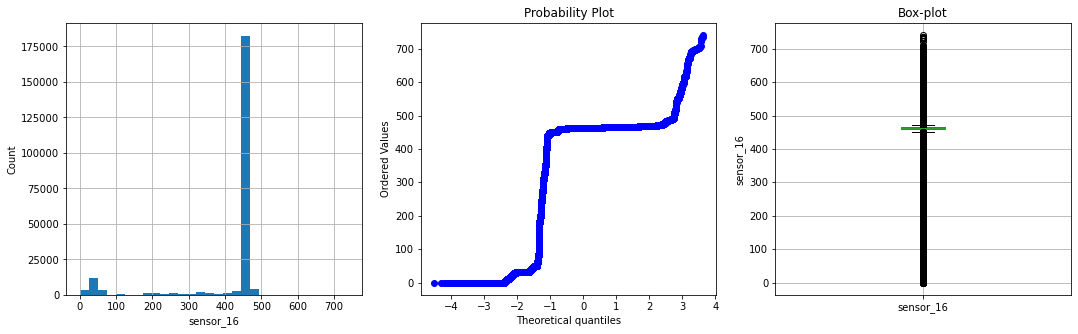

<Figure size 432x288 with 0 Axes>

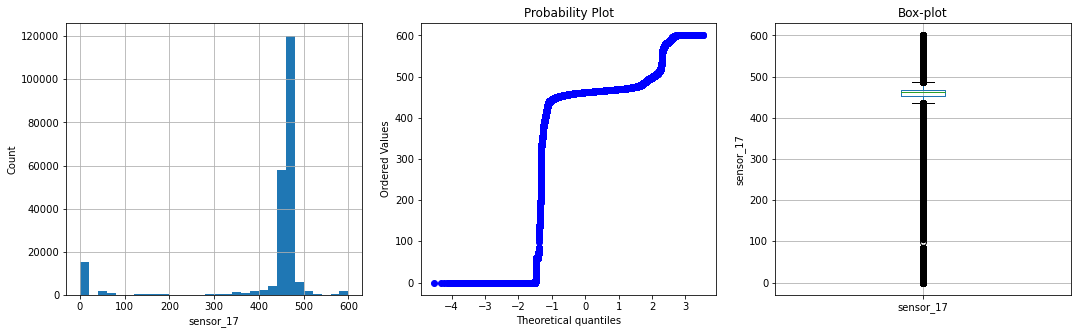

<Figure size 432x288 with 0 Axes>

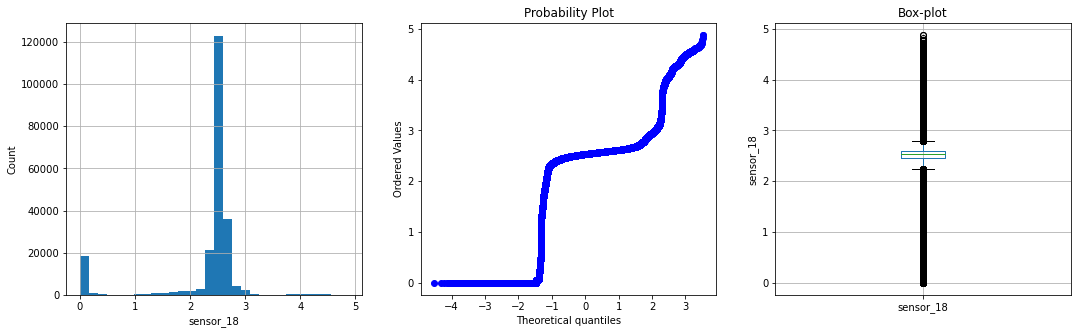

<Figure size 432x288 with 0 Axes>

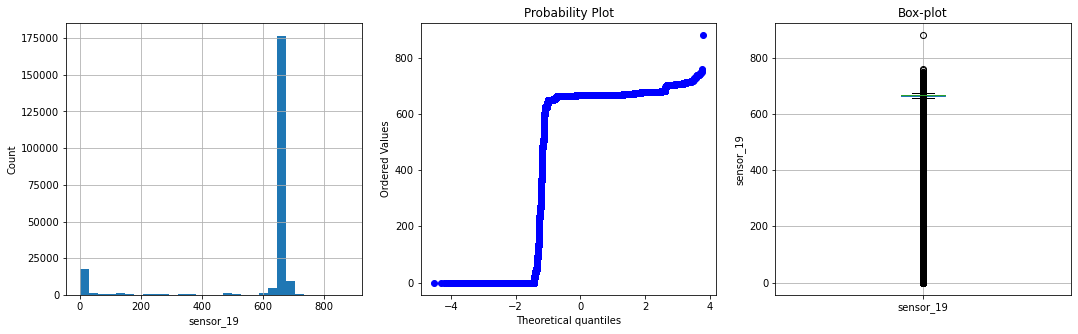

<Figure size 432x288 with 0 Axes>

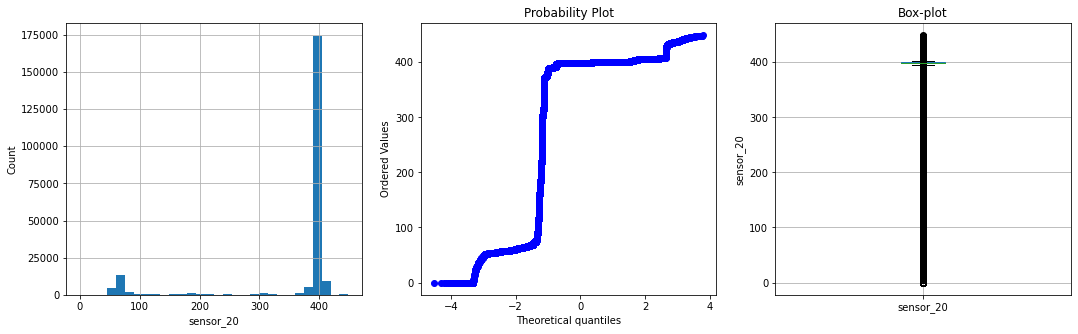

<Figure size 432x288 with 0 Axes>

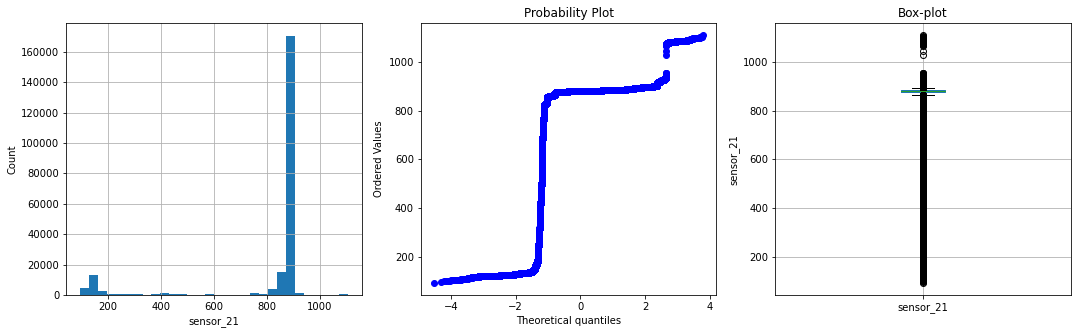

<Figure size 432x288 with 0 Axes>

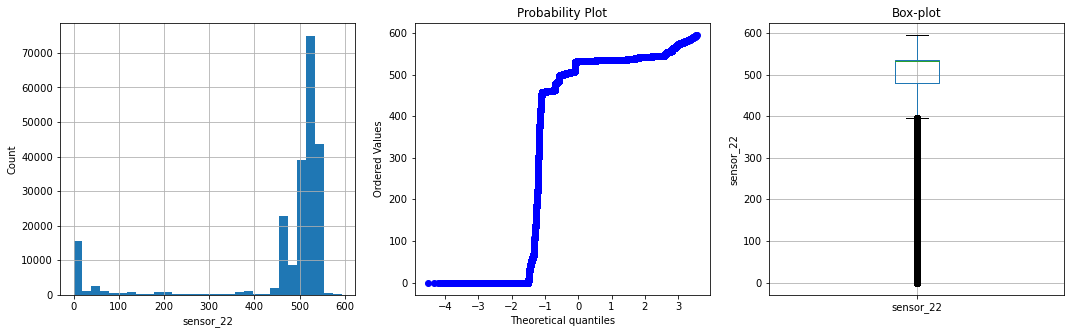

<Figure size 432x288 with 0 Axes>

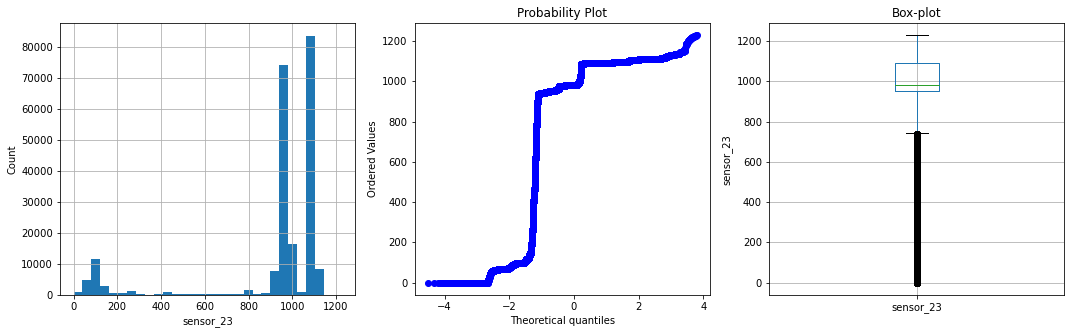

<Figure size 432x288 with 0 Axes>

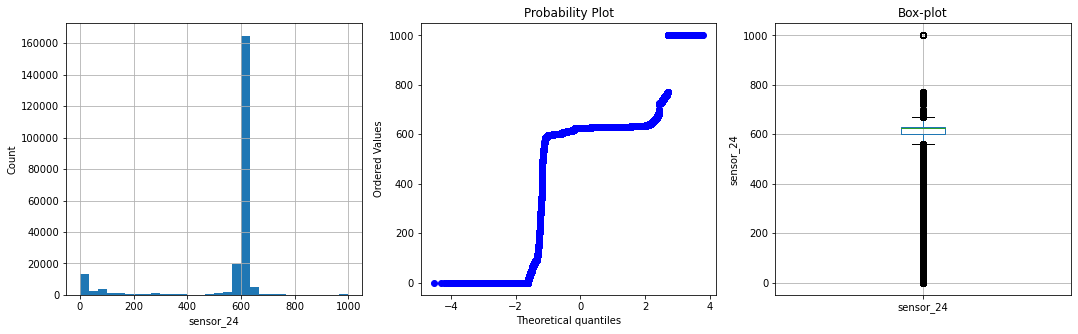

<Figure size 432x288 with 0 Axes>

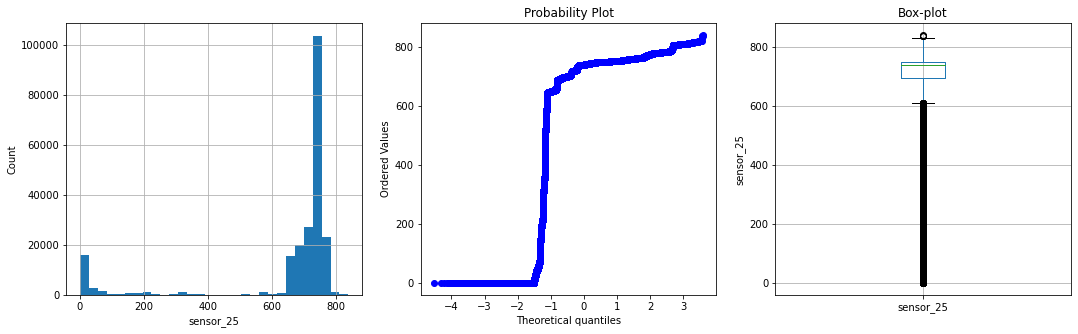

<Figure size 432x288 with 0 Axes>

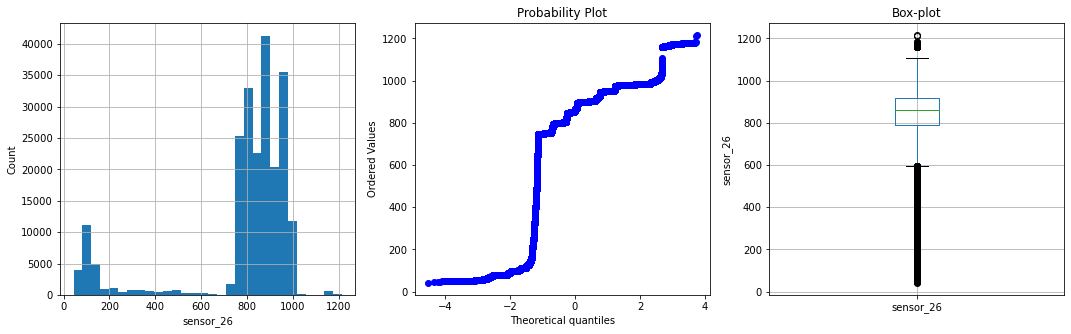

<Figure size 432x288 with 0 Axes>

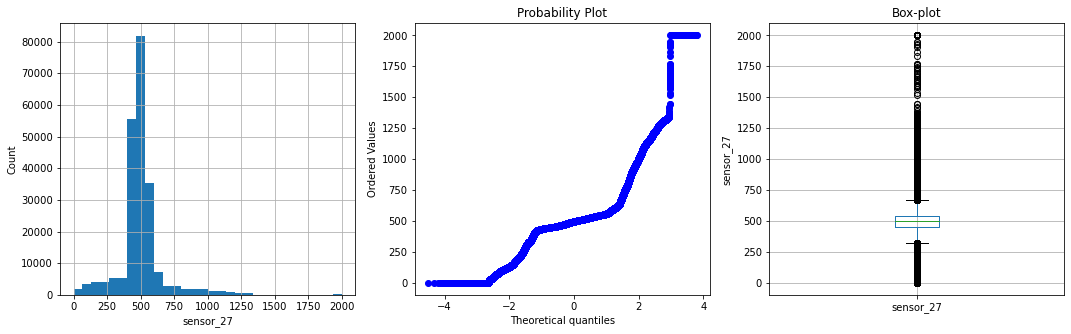

<Figure size 432x288 with 0 Axes>

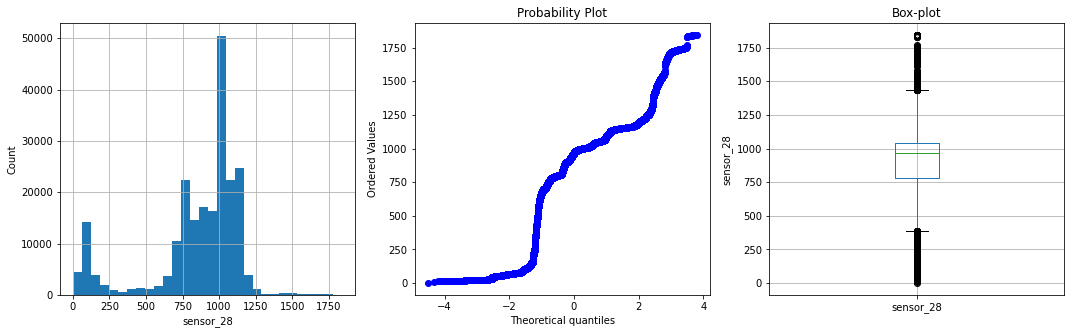

<Figure size 432x288 with 0 Axes>

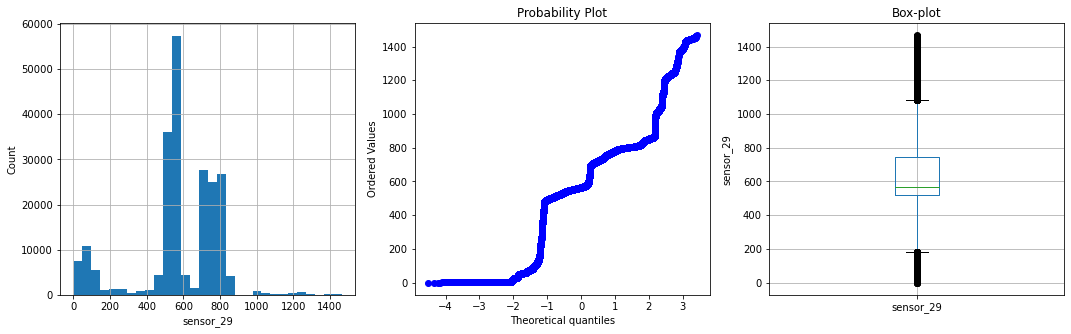

<Figure size 432x288 with 0 Axes>

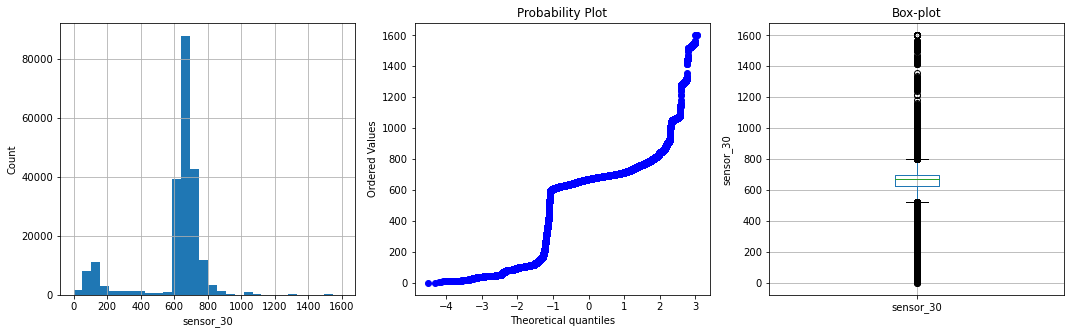

<Figure size 432x288 with 0 Axes>

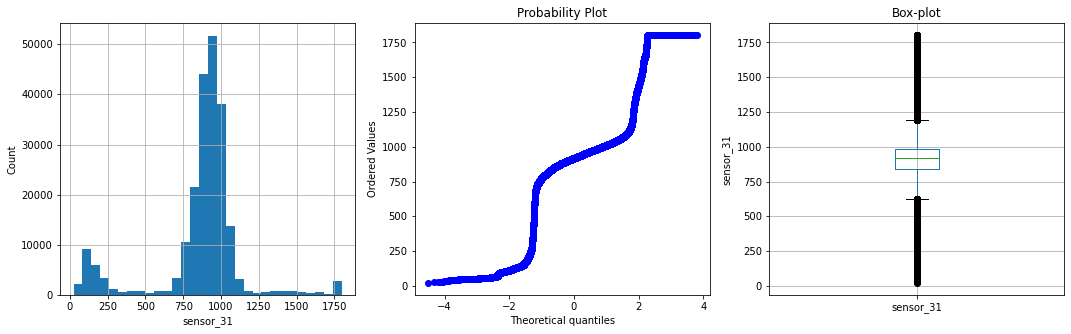

<Figure size 432x288 with 0 Axes>

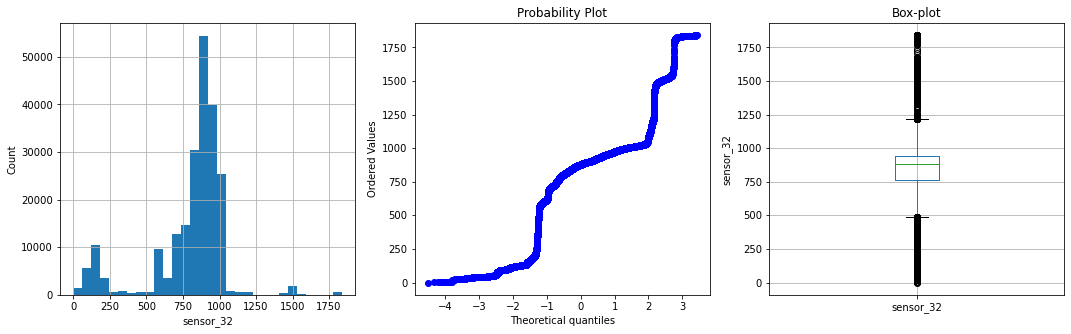

<Figure size 432x288 with 0 Axes>

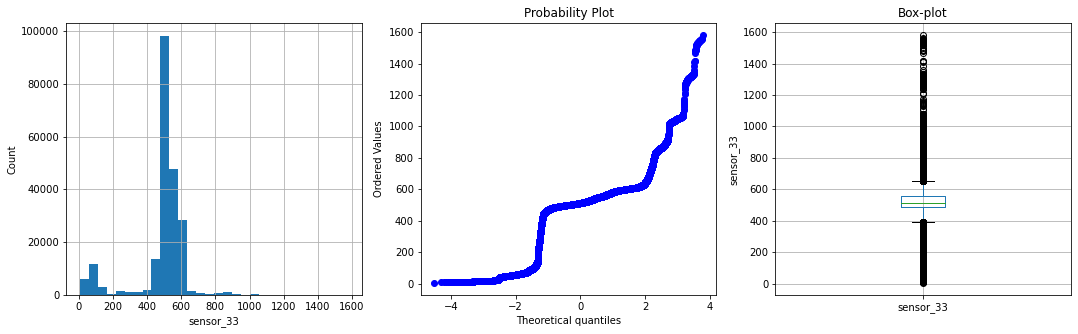

<Figure size 432x288 with 0 Axes>

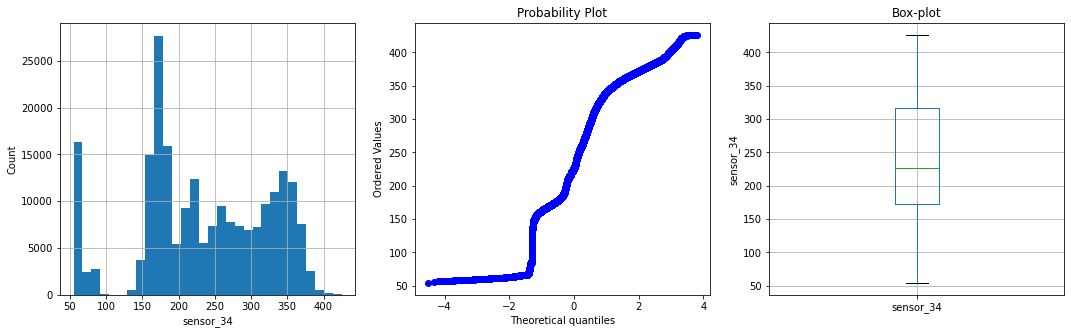

<Figure size 432x288 with 0 Axes>

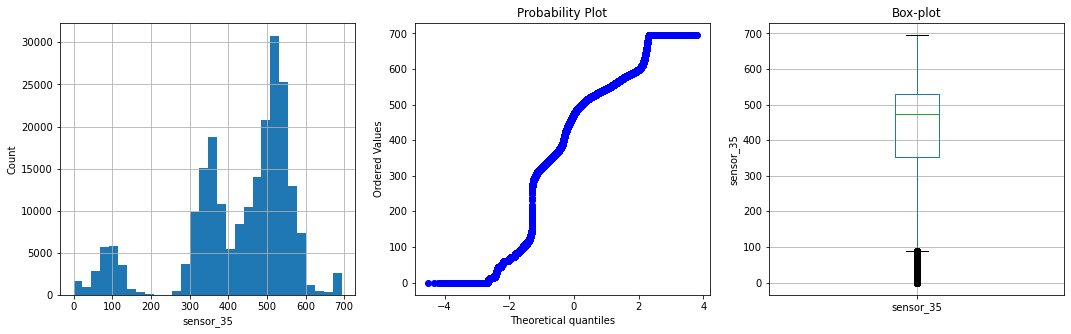

<Figure size 432x288 with 0 Axes>

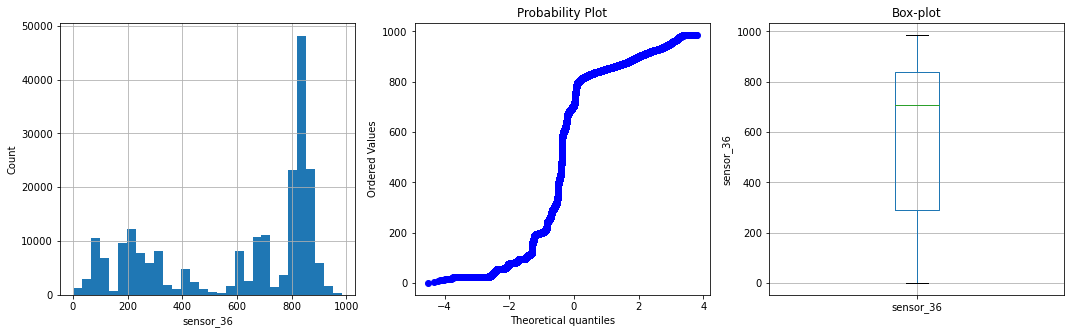

<Figure size 432x288 with 0 Axes>

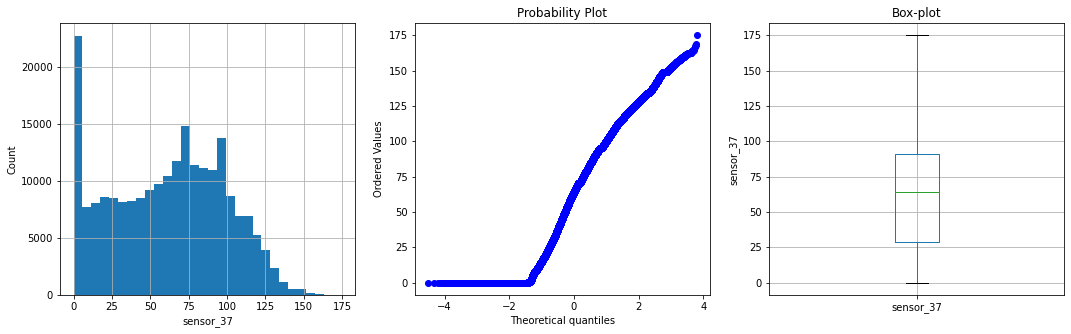

<Figure size 432x288 with 0 Axes>

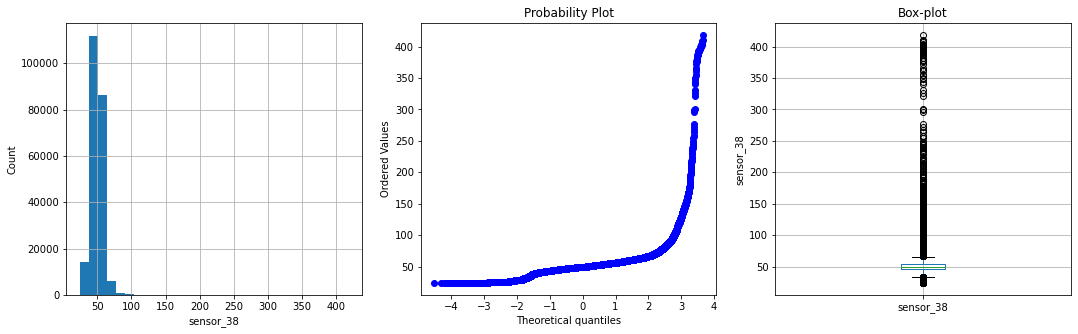

<Figure size 432x288 with 0 Axes>

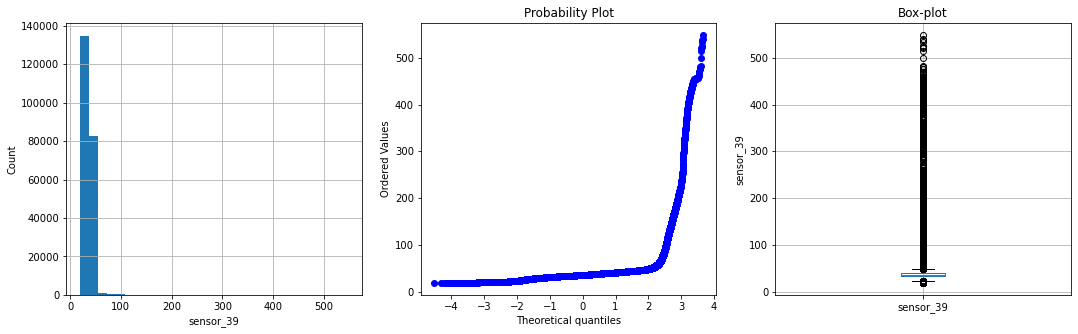

<Figure size 432x288 with 0 Axes>

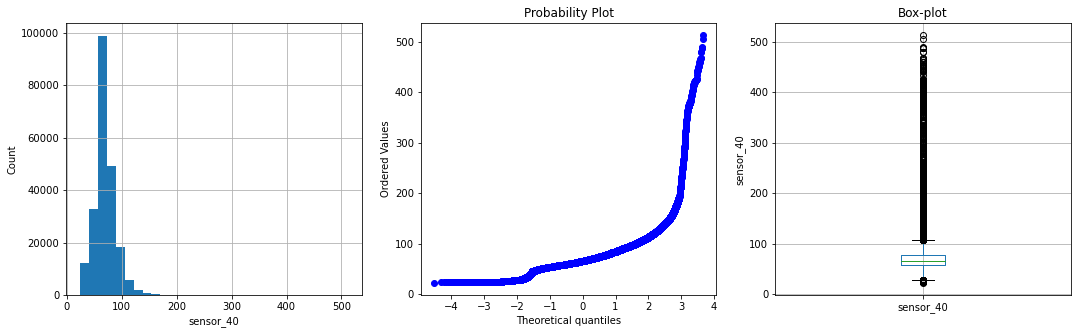

<Figure size 432x288 with 0 Axes>

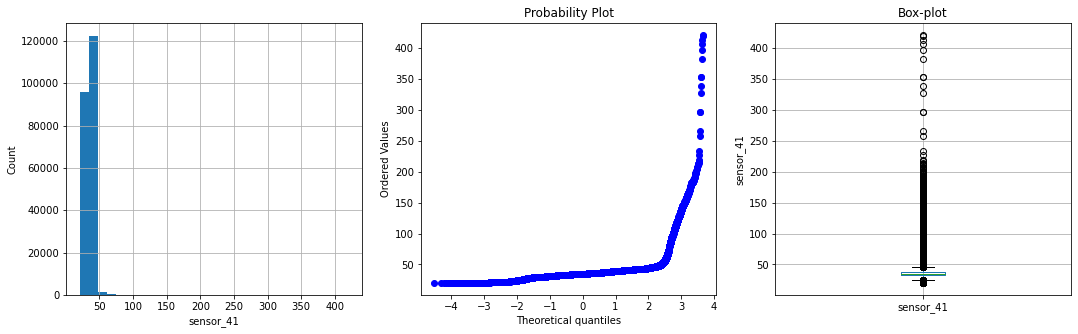

<Figure size 432x288 with 0 Axes>

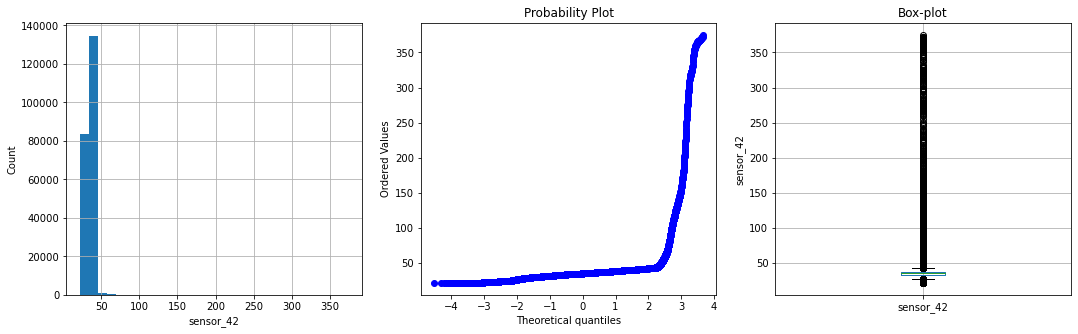

<Figure size 432x288 with 0 Axes>

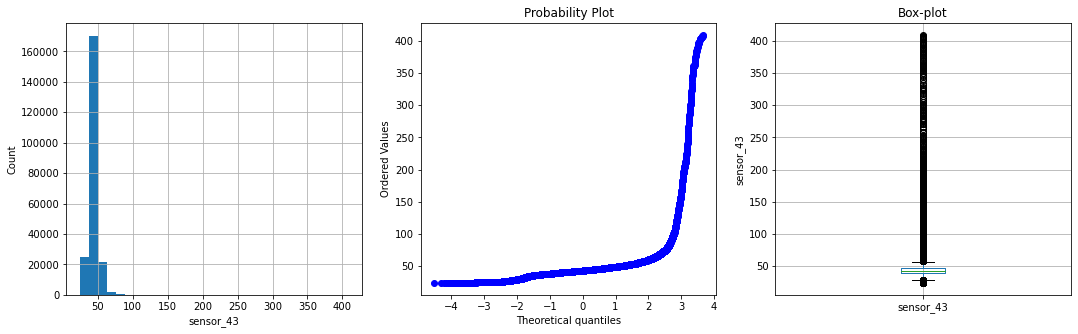

<Figure size 432x288 with 0 Axes>

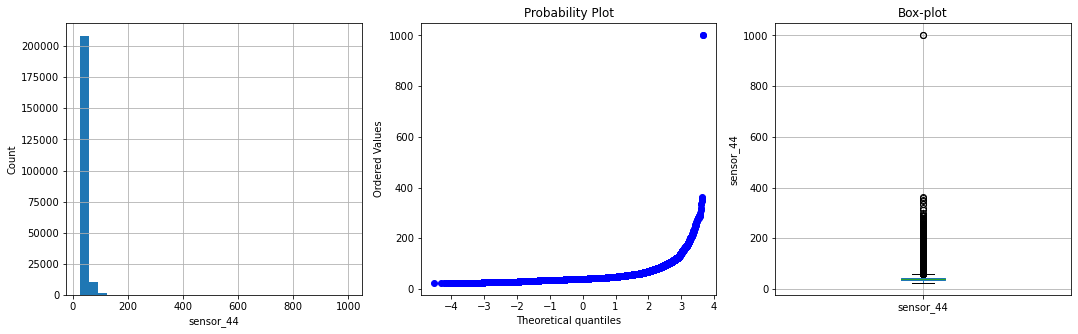

<Figure size 432x288 with 0 Axes>

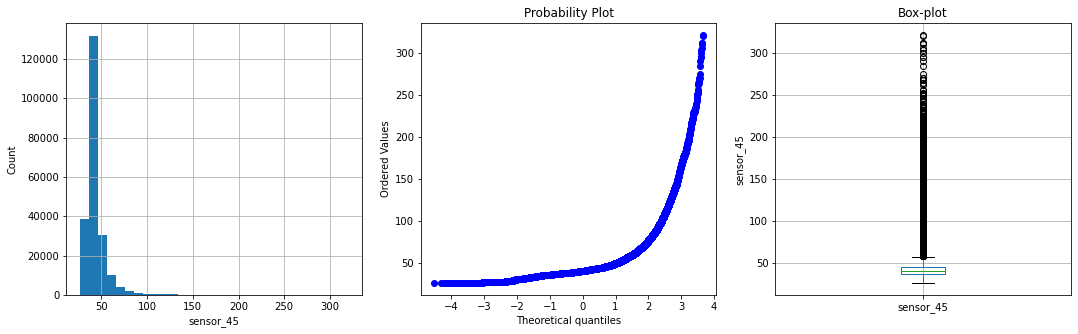

<Figure size 432x288 with 0 Axes>

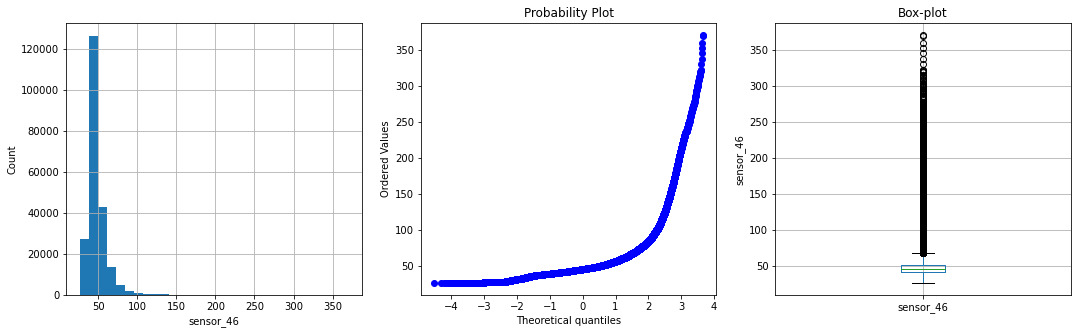

<Figure size 432x288 with 0 Axes>

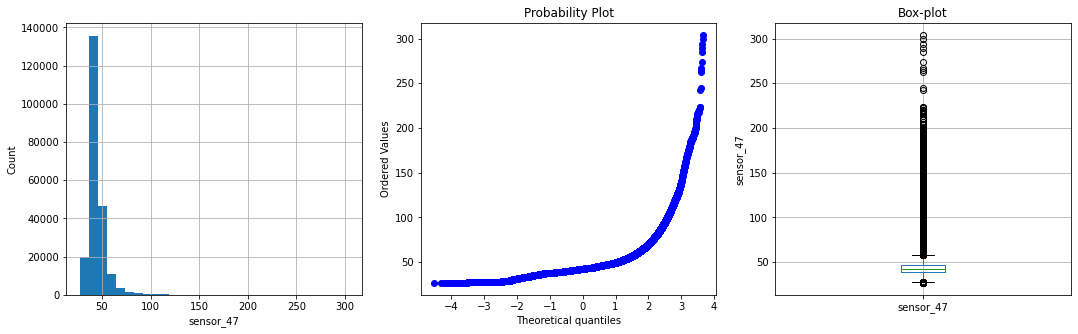

<Figure size 432x288 with 0 Axes>

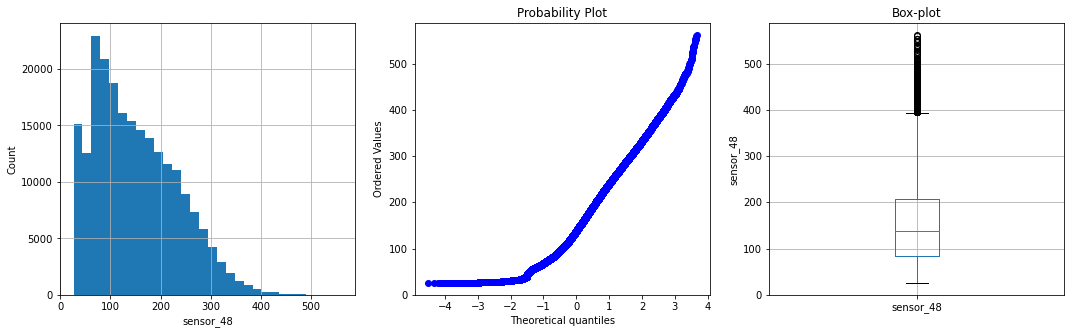

<Figure size 432x288 with 0 Axes>

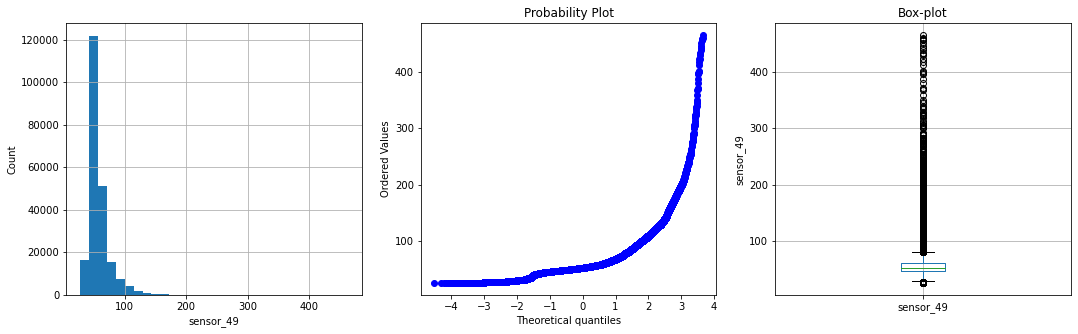

<Figure size 432x288 with 0 Axes>

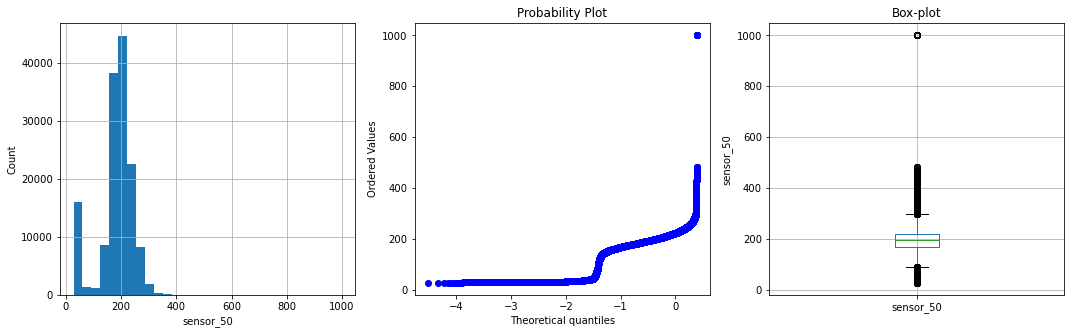

<Figure size 432x288 with 0 Axes>

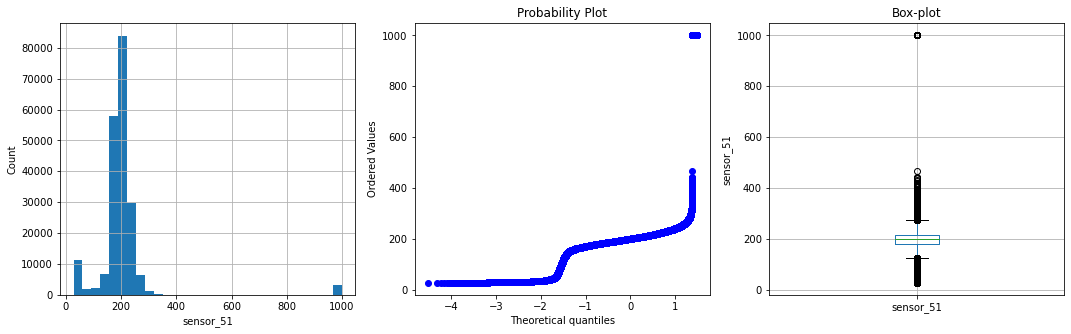

In [15]:
# Get the distribution, probability plot and box-plot for every variable, except of sensor_15, because there is 100% missing data.
for var in data.columns:
    if var not in ['Unnamed: 0', 'timestamp', 'datetime', 'machine_status', 'sensor_15']:
        diagnostic_plots(data, var)

In [16]:
data.head()

Unnamed: 0         timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
0           0  2018-04-01 00:00   2.465394   47.09201    53.2118  46.310760   
1           1  2018-04-01 00:01   2.465394   47.09201    53.2118  46.310760   
2           2  2018-04-01 00:02   2.444734   47.35243    53.2118  46.397570   
3           3  2018-04-01 00:03   2.460474   47.09201    53.1684  46.397568   
4           4  2018-04-01 00:04   2.445718   47.13541    53.2118  46.397568   

   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   
1   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   
2   638.8889   73.54598   13.32465   16.03733   15.61777   15.01013   
3   628.1250   76.98898   13.31742   16.24711   15.69734   15.08247   
4   636.4583   76.58897   13.35359   16.21094   15.69734   15.08247   

   sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0   37.22740   47.52422   31.11716   1.681353   419.5747        NaN   
1   37.22740   47.52422   31.11716   1.681353   419.5747        NaN   
2   37.86777   48.17723   32.08894   1.708474   420.8480        NaN   
3   38.57977   48.65607   31.67221   1.579427   420.7494        NaN   
4   39.48939   49.06298   31.95202   1.683831   419.8926        NaN   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  \
0   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   
1   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   
2   462.7798   459.6364   2.500062   666.2234   399.9418   880.4237   
3   462.8980   460.8858   2.509521   666.0114   399.1046   878.8917   
4   461.4906   468.2206   2.604785   663.2111   400.5426   882.5874   

   sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  sensor_27  \
0   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   
1   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   
2   501.3617   982.7342   631.1326   740.8031   849.8997   454.2390   
3   499.0430   977.7520   625.4076   739.2722   847.7579   474.8731   
4   498.5383   979.5755   627.1830   737.6033   846.9182   408.8159   

   sensor_28  sensor_29  sensor_30  sensor_31  sensor_32  sensor_33  \
0   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   
1   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   
2   778.5734   715.6266   661.5740   721.8750   694.7721   441.2635   
3   779.5091   690.4011   686.1111   754.6875   683.3831   446.2493   
4   785.2307   704.6937   631.4814   766.1458   702.4431   433.9081   

   sensor_34  sensor_35  sensor_36  sensor_37  sensor_38  sensor_39  \
0   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   
1   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   
2   169.9820   343.1955   200.9694   93.90508   41.40625   31.25000   
3   166.4987   343.9586   193.1689  101.04060   41.92708   31.51042   
4   164.7498   339.9630   193.8770  101.70380   42.70833   31.51042   

   sensor_40  sensor_41  sensor_42  sensor_43  sensor_44  sensor_45  \
0   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   
1   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   
2   69.53125   30.46875  31.770830   41.66666  39.351852   65.39352   
3   72.13541   30.46875  31.510420   40.88541  39.062500   64.81481   
4   76.82291   30.98958  31.510420   41.40625  38.773150   65.10416   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
0   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
1   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
2   51.21528  38.194443   155.9606   67.12963   241.3194   203.7037   
3   51.21528  38.194440   155.9606   66.84028   240.4514   203.1250   
4   51.79398  38.773150   158.2755   66.55093   242.1875   201.3889   

  machine_status            datetime  
0         NORMAL 2018-04-01 00:00:00  
1         NORMAL 2018-04-01 00:01:

## Data Preprocessing

In [102]:
# Start data preprocessing with removing of useless variables.
# Also we drop our target variable.

sensors_df = data.drop(['sensor_15', 'Unnamed: 0', 'datetime', 'timestamp', 'machine_status'], axis = 1).copy()

In [103]:
sensors_df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
1   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
2   2.444734   47.35243    53.2118  46.397570   638.8889   73.54598   
3   2.460474   47.09201    53.1684  46.397568   628.1250   76.98898   
4   2.445718   47.13541    53.2118  46.397568   636.4583   76.58897   

   sensor_06  sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  \
0   13.41146   16.13136   15.56713   15.05353   37.22740   47.52422   
1   13.41146   16.13136   15.56713   15.05353   37.22740   47.52422   
2   13.32465   16.03733   15.61777   15.01013   37.86777   48.17723   
3   13.31742   16.24711   15.69734   15.08247   38.57977   48.65607   
4   13.35359   16.21094   15.69734   15.08247   39.48939   49.06298   

   sensor_12  sensor_13  sensor_14  sensor_16  sensor_17  sensor_18  \
0   31.11716   1.681353   419.5747   461.8781   466.3284   2.565284   
1   31.11716   1.681353   419.5747   461.8781   466.3284   2.565284   
2   32.08894   1.708474   420.8480   462.7798   459.6364   2.500062   
3   31.67221   1.579427   420.7494   462.8980   460.8858   2.509521   
4   31.95202   1.683831   419.8926   461.4906   468.2206   2.604785   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  \
0   665.3993   398.9862   880.0001   498.8926   975.9409   627.6740   
1   665.3993   398.9862   880.0001   498.8926   975.9409   627.6740   
2   666.2234   399.9418   880.4237   501.3617   982.7342   631.1326   
3   666.0114   399.1046   878.8917   499.0430   977.7520   625.4076   
4   663.2111   400.5426   882.5874   498.5383   979.5755   627.1830   

   sensor_25  sensor_26  sensor_27  sensor_28  sensor_29  sensor_30  \
0   741.7151   848.0708   429.0377   785.1935   684.9443   594.4445   
1   741.7151   848.0708   429.0377   785.1935   684.9443   594.4445   
2   740.8031   849.8997   454.2390   778.5734   715.6266   661.5740   
3   739.2722   847.7579   474.8731   779.5091   690.4011   686.1111   
4   737.6033   846.9182   408.8159   785.2307   704.6937   631.4814   

   sensor_31  sensor_32  sensor_33  sensor_34  sensor_35  sensor_36  \
0   682.8125   680.4416   433.7037   171.9375   341.9039   195.0655   
1   682.8125   680.4416   433.7037   171.9375   341.9039   195.0655   
2   721.8750   694.7721   441.2635   169.9820   343.1955   200.9694   
3   754.6875   683.3831   446.2493   166.4987   343.9586   193.1689   
4   766.1458   702.4431   433.9081   164.7498   339.9630   193.8770   

   sensor_37  sensor_38  sensor_39  sensor_40  sensor_41  sensor_42  \
0   90.32386   40.36458   31.51042   70.57291   30.98958  31.770832   
1   90.32386   40.36458   31.51042   70.57291   30.98958  31.770832   
2   93.90508   41.40625   31.25000   69.53125   30.46875  31.770830   
3  101.04060   41.92708   31.51042   72.13541   30.46875  31.510420   
4  101.70380   42.70833   31.51042   76.82291   30.98958  31.510420   

   sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2   41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3   40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4   41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   

   sensor_49  sensor_50  sensor_51  
0   67.70834   243.0556   201.3889  
1   67.70834   243.0556   201.3889  
2   67.12963   241.3194   203.7037  
3   66.84028   240.4514   203.1250  
4   66.55093   242.1875   201.3889

### Missing Data Imputation

In [104]:
sensors_df.isnull().mean()

sensor_00    0.046333
sensor_01    0.001675
sensor_02    0.000086
sensor_03    0.000086
sensor_04    0.000086
sensor_05    0.000086
sensor_06    0.021777
sensor_07    0.024741
sensor_08    0.023180
sensor_09    0.020856
sensor_10    0.000086
sensor_11    0.000086
sensor_12    0.000086
sensor_13    0.000086
sensor_14    0.000095
sensor_16    0.000141
sensor_17    0.000209
sensor_18    0.000209
sensor_19    0.000073
sensor_20    0.000073
sensor_21    0.000073
sensor_22    0.000186
sensor_23    0.000073
sensor_24    0.000073
sensor_25    0.000163
sensor_26    0.000091
sensor_27    0.000073
sensor_28    0.000073
sensor_29    0.000327
sensor_30    0.001185
sensor_31    0.000073
sensor_32    0.000309
sensor_33    0.000073
sensor_34    0.000073
sensor_35    0.000073
sensor_36    0.000073
sensor_37    0.000073
sensor_38    0.000123
sensor_39    0.000123
sensor_40    0.000123
sensor_41    0.000123
sensor_42    0.000123
sensor_43    0.000123
sensor_44    0.000123
sensor_45    0.000123
sensor_46 

In [105]:
imputer = RandomSampleImputer(
        seeding_method = 'add'
)

imputer.fit(sensors_df)

RandomSampleImputer()

In [106]:
sensors_df = imputer.transform(sensors_df)

<Figure size 432x288 with 0 Axes>

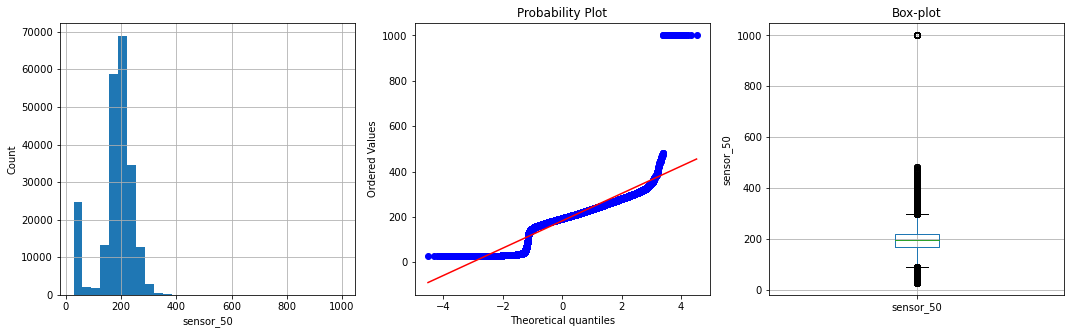

In [107]:
diagnostic_plots(sensors_df, "sensor_50")

In [108]:
sensors_df.isnull().mean()

sensor_00    0.0
sensor_01    0.0
sensor_02    0.0
sensor_03    0.0
sensor_04    0.0
sensor_05    0.0
sensor_06    0.0
sensor_07    0.0
sensor_08    0.0
sensor_09    0.0
sensor_10    0.0
sensor_11    0.0
sensor_12    0.0
sensor_13    0.0
sensor_14    0.0
sensor_16    0.0
sensor_17    0.0
sensor_18    0.0
sensor_19    0.0
sensor_20    0.0
sensor_21    0.0
sensor_22    0.0
sensor_23    0.0
sensor_24    0.0
sensor_25    0.0
sensor_26    0.0
sensor_27    0.0
sensor_28    0.0
sensor_29    0.0
sensor_30    0.0
sensor_31    0.0
sensor_32    0.0
sensor_33    0.0
sensor_34    0.0
sensor_35    0.0
sensor_36    0.0
sensor_37    0.0
sensor_38    0.0
sensor_39    0.0
sensor_40    0.0
sensor_41    0.0
sensor_42    0.0
sensor_43    0.0
sensor_44    0.0
sensor_45    0.0
sensor_46    0.0
sensor_47    0.0
sensor_48    0.0
sensor_49    0.0
sensor_50    0.0
sensor_51    0.0
dtype: float64

<Figure size 432x288 with 0 Axes>

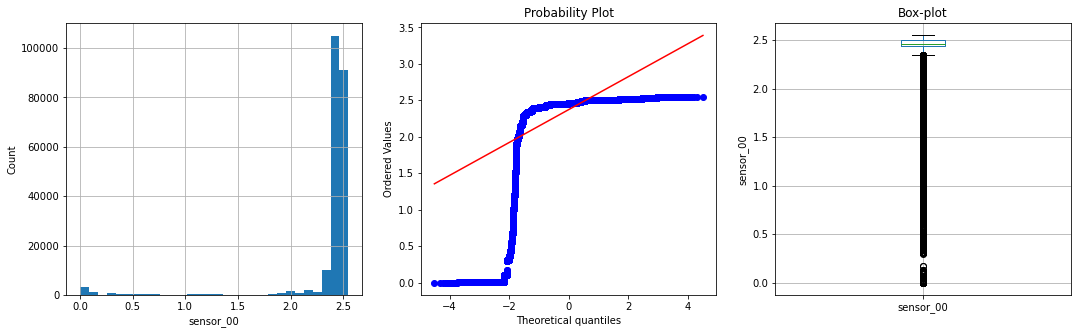

<Figure size 432x288 with 0 Axes>

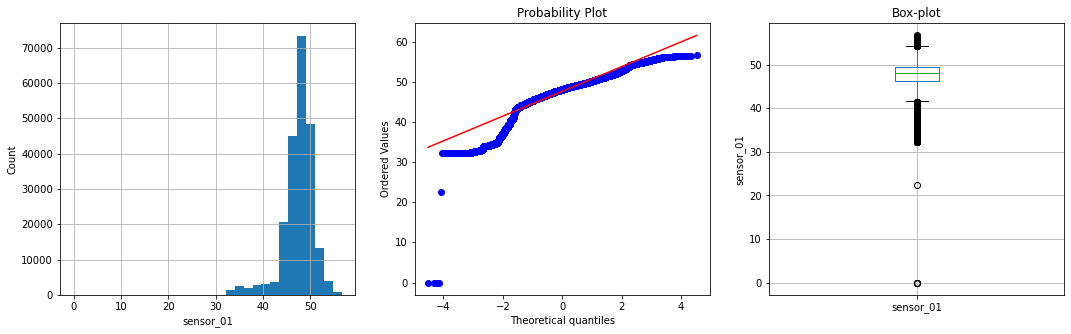

<Figure size 432x288 with 0 Axes>

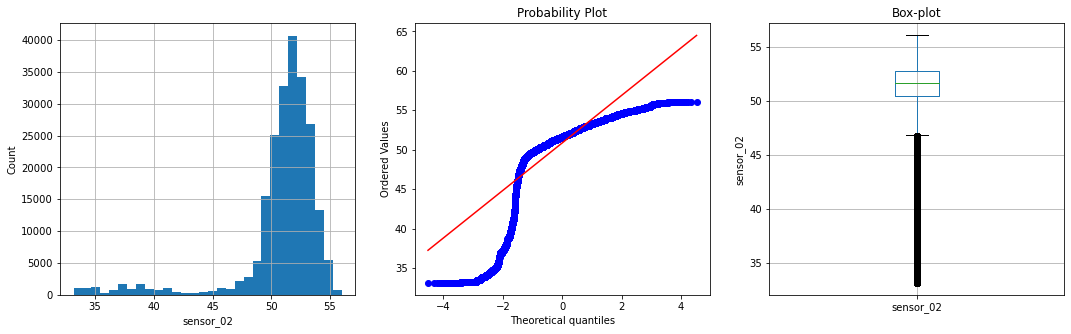

<Figure size 432x288 with 0 Axes>

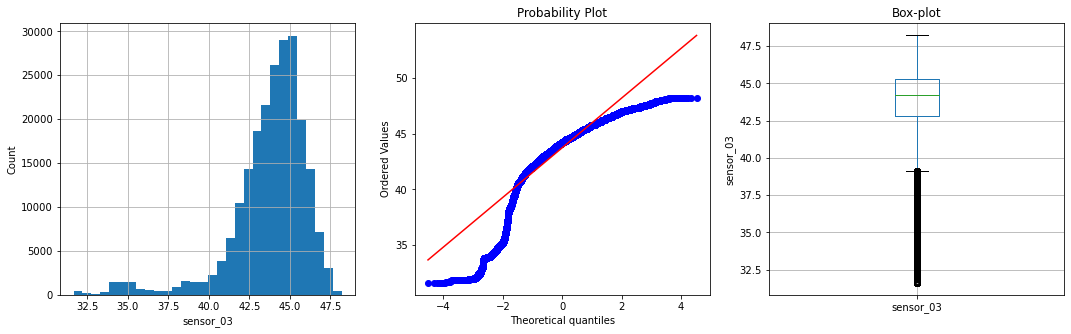

<Figure size 432x288 with 0 Axes>

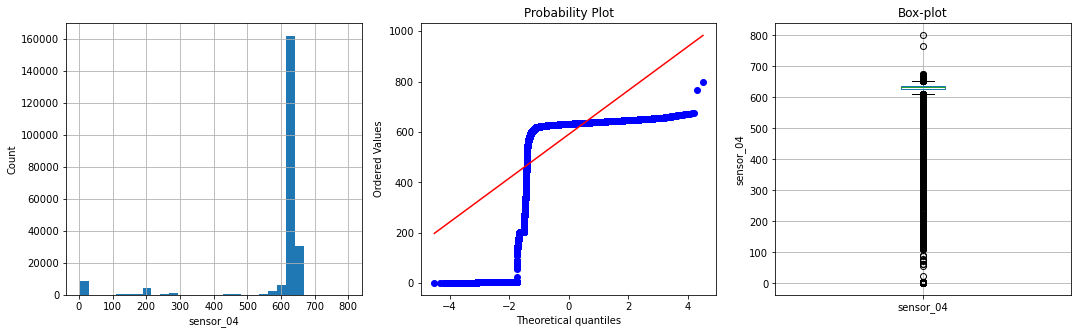

<Figure size 432x288 with 0 Axes>

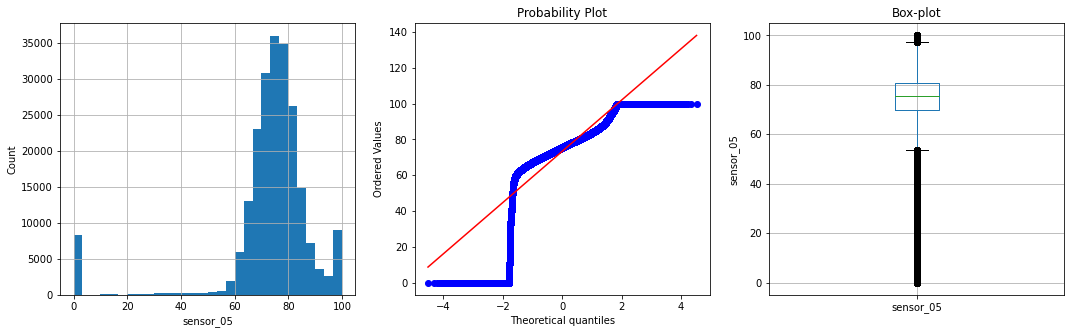

<Figure size 432x288 with 0 Axes>

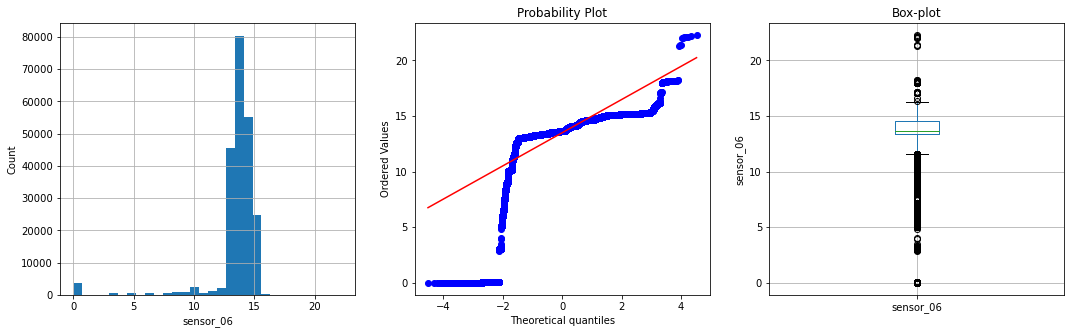

<Figure size 432x288 with 0 Axes>

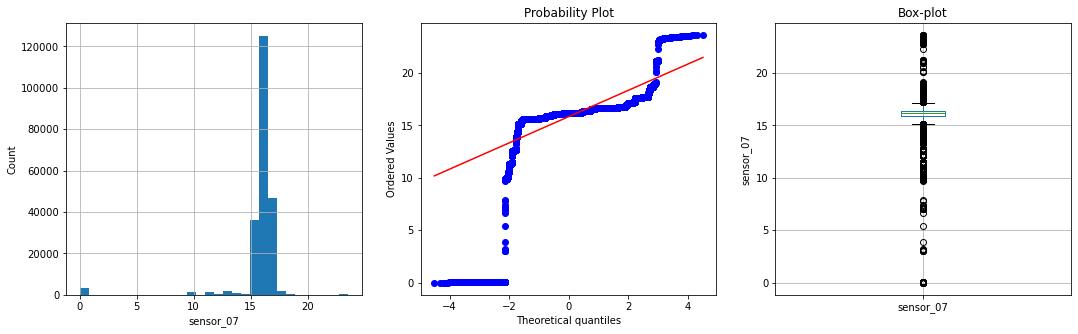

<Figure size 432x288 with 0 Axes>

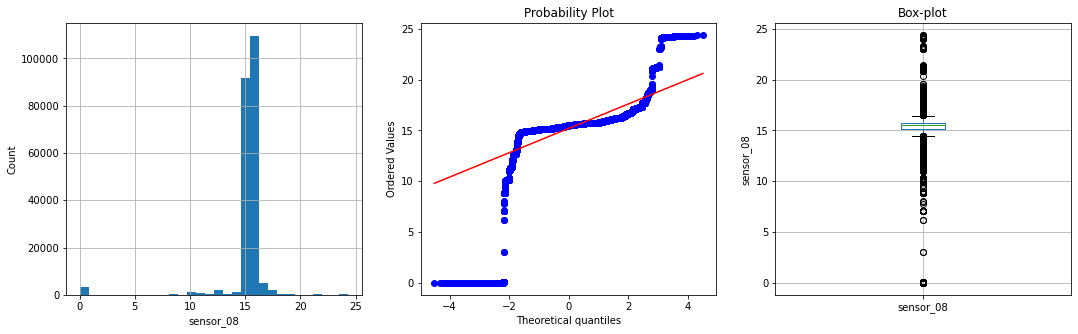

<Figure size 432x288 with 0 Axes>

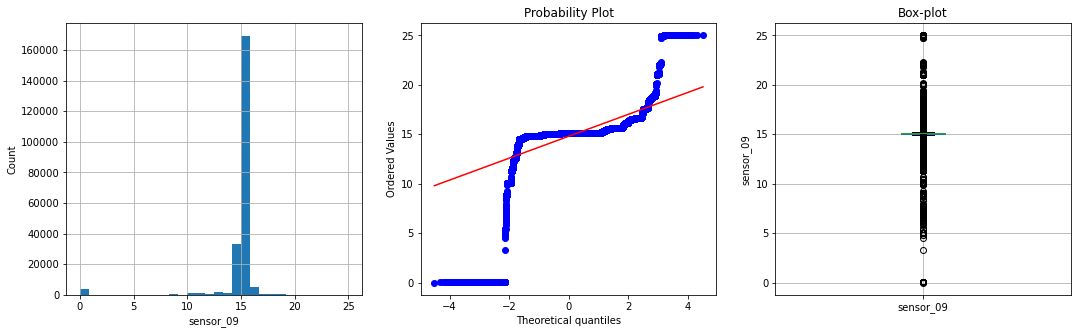

<Figure size 432x288 with 0 Axes>

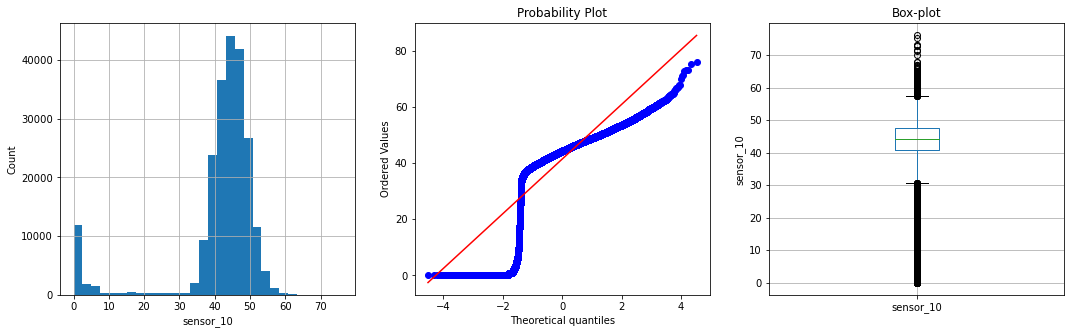

<Figure size 432x288 with 0 Axes>

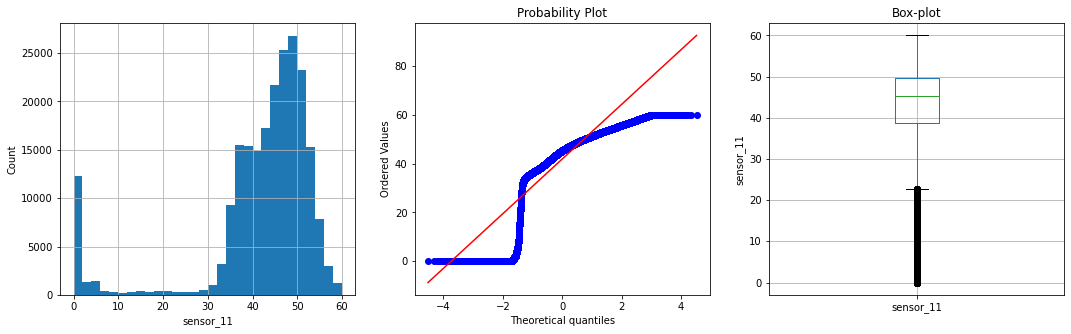

<Figure size 432x288 with 0 Axes>

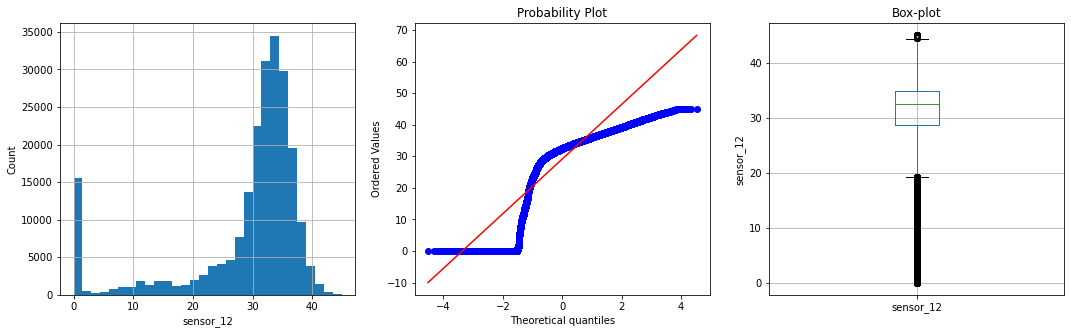

<Figure size 432x288 with 0 Axes>

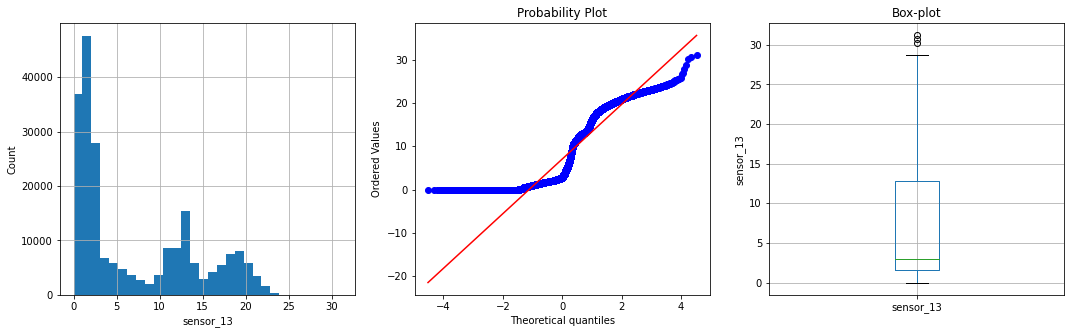

<Figure size 432x288 with 0 Axes>

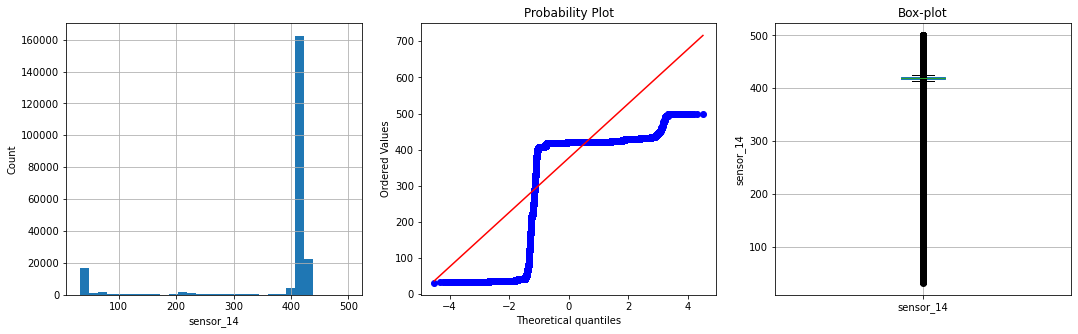

<Figure size 432x288 with 0 Axes>

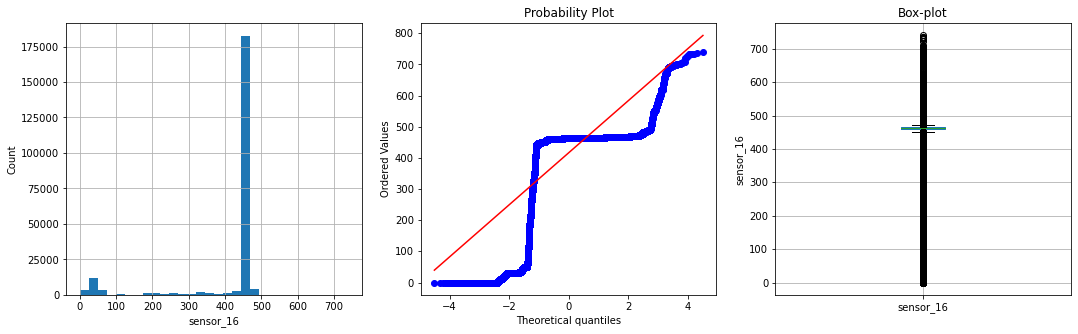

<Figure size 432x288 with 0 Axes>

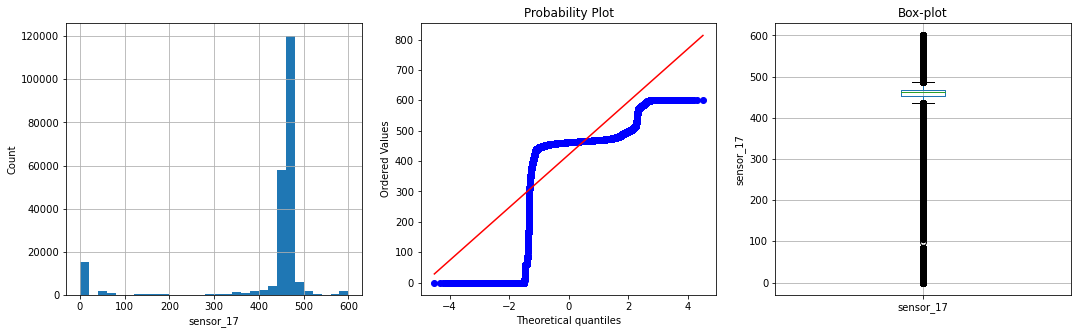

<Figure size 432x288 with 0 Axes>

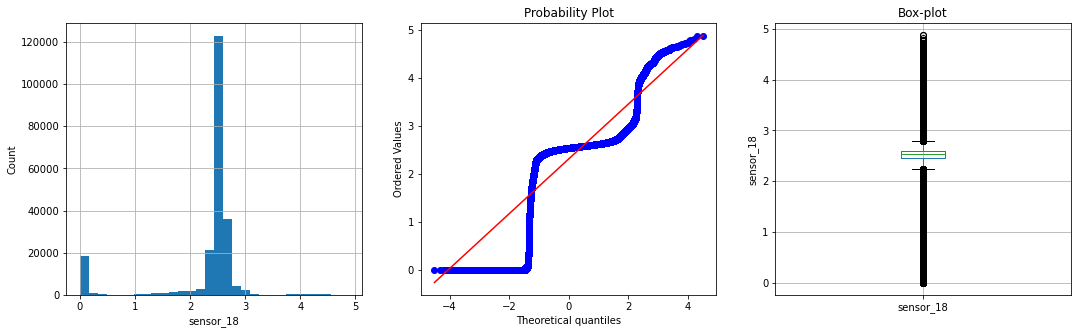

<Figure size 432x288 with 0 Axes>

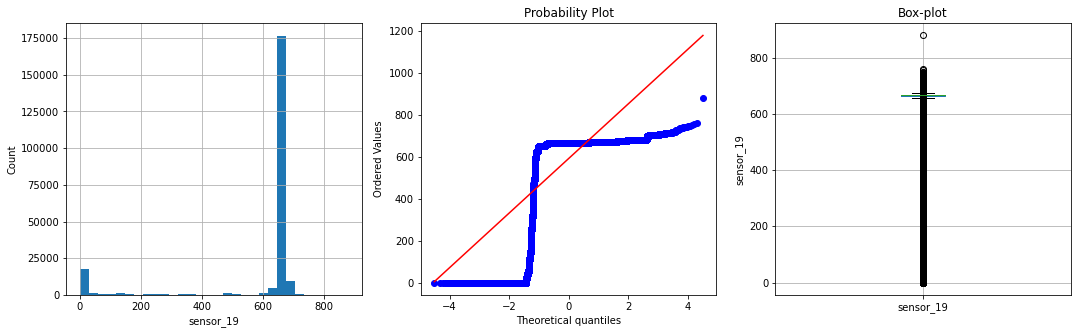

<Figure size 432x288 with 0 Axes>

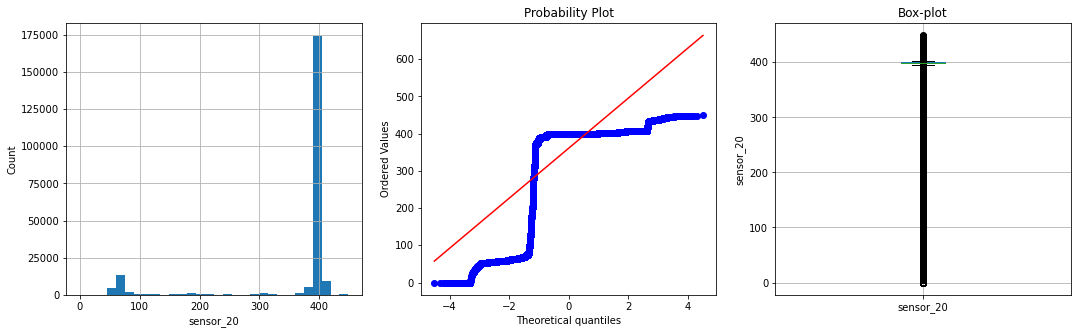

<Figure size 432x288 with 0 Axes>

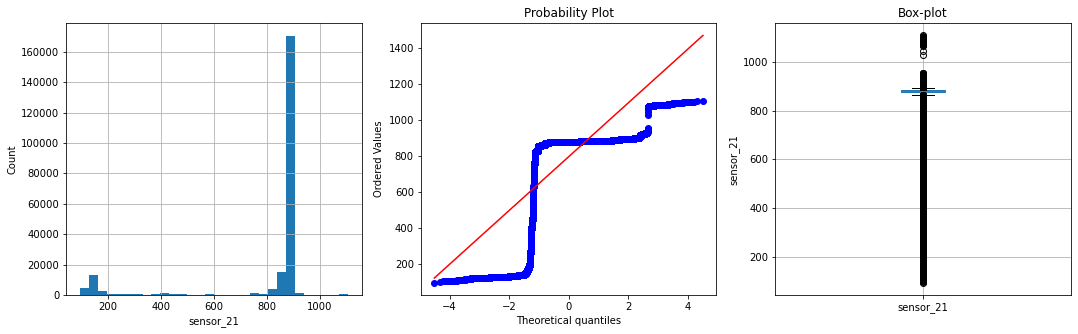

<Figure size 432x288 with 0 Axes>

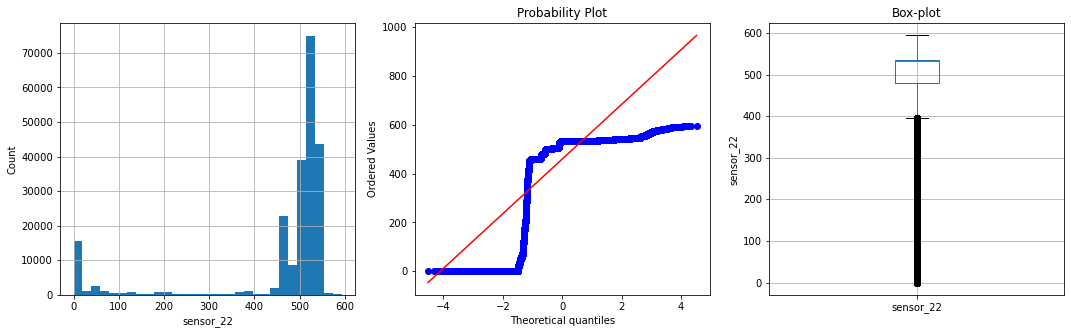

<Figure size 432x288 with 0 Axes>

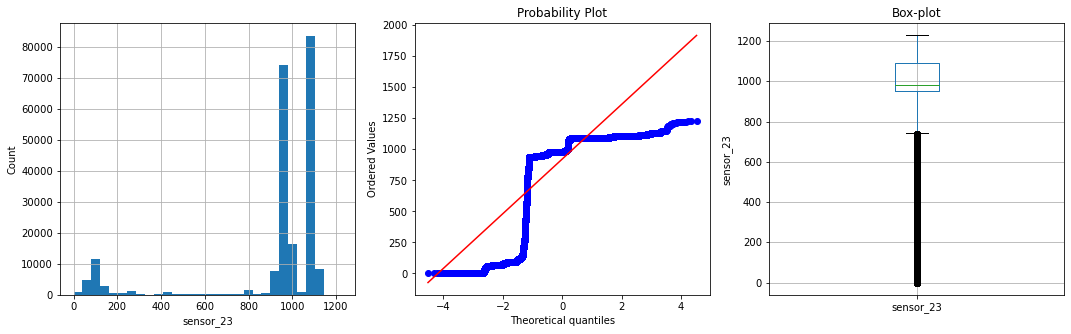

<Figure size 432x288 with 0 Axes>

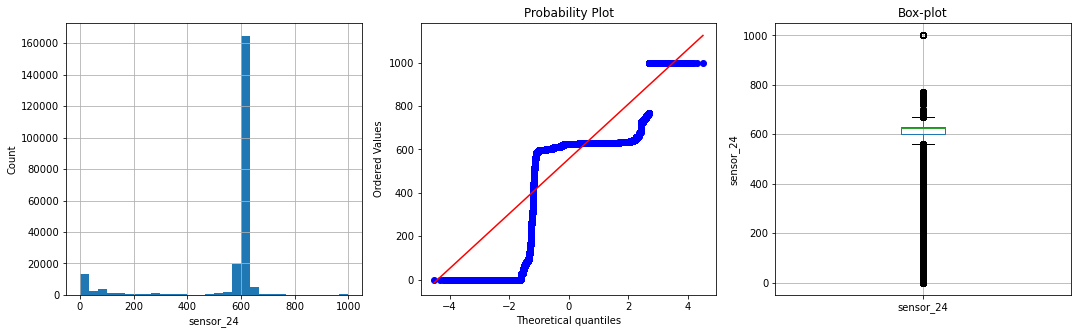

<Figure size 432x288 with 0 Axes>

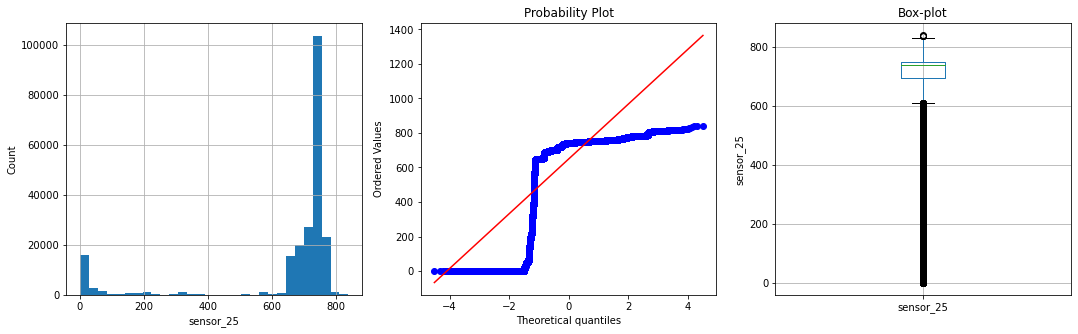

<Figure size 432x288 with 0 Axes>

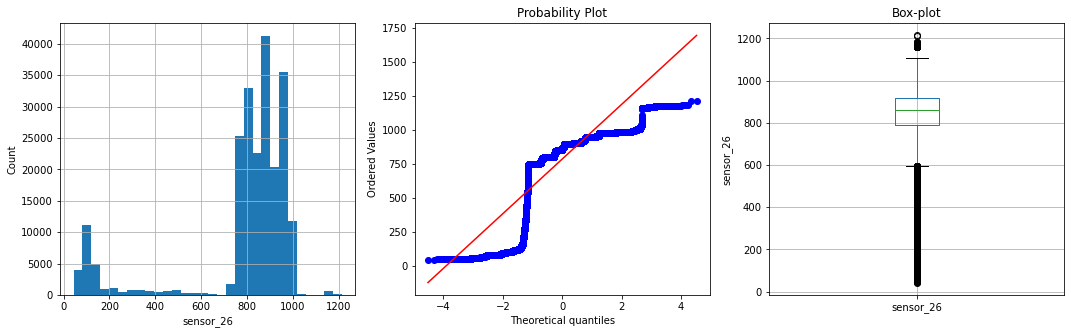

<Figure size 432x288 with 0 Axes>

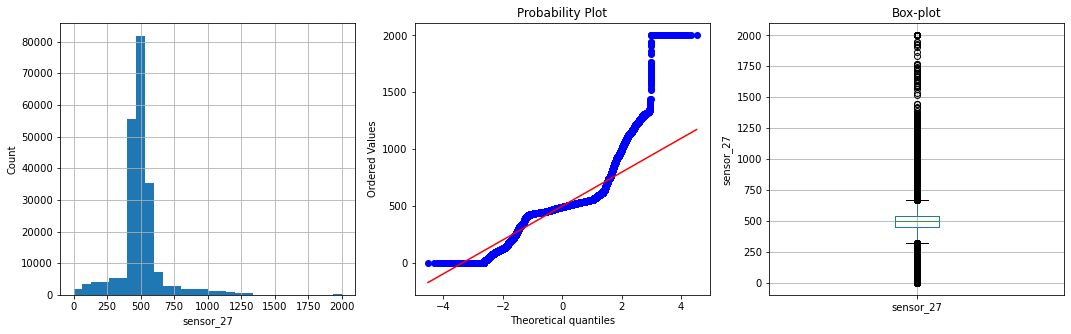

<Figure size 432x288 with 0 Axes>

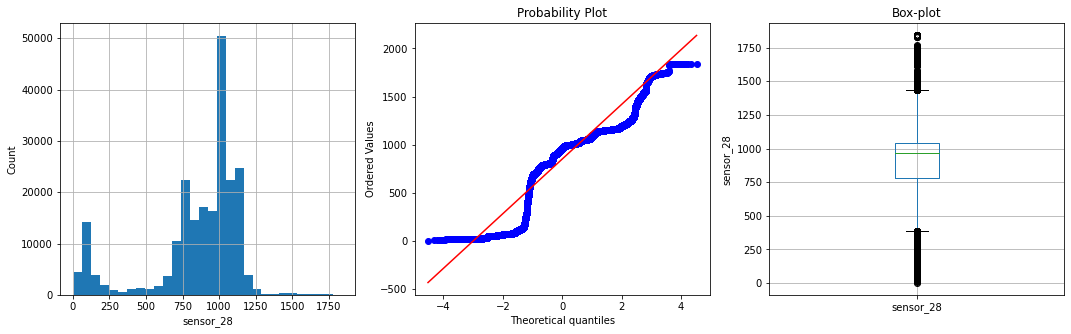

<Figure size 432x288 with 0 Axes>

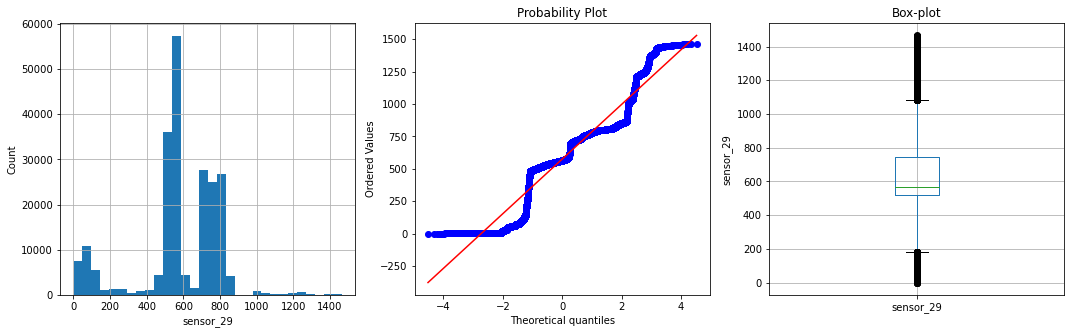

<Figure size 432x288 with 0 Axes>

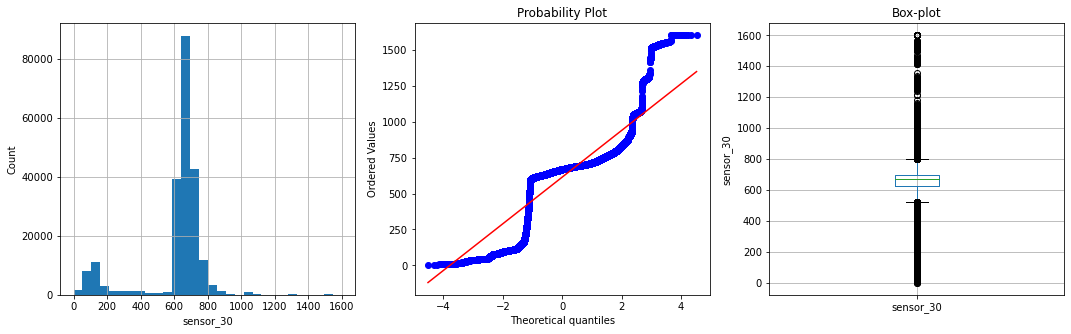

<Figure size 432x288 with 0 Axes>

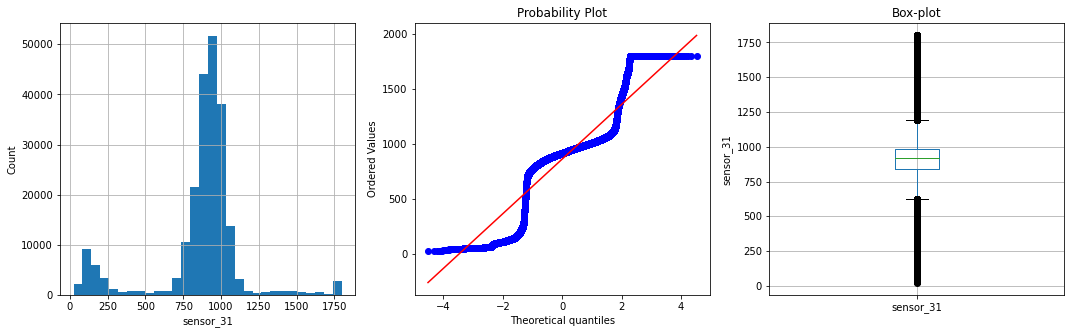

<Figure size 432x288 with 0 Axes>

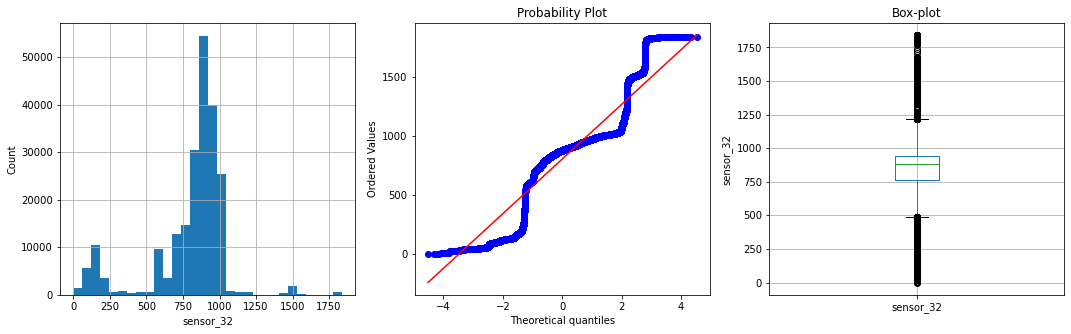

<Figure size 432x288 with 0 Axes>

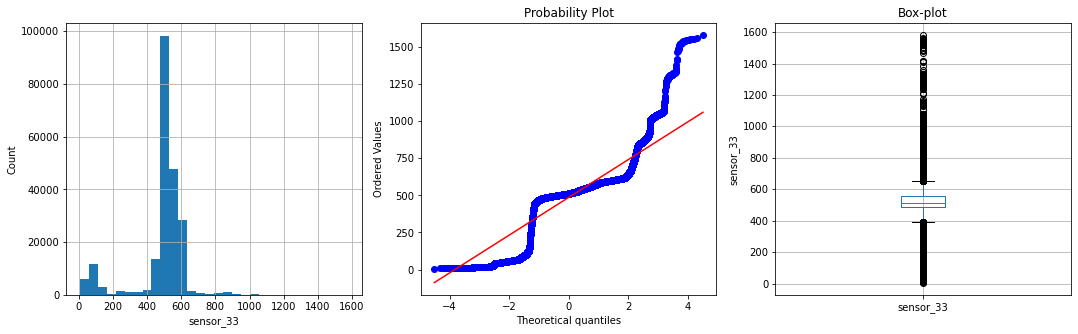

<Figure size 432x288 with 0 Axes>

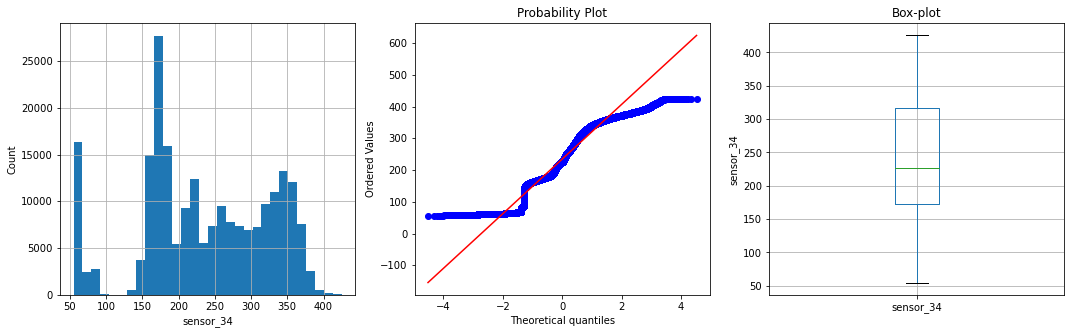

<Figure size 432x288 with 0 Axes>

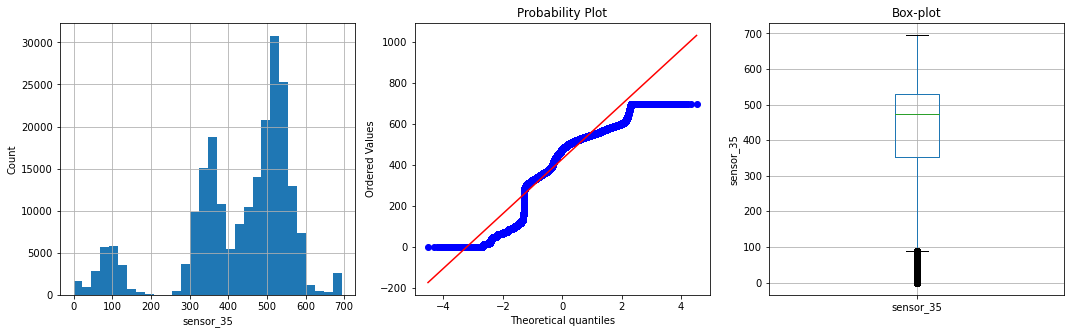

<Figure size 432x288 with 0 Axes>

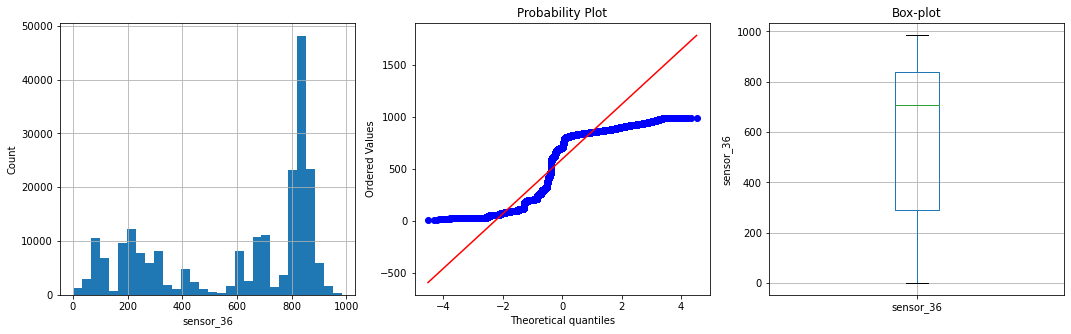

<Figure size 432x288 with 0 Axes>

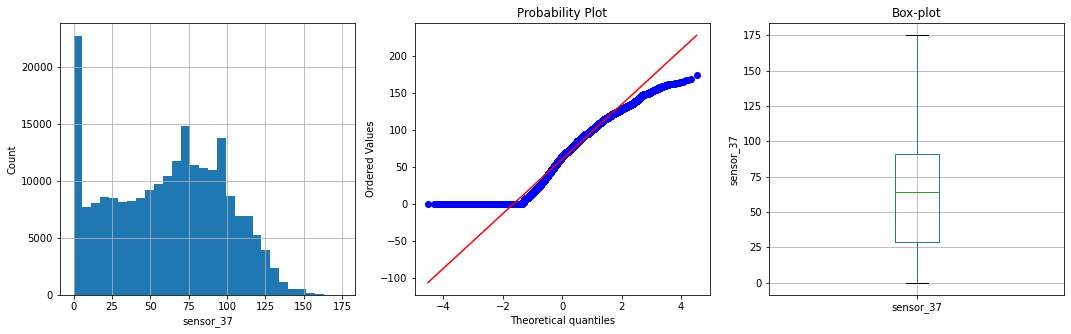

<Figure size 432x288 with 0 Axes>

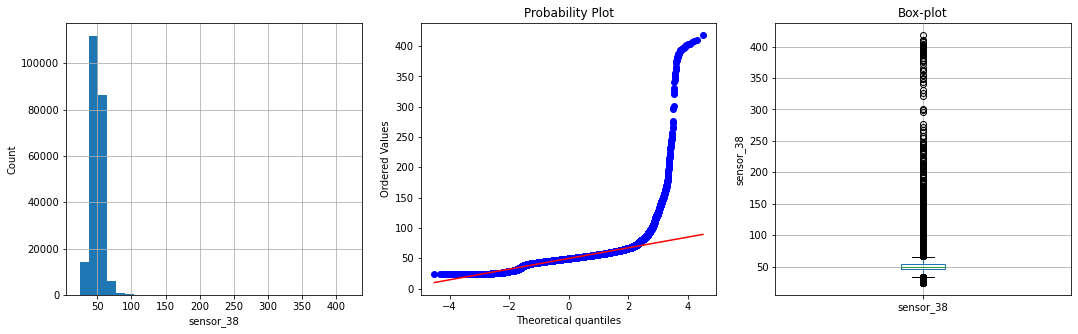

<Figure size 432x288 with 0 Axes>

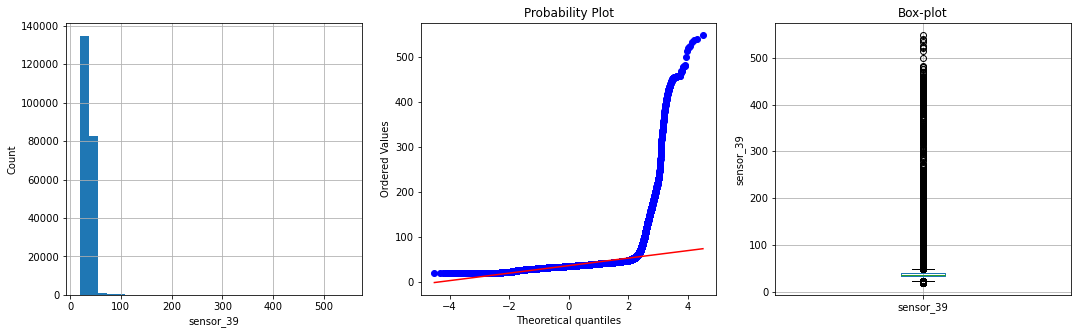

<Figure size 432x288 with 0 Axes>

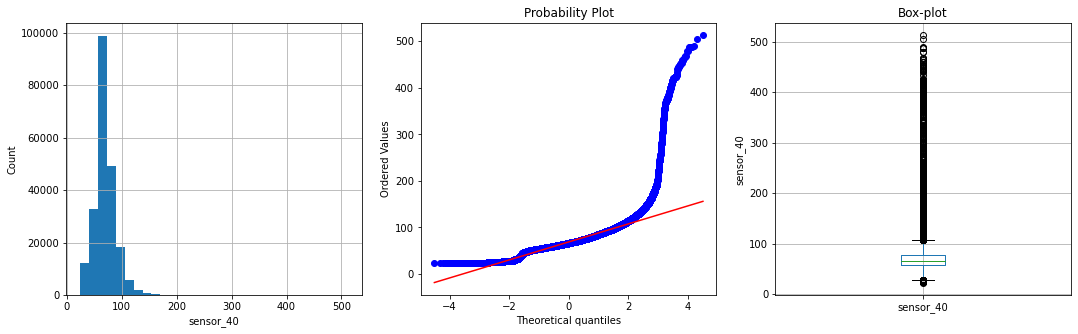

<Figure size 432x288 with 0 Axes>

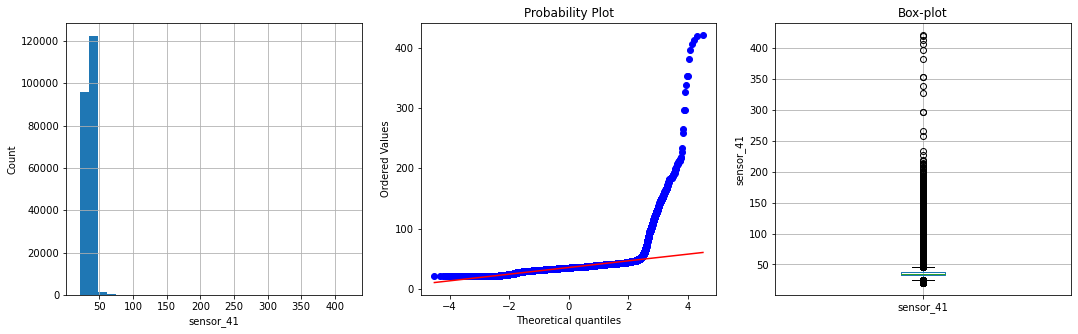

<Figure size 432x288 with 0 Axes>

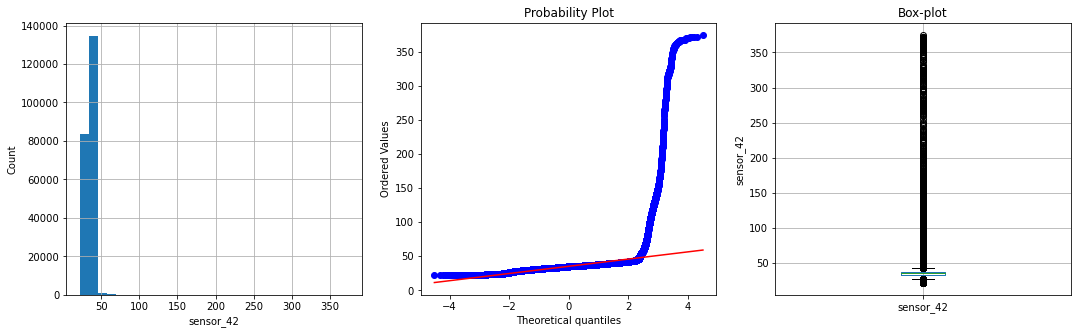

<Figure size 432x288 with 0 Axes>

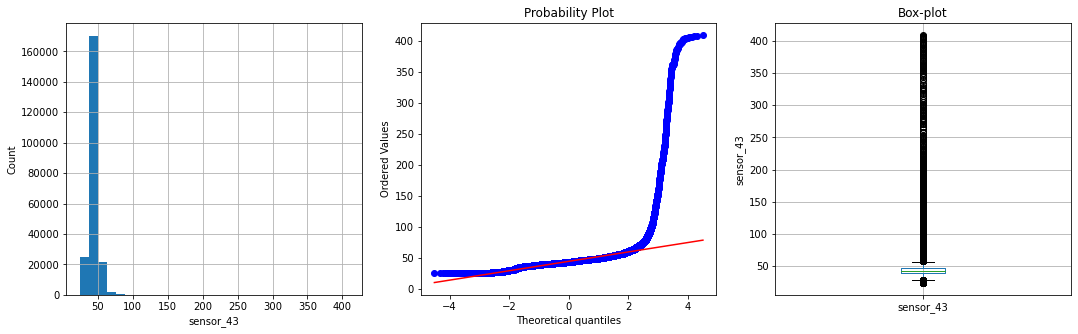

<Figure size 432x288 with 0 Axes>

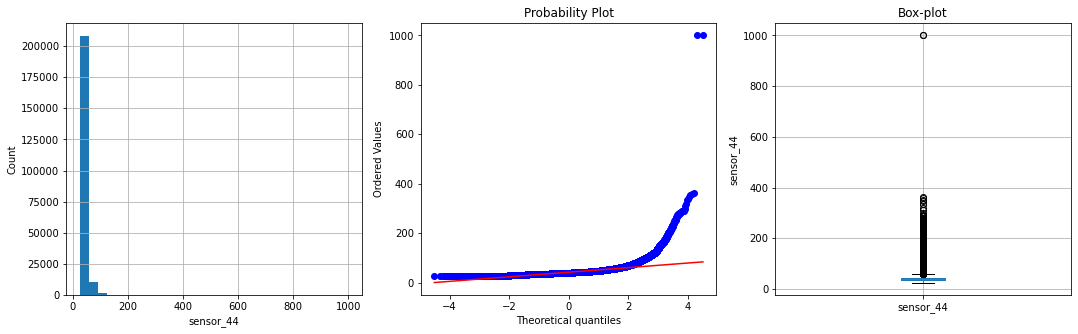

<Figure size 432x288 with 0 Axes>

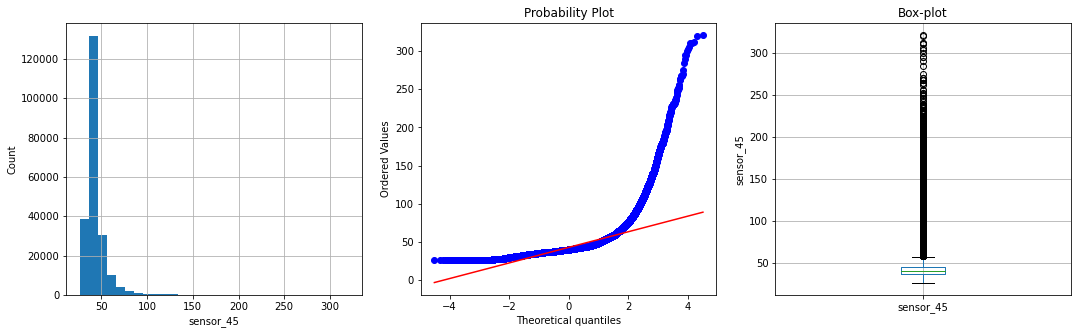

<Figure size 432x288 with 0 Axes>

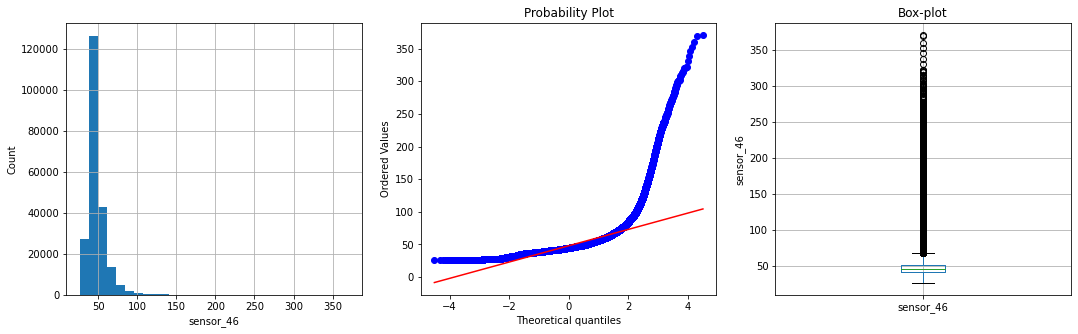

<Figure size 432x288 with 0 Axes>

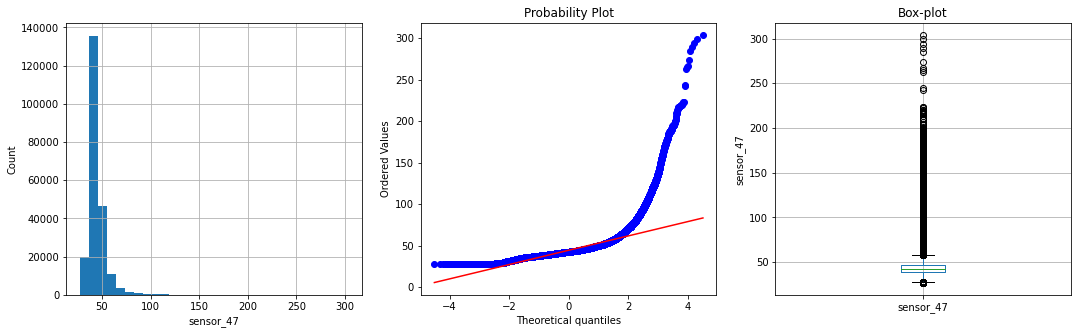

<Figure size 432x288 with 0 Axes>

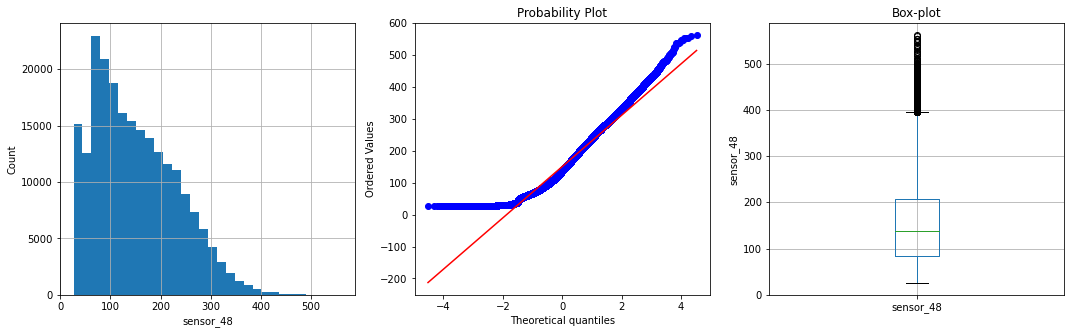

<Figure size 432x288 with 0 Axes>

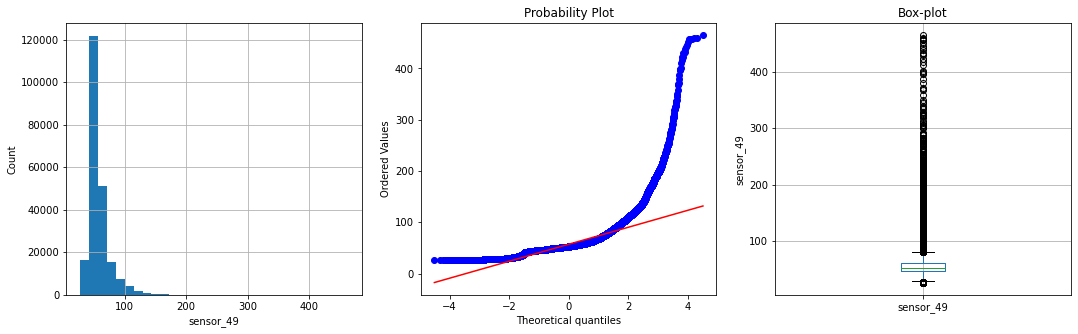

<Figure size 432x288 with 0 Axes>

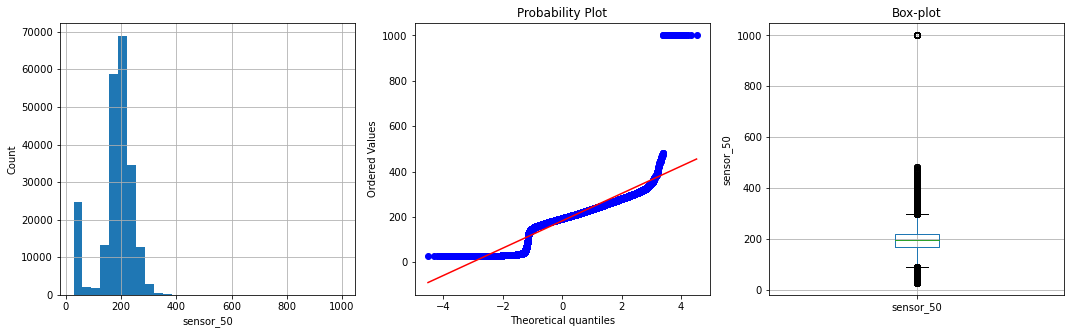

<Figure size 432x288 with 0 Axes>

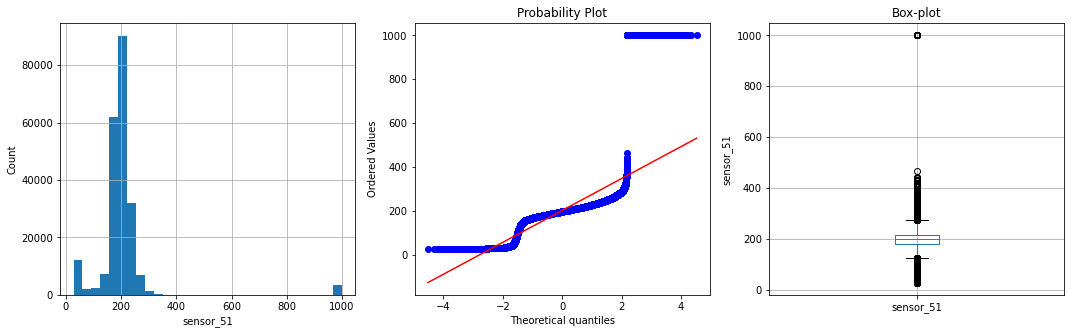

In [109]:
for var in sensors_df.columns:
    diagnostic_plots(sensors_df, var)

### Feature Scaling

In [110]:
# Perform feature scaling using MinMaxScaler

scaler = MinMaxScaler()

sensors_df_scaled = scaler.fit_transform(sensors_df)

sensors_df_scaled = pd.DataFrame(sensors_df_scaled)

sensors_df_scaled.columns = list(sensors_df.columns)

In [111]:
sensors_df_scaled

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0        0.967194   0.830145   0.876660   0.884816   0.792242   0.764598   
1        0.967194   0.830145   0.876660   0.884816   0.792242   0.764598   
2        0.959089   0.834736   0.876660   0.890052   0.797904   0.735461   
3        0.965264   0.830145   0.874763   0.890052   0.784402   0.769891   
4        0.959475   0.830910   0.876660   0.890052   0.794855   0.765891   
...           ...        ...        ...        ...        ...        ...   
220315   0.944423   0.840857   0.759013   0.693717   0.792678   0.645910   
220316   0.941721   0.840857   0.760911   0.693717   0.787887   0.658337   
220317   0.940178   0.840857   0.759013   0.693717   0.781644   0.672945   
220318   0.944037   0.840857   0.759013   0.693717   0.793839   0.650918   
220319   0.940178   0.840857   0.759013   0.693717   0.799066   0.654564   

        sensor_06  sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  \
0        0.602472   0.683630   0.638905   0.602141   0.489146   0.792070   
1        0.602472   0.683630   0.638905   0.602141   0.489146   0.792070   
2        0.598568   0.679645   0.640988   0.600405   0.497561   0.802954   
3        0.598243   0.688535   0.644259   0.603299   0.506916   0.810935   
4        0.599870   0.687002   0.644259   0.603299   0.518868   0.817716   
...           ...        ...        ...        ...        ...        ...   
220315   0.679245   0.705702   0.642474   0.606482   0.567240   0.902675   
220316   0.680872   0.707848   0.642474   0.604745   0.567759   0.908767   
220317   0.677944   0.707848   0.644259   0.604745   0.566682   0.918630   
220318   0.679245   0.702023   0.646044   0.604745   0.556552   0.933220   
220319   0.679245   0.705702   0.642474   0.600405   0.560109   0.941607   

        sensor_12  sensor_13  sensor_14  sensor_16  sensor_17  sensor_18  \
0        0.691492   0.053911   0.828001   0.624378   0.777214   0.526401   
1        0.691492   0.053911   0.828001   0.624378   0.777214   0.526401   
2        0.713088   0.054781   0.830724   0.625597   0.766061   0.513017   
3        0.703827   0.050643   0.830513   0.625756   0.768143   0.514958   
4        0.710045   0.053990   0.828680   0.623854   0.780368   0.534507   
...           ...        ...        ...        ...        ...        ...   
220315   0.845650   0.425340   0.830620   0.626208   0.763936   0.512823   
220316   0.856330   0.424601   0.833522   0.626155   0.780731   0.537316   
220317   0.856151   0.422882   0.829373   0.625092   0.781049   0.537731   
220318   0.864258   0.422395   0.830129   0.617832   0.766324   0.516000   
220319   0.875768   0.420871   0.831494   0.633994   0.760954   0.510398   

        sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  \
0        0.757067   0.888793   0.775172   0.839800   0.795022   0.627674   
1        0.757067   0.888793   0.775172   0.839800   0.795022   0.627674   
2        0.758004   0.890922   0.775590   0.843956   0.800556   0.631133   
3        0.757763   0.889057   0.774076   0.840053   0.796498   0.625408   
4        0.754577   0.892260   0.777728   0.839204   0.797983   0.627183   
...           ...        ...        ...        ...        ...        ...   
220315   0.769885   0.903900   0.789591   0.915024   0.903823   0.611174   
220316   0.769872   0.904991   0.790547   0.911861   0.901274   0.609492   
220317   0.770625   0.906900   0.787247   0.913808   0.901540   0.610994   
220318   0.765278   0.900692   0.783074   0.907925   0.899305   0.605718   
220319   0.769791   0.903591   0.792811   0.912524   0.903274   0.608536   

        sensor_25  sensor_26  sensor_27  sensor_28  sensor_29  sensor_30  \
0        0.883441   0.687219   0.214519   0.425121   0.466899   0.371528   
1        0.883441   0.687219   0.214519   0.425121   0.466899   0.371528   
2        0.882355   0.688781   0.227120   0.421517   0.487833   0.413484   
3        0.880531   0.686952   0.237437   0.422027  

### Feature Selection

#### Remove constant features

In [112]:
# Check for constant features in dataset
constant_features = [var for var in sensors_df_scaled.columns if sensors_df_scaled[var].std() == 0] 

constant_features

[]

#### Remove quasi-constant features

In [113]:
# Remove quasi-constant features where 99% of the values are similar
remover = VarianceThreshold(threshold = 0.01)

# Find the values with low variance
remover.fit(sensors_df_scaled)

# Print remaining variables
print(remover.get_feature_names_out())

['sensor_00' 'sensor_02' 'sensor_03' 'sensor_04' 'sensor_05' 'sensor_10'
 'sensor_11' 'sensor_12' 'sensor_13' 'sensor_14' 'sensor_16' 'sensor_17'
 'sensor_18' 'sensor_19' 'sensor_20' 'sensor_21' 'sensor_22' 'sensor_23'
 'sensor_24' 'sensor_25' 'sensor_26' 'sensor_28' 'sensor_29' 'sensor_30'
 'sensor_31' 'sensor_32' 'sensor_34' 'sensor_35' 'sensor_36' 'sensor_37'
 'sensor_48' 'sensor_51']


In [114]:
sensors_df_scaled = remover.transform(sensors_df_scaled)

In [115]:
sensors_df_scaled = pd.DataFrame(sensors_df_scaled)

sensors_df_scaled.columns = remover.get_feature_names_out()

In [116]:
sensors_df_scaled

sensor_00  sensor_02  sensor_03  sensor_04  sensor_05  sensor_10  \
0        0.967194   0.876660   0.884816   0.792242   0.764598   0.489146   
1        0.967194   0.876660   0.884816   0.792242   0.764598   0.489146   
2        0.959089   0.876660   0.890052   0.797904   0.735461   0.497561   
3        0.965264   0.874763   0.890052   0.784402   0.769891   0.506916   
4        0.959475   0.876660   0.890052   0.794855   0.765891   0.518868   
...           ...        ...        ...        ...        ...        ...   
220315   0.944423   0.759013   0.693717   0.792678   0.645910   0.567240   
220316   0.941721   0.760911   0.693717   0.787887   0.658337   0.567759   
220317   0.940178   0.759013   0.693717   0.781644   0.672945   0.566682   
220318   0.944037   0.759013   0.693717   0.793839   0.650918   0.556552   
220319   0.940178   0.759013   0.693717   0.799066   0.654564   0.560109   

        sensor_11  sensor_12  sensor_13  sensor_14  sensor_16  sensor_17  \
0        0.792070   0.691492   0.053911   0.828001   0.624378   0.777214   
1        0.792070   0.691492   0.053911   0.828001   0.624378   0.777214   
2        0.802954   0.713088   0.054781   0.830724   0.625597   0.766061   
3        0.810935   0.703827   0.050643   0.830513   0.625756   0.768143   
4        0.817716   0.710045   0.053990   0.828680   0.623854   0.780368   
...           ...        ...        ...        ...        ...        ...   
220315   0.902675   0.845650   0.425340   0.830620   0.626208   0.763936   
220316   0.908767   0.856330   0.424601   0.833522   0.626155   0.780731   
220317   0.918630   0.856151   0.422882   0.829373   0.625092   0.781049   
220318   0.933220   0.864258   0.422395   0.830129   0.617832   0.766324   
220319   0.941607   0.875768   0.420871   0.831494   0.633994   0.760954   

        sensor_18  sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  \
0        0.526401   0.757067   0.888793   0.775172   0.839800   0.795022   
1        0.526401   0.757067   0.888793   0.775172   0.839800   0.795022   
2        0.513017   0.758004   0.890922   0.775590   0.843956   0.800556   
3        0.514958   0.757763   0.889057   0.774076   0.840053   0.796498   
4        0.534507   0.754577   0.892260   0.777728   0.839204   0.797983   
...           ...        ...        ...        ...        ...        ...   
220315   0.512823   0.769885   0.903900   0.789591   0.915024   0.903823   
220316   0.537316   0.769872   0.904991   0.790547   0.911861   0.901274   
220317   0.537731   0.770625   0.906900   0.787247   0.913808   0.901540   
220318   0.516000   0.765278   0.900692   0.783074   0.907925   0.899305   
220319   0.510398   0.769791   0.903591   0.792811   0.912524   0.903274   

        sensor_24  sensor_25  sensor_26  sensor_28  sensor_29  sensor_30  \
0        0.627674   0.883441   0.687219   0.425121   0.466899   0.371528   
1        0.627674   0.883441   0.687219   0.425121   0.466899   0.371528   
2        0.631133   0.882355   0.688781   0.421517   0.487833   0.413484   
3        0.625408   0.880531   0.686952   0.422027   0.470622   0.428819   
4        0.627183   0.878544   0.686235   0.425142   0.480374   0.394676   
...           ...        ...        ...        ...        ...        ...   
220315   0.611174   0.834456   0.643272   0.421862   0.330503   0.432292   
220316   0.609492   0.831958   0.646340   0.431852   0.348184   0.420139   
220317   0.610994   0.837524   0.646499   0.432808   0.335781   0.430845   
220318   0.605718   0.830624   0.640805   0.429405   0.334038   0.429398   
220319   0.608536   0.831467   0.646211   0.433299   0.338261   0.428819   

        sensor_31  sensor_32  sensor_34  sensor_35  sensor_36  sensor_37  \
0        0.370968   0.369881   0.315796   0.492317   0.196379   0.516428   
1        0.370968   0.369881   0.315796   0.492317   0.196379   0.516428   
2        0.392962   0.377674   0.310520   0.494177   0.202392   0.536904   
3        0.411437   0.371481   0.301123   0.495276  

#### Remove correlated features

In [117]:
# function first calculates the correlations between the columns of the dataset 

correlated = DropCorrelatedFeatures(method='pearson', threshold=0.8)

In [118]:
correlated.fit(sensors_df_scaled)

DropCorrelatedFeatures()

In [123]:
correlated.correlated_feature_sets_

[{'sensor_02', 'sensor_03', 'sensor_04'},
 {'sensor_10', 'sensor_11'},
 {'sensor_14',
  'sensor_16',
  'sensor_17',
  'sensor_18',
  'sensor_19',
  'sensor_20',
  'sensor_21',
  'sensor_22',
  'sensor_23',
  'sensor_24',
  'sensor_25',
  'sensor_26'},
 {'sensor_30', 'sensor_32'},
 {'sensor_34', 'sensor_35'}]

In [124]:
sensors_df_scaled = correlated.transform(sensors_df_scaled)

sensors_df_scaled

This the final dataset after data preprocessing.

We reduced the number of features from 51 to 16.

### Preprocessing Pipeline

Define Pipeline for data preprocessing to provide a convenient way to organize the preprocessing steps in a structured way.

In [159]:
preprocessor_pipe = Pipeline([
    ('imputer', RandomSampleImputer()),      
    ('scaler', MinMaxScaler()),
    ('constant_features', VarianceThreshold(threshold = 0.01)),
    ('duplicate_features', DropDuplicateFeatures()),
    ('correlated_features', DropCorrelatedFeatures(threshold = 0.8, method = 'pearson'))
])

In [160]:
df_final = preprocessor_pipe.fit_transform(sensors_df)

In [161]:
df_final

0         1         4         5         7         8         9  \
0       0.967194  0.876660  0.764598  0.489146  0.691492  0.053911  0.828001   
1       0.967194  0.876660  0.764598  0.489146  0.691492  0.053911  0.828001   
2       0.959089  0.876660  0.735461  0.497561  0.713088  0.054781  0.830724   
3       0.965264  0.874763  0.769891  0.506916  0.703827  0.050643  0.830513   
4       0.959475  0.876660  0.765891  0.518868  0.710045  0.053990  0.828680   
...          ...       ...       ...       ...       ...       ...       ...   
220315  0.944423  0.759013  0.645910  0.567240  0.845650  0.425340  0.830620   
220316  0.941721  0.760911  0.658337  0.567759  0.856330  0.424601  0.833522   
220317  0.940178  0.759013  0.672945  0.566682  0.856151  0.422882  0.829373   
220318  0.944037  0.759013  0.650918  0.556552  0.864258  0.422395  0.830129   
220319  0.940178  0.759013  0.654564  0.560109  0.875768  0.420871  0.831494   

              21        22        23        24        26        28        29  \
0       0.425121  0.466899  0.371528  0.370968  0.315796  0.196379  0.516428   
1       0.425121  0.466899  0.371528  0.370968  0.315796  0.196379  0.516428   
2       0.421517  0.487833  0.413484  0.392962  0.310520  0.202392  0.536904   
3       0.422027  0.470622  0.428819  0.411437  0.301123  0.194447  0.577701   
4       0.425142  0.480374  0.394676  0.417889  0.296404  0.195168  0.581493   
...          ...       ...       ...       ...       ...       ...       ...   
220315  0.421862  0.330503  0.432292  0.535484  0.569651  0.830424  0.000000   
220316  0.431852  0.348184  0.420139  0.508504  0.559369  0.819672  0.000000   
220317  0.432808  0.335781  0.430845  0.507038  0.555632  0.818191  0.000000   
220318  0.429405  0.334038  0.429398  0.511144  0.556931  0.819739  0.000000   
220319  0.433299  0.338261  0.428819  0.503226  0.549162  0.823854  0.000000   

              30        31  
0       0.245946  0.178571  
1       0.245946  0.178571  
2       0.242162  0.180952  
3       0.242162  0.180357  
4       0.246487  0.178571  
...          ...       ...  
220315  0.347568  0.209226  
220316  0.350270  0.209226  
220317  0.356757  0.210119  
220318  0.366486  0.212202  
220319  0.375676  0.212202  

[220320 rows x 16 columns]

In [162]:
# Transform pandas DataFrame to numpy array
df_final = df_final.to_numpy()

In [163]:
df_final

array([[0.9671944 , 0.87665996, 0.76459842, ..., 0.5164279 , 0.2459459 ,
        0.17857144],
       [0.9671944 , 0.87665996, 0.76459842, ..., 0.5164279 , 0.2459459 ,
        0.17857144],
       [0.95908931, 0.87665996, 0.73546068, ..., 0.53690358, 0.24216205,
        0.18095238],
       ...,
       [0.9401777 , 0.75901303, 0.67294531, ..., 0.        , 0.35675664,
        0.21011906],
       [0.94403723, 0.75901312, 0.65091828, ..., 0.        , 0.3664865 ,
        0.21220233],
       [0.9401777 , 0.75901312, 0.65456419, ..., 0.        , 0.37567572,
        0.21220233]])

### Make Timeseries training pairs

In [127]:
# Function checks whether the machine experienced a pump failure during the specified time period
def check_for_pump_failures(start, stop):
    for minute in range(start, stop):
        machine_state_in_this_minute = data["machine_status"].iloc[minute]

    if machine_state_in_this_minute in ["BROKEN", "RECOVERING"]:
        return 1
    
    return 0

In [135]:
# Function to create list of training pairs
def make_training_pairs(df, nr_examples_to_prepare):
    input_minutes_window = 60
    
    output_minutes_window = 60 * 24

    nr_rows_total = df.shape[0]

    max_row_nr = nr_rows_total - input_minutes_window - output_minutes_window
    
    training_pairs = []
    
    for example_nr in range(0, nr_examples_to_prepare):
        
        # Flag to track whether we've found a suitable example
        found_example_where_pump_worked_in_input_window = False
        
        while not found_example_where_pump_worked_in_input_window:
            # Choose a random minute within the dataset
            rnd_minute = np.random.randint(0, max_row_nr)
            
            # Define the start and stop times for the input window
            start = rnd_minute
            stop = start + input_minutes_window
            
            # Check if there were any pump failures within the input window
            if check_for_pump_failures(start, stop) == 0:
                found_example_where_pump_worked_in_input_window = True
        
        # Extract the input window from the sensor data
        input_window = df[rnd_minute: rnd_minute + input_minutes_window]
        
        # Flatten the input window into a single vector
        input_vector = input_window.flatten()
        
        # Define the start and stop times for the output window
        start = rnd_minute + input_minutes_window
        stop = rnd_minute + input_minutes_window + output_minutes_window
        
        output_value = check_for_pump_failures(start, stop)
        
        training_pairs.append((input_vector, output_value))
    
    return training_pairs

# Function to split training pairs into a training set and a test set
def split_training_pairs(training_pairs, nr_examples_to_prepare):
    input_vec_len = training_pairs[0][0].shape[0]
    output_vec_len = 1
    
    D = np.zeros((nr_examples_to_prepare, input_vec_len + output_vec_len))
    
    for nr in range(0, nr_examples_to_prepare):
        (x, y) = training_pairs[nr]
        
        D[nr, 0:input_vec_len] = x
        D[nr, input_vec_len] = y
    
    nr_train_samples = int(nr_examples_to_prepare / 2)

    x_train = D[0:nr_train_samples, 0:input_vec_len]
    y_train = D[0:nr_train_samples, input_vec_len]

    x_test = D[nr_train_samples: , 0:input_vec_len]
    y_test = D[nr_train_samples: , input_vec_len]
    
    return x_train, x_test, y_train, y_test

In [136]:
examples_to_prepare = 2000

training_pairs = make_training_pairs(df_final, examples_to_prepare)

In [137]:
len(training_pairs)

2000

In [138]:
X_train, X_test, y_train, y_test = split_training_pairs(training_pairs, examples_to_prepare)

In [139]:
X_train.shape, X_test.shape

((1000, 960), (1000, 960))

In [140]:
y_train.shape, y_test.shape

((1000,), (1000,))

## Model Training using Machine Learning Algorithms

In [180]:
# Function performs a grid search using the specified machine learning model
def model_training(model, param_grid, cv, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv = cv, n_jobs = -1, scoring = 'roc_auc')
    grid_search = grid_search.fit(X_train, y_train)
    
    print("{0} evaluation results:".format(type(model).__name__))
    
    models_ml_list.append(type(model).__name__)
    
    score_func_ml(grid_search, X_train, y_train, X_test, y_test)

# Function prints the evaluation scores for the specified grid search model and stores results into lists
def score_func_ml(grid_search_model, X_train, y_train, X_test, y_test):
    pred = grid_search_model.predict(X_test)
    train_score = grid_search_model.score(X_train, y_train)
    test_score = grid_search_model.score(X_test, y_test)
    
    print("Train roc-auc score: {0:.3g}".format(train_score))
    print("Test roc-auc score: {0:.3g}\n".format(test_score))
    print(confusion_matrix(y_test, pred), '\n')
    print("Precision_score: {0:.3g}\n".format(precision_score(y_test, pred)))
    print("Recall: {0:.3g}\n".format(recall_score(y_test, pred)))
    print("Accuracy_score: {0:.3g}\n".format(accuracy_score(y_test, pred)))
    print("F1_score: {0:.3g}\n".format(f1_score(y_test, pred)))
    print(grid_search_model.best_params_)
    print("\n")
    
    roc_auc_score_ml_list.append(round(test_score, 3))
    accuracy_score_ml_list.append(round(accuracy_score(y_test, pred), 3))
    precision_score_ml_list.append(round(precision_score(y_test, pred), 3))
    recall_score_ml_list.append(round(recall_score(y_test, pred), 3))
    f1_score_ml_list.append(round(f1_score(y_test, pred), 3))
    cm_ml_list.append(confusion_matrix(y_test, pred))

In [181]:
# Create empty lists to save ML models evaluation results.

models_ml_list = []

roc_auc_score_ml_list = []

accuracy_score_ml_list = []

precision_score_ml_list = []

recall_score_ml_list = []

f1_score_ml_list = []

cm_ml_list = []

### Logistic Regression

In [182]:
%%timeit -r 1 -n 1

lr_model = LogisticRegression()

param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'none', 'elasticnet'],
    'dual': [True, False],
    'max_iter': range(100, 300, 50),
    'C': [0.7, 0.8, 0.9, 1.0],
    'fit_intercept': [True, False]
}

model_training(lr_model, param_grid_lr, 10, X_train, y_train, X_test, y_test)

LogisticRegression evaluation results:
Train roc-auc score: 0.861
Test roc-auc score: 0.795

[[948   0]
 [ 49   3]] 

Precision_score: 1

Recall: 0.0577

Accuracy_score: 0.951

F1_score: 0.109

{'C': 0.7, 'dual': False, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


3min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### KNN Classifier

In [183]:
%%timeit -r 1 -n 1

knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': range(3, 13, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'p': [1, 2]
}

model_training(knn_model, param_grid_knn, 10, X_train, y_train, X_test, y_test)

KNeighborsClassifier evaluation results:
Train roc-auc score: 1
Test roc-auc score: 0.958

[[947   1]
 [ 48   4]] 

Precision_score: 0.8

Recall: 0.0769

Accuracy_score: 0.951

F1_score: 0.14

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


6.38 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Random Forest Classifier

In [184]:
%%timeit -r 1 -n 1

rf_model = RandomForestClassifier()

param_grid_rf = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3],
        'n_estimators': range(100, 300, 50)
}

model_training(rf_model, param_grid_rf, 10, X_train, y_train, X_test, y_test)

RandomForestClassifier evaluation results:
Train roc-auc score: 1
Test roc-auc score: 0.952

[[948   0]
 [ 45   7]] 

Precision_score: 1

Recall: 0.135

Accuracy_score: 0.955

F1_score: 0.237

{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


1min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Gradient Boosting Classifier

In [185]:
%%timeit -r 1 -n 1

gbc_model = GradientBoostingClassifier()

param_grid_gbc = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [150, 200, 250],
    'criterion': ['friedman_mse', 'squared_error', 'mse']
}

model_training(gbc_model, param_grid_gbc, 10, X_train, y_train, X_test, y_test)

GradientBoostingClassifier evaluation results:
Train roc-auc score: 1
Test roc-auc score: 0.89

[[940   8]
 [ 46   6]] 

Precision_score: 0.429

Recall: 0.115

Accuracy_score: 0.946

F1_score: 0.182

{'criterion': 'squared_error', 'learning_rate': 0.3, 'loss': 'deviance', 'n_estimators': 250}


14min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Machine Learning Models Results

In [186]:
# Function to show the top 10 models sorted by the specified metric
def results_plot(metric, df):
    plt.figure(figsize=(12, 5))
    
    df = df.loc[(df[metric] != 0)]
    
    sns.barplot(data = df.sort_values(by = metric, ascending = False).head(10), 
            x = metric, y = 'Model')
    plt.title(metric, fontsize = 12)
    plt.xlabel(metric)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.show()

# Function to show a heatmap of the confusion matrix
def plot_cm(model, cm):
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
    plt.title(model)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.show()

In [187]:
# Create dataframe with model evaluation results

model_ml_results_df = pd.DataFrame({
    'Model': models_ml_list,
    'roc_auc_score': roc_auc_score_ml_list, 
    'accuracy_score': accuracy_score_ml_list, 
    'precision_score': precision_score_ml_list,
    'recall_score': recall_score_ml_list,
    'f1_score': f1_score_ml_list
})

In [188]:
model_ml_results_df

Model  roc_auc_score  accuracy_score  precision_score  \
0          LogisticRegression          0.795           0.951            1.000   
1        KNeighborsClassifier          0.958           0.951            0.800   
2      RandomForestClassifier          0.952           0.955            1.000   
3  GradientBoostingClassifier          0.890           0.946            0.429   

   recall_score  f1_score  
0         0.058     0.109  
1         0.077     0.140  
2         0.135     0.237  
3         0.115     0.182

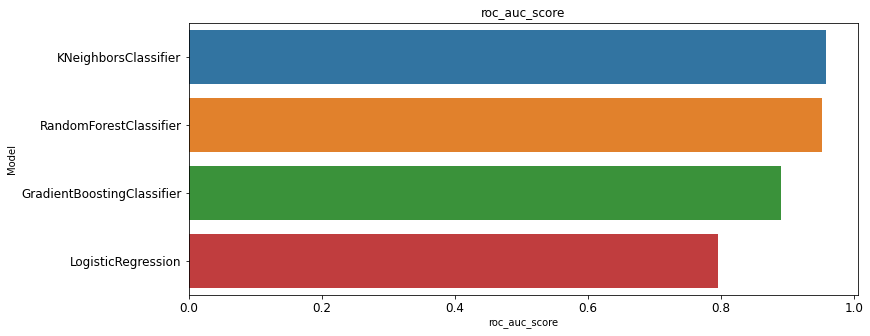

In [218]:
results_plot("roc_auc_score", model_ml_results_df)

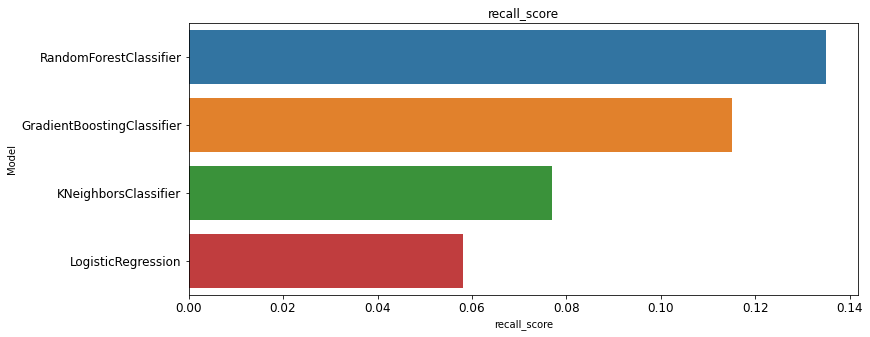

In [190]:
results_plot('recall_score', model_ml_results_df)

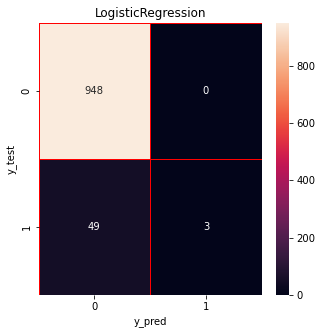

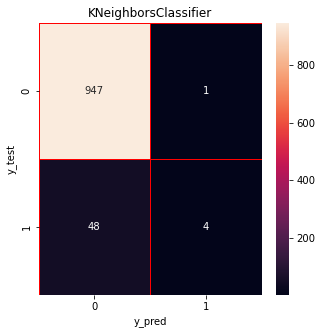

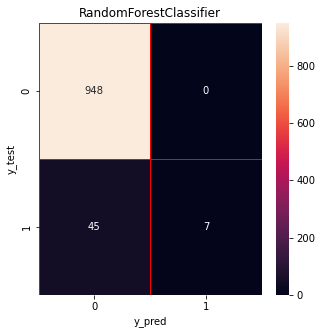

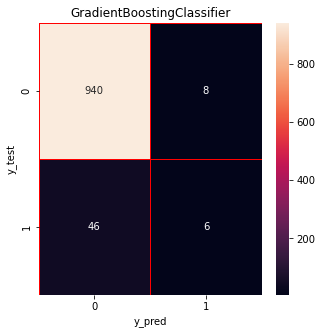

In [191]:
# Show confusion matrix for each model

for model, cm in zip(models_ml_list, cm_ml_list):
    plot_cm(model, cm)

## Model Training using Deep Learning (ANN)

In [137]:
# Function plots the training and validation loss and accuracy for each epoch of training and saves the plot as an image file
def show_final_history(epochs_history, model_name):
    fig, ax = plt.subplots(1, 2, figsize = (18, 5))
    
    ax[0].set_title('Loss')
    ax[0].plot(epochs_history.epoch, epochs_history.history['loss'], label = 'Train loss')
    ax[0].plot(epochs_history.epoch, epochs_history.history['val_loss'], label = 'Validation loss')

    ax[1].set_title('Accuracy')
    ax[1].plot(epochs_history.epoch, epochs_history.history['accuracy'], label = 'Train accuracy')
    ax[1].plot(epochs_history.epoch, epochs_history.history['val_accuracy'], label = 'Validation accuracy')
    ax[0].legend()
    ax[1].legend()
    plt.savefig('epochs_plot_histories/{}_plot_history.png'.format(model_name))

In [134]:
# Function to get model evaluation results and store it to list

def evaluate_model(model, model_name, X_test, y_test):
    pred = model.predict(X_test, verbose = 0)
    pred = np.where(pred < 0.5, 0, 1)
    
    models_ann_list.append(model_name)
    
    model.save('keras_models/{}.h5'.format(model_name))
    
    roc_auc_score_ann_list.append(round(roc_auc_score(y_test, pred), 3))
    accuracy_score_ann_list.append(round(accuracy_score(y_test, pred), 3))
    precision_score_ann_list.append(round(precision_score(y_test, pred), 3))
    recall_score_ann_list.append(round(recall_score(y_test, pred), 3))
    f1_score_ann_list.append(round(f1_score(y_test, pred), 3))
    cm_ann_list.append(confusion_matrix(y_test, pred))

In [202]:
models_ann_list = []

roc_auc_score_ann_list = []

accuracy_score_ann_list = []

precision_score_ann_list = []

recall_score_ann_list = []

f1_score_ann_list = []

cm_ann_list = []

### Hyperband

In [207]:
# Model builder functions for keras tuner

def build_model_adam(hp):
    input_vec = 960
    hp_units_1 = hp.Int("units_1", min_value = 100, max_value = 300, step = 20)
    hp_units_2 = hp.Int("units_2", min_value = 20, max_value = 60, step = 10)
    opt = "adam"
    
    model = Sequential()
    model.add(
        Dense(
            units = hp_units_1,
            activation = "relu",
            input_shape = (input_vec, )
        )
    )
    if hp.Boolean("dropout1"):
        model.add(Dropout(rate = 0.2))
        
    model.add(Dense(
        units = hp_units_2,
        activation = "relu"))
    
    if hp.Boolean("dropout2"):
        model.add(Dropout(rate = 0.1))
    
    model.add(Dense(1))
    model.compile(
        optimizer = opt,
        loss = "mean_squared_error",
        metrics = ["accuracy"],
    )
    return model

def build_model_sgd(hp):
    input_vec = 960
    hp_units_1 = hp.Int("units_1", min_value = 100, max_value = 300, step = 20)
    hp_units_2 = hp.Int("units_2", min_value = 20, max_value = 60, step = 10)
    opt = "sgd"
    
    model = Sequential()
    model.add(
        Dense(
            units = hp_units_1,
            activation = "relu",
            input_shape = (input_vec, )
        )
    )
    if hp.Boolean("dropout1"):
        model.add(Dropout(rate = 0.2))
        
    model.add(Dense(
        units = hp_units_2,
        activation = "relu"))
    
    if hp.Boolean("dropout2"):
        model.add(Dropout(rate = 0.1))
    
    model.add(Dense(1))
    model.compile(
        optimizer = opt,
        loss = "mean_squared_error",
        metrics = ["accuracy"],
    )
    return model

def build_model_rmsprop(hp):
    input_vec = 960
    hp_units_1 = hp.Int("units_1", min_value = 100, max_value = 300, step = 20)
    hp_units_2 = hp.Int("units_2", min_value = 20, max_value = 60, step = 10)
    opt = "rmsprop"
    
    model = Sequential()
    model.add(
        Dense(
            units = hp_units_1,
            activation = "relu",
            input_shape = (input_vec, )
        )
    )
    if hp.Boolean("dropout1"):
        model.add(Dropout(rate = 0.2))
        
    model.add(Dense(
        units = hp_units_2,
        activation = "relu"))
    
    if hp.Boolean("dropout2"):
        model.add(Dropout(rate = 0.1))
    
    model.add(Dense(1))
    model.compile(
        optimizer = opt,
        loss = "mean_squared_error",
        metrics = ["accuracy"],
    )
    return model

def build_model_adadelta(hp):
    input_vec = 960
    hp_units_1 = hp.Int("units_1", min_value = 100, max_value = 300, step = 20)
    hp_units_2 = hp.Int("units_2", min_value = 20, max_value = 60, step = 10)
    opt = "adadelta"
    
    model = Sequential()
    model.add(
        Dense(
            units = hp_units_1,
            activation = "relu",
            input_shape = (input_vec, )
        )
    )
    if hp.Boolean("dropout1"):
        model.add(Dropout(rate = 0.2))
        
    model.add(Dense(
        units = hp_units_2,
        activation = "relu"))
    
    if hp.Boolean("dropout2"):
        model.add(Dropout(rate = 0.1))
    
    model.add(Dense(1))
    model.compile(
        optimizer = opt,
        loss = "mean_squared_error",
        metrics = ["accuracy"],
    )
    return model

In [208]:
# Create list with model builders

model_builders_list = [ build_model_adam, build_model_sgd, build_model_rmsprop, build_model_adadelta]

Trial 90 Complete [00h 00m 13s]
val_loss: 0.05583332106471062

Best val_loss So Far: 0.04960395395755768
Total elapsed time: 00h 05m 50s
INFO:tensorflow:Oracle triggered exit


32min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


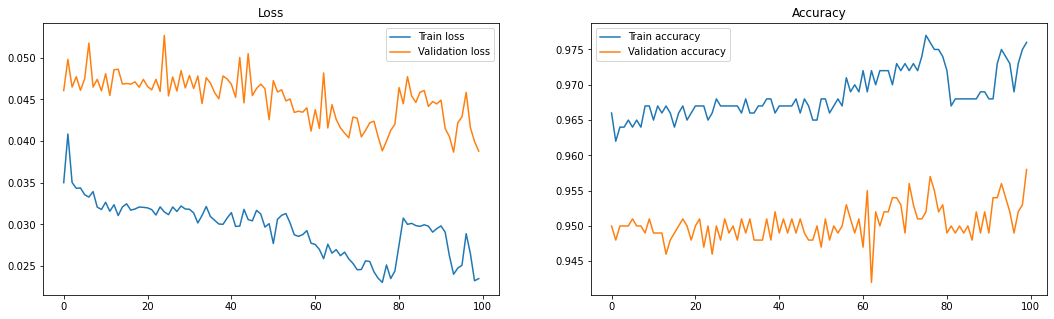

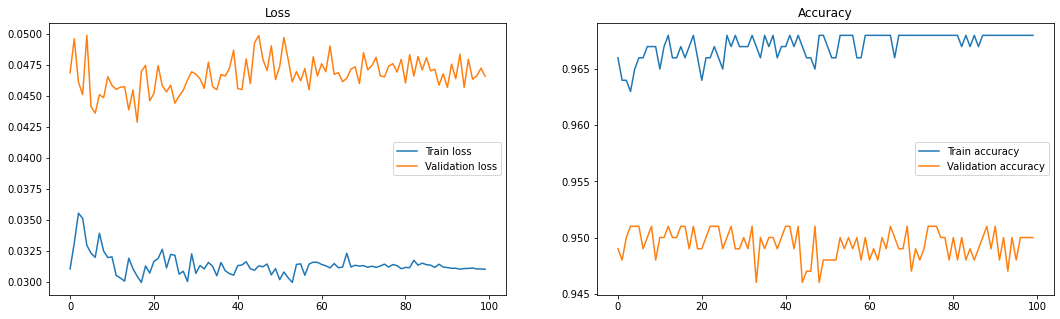

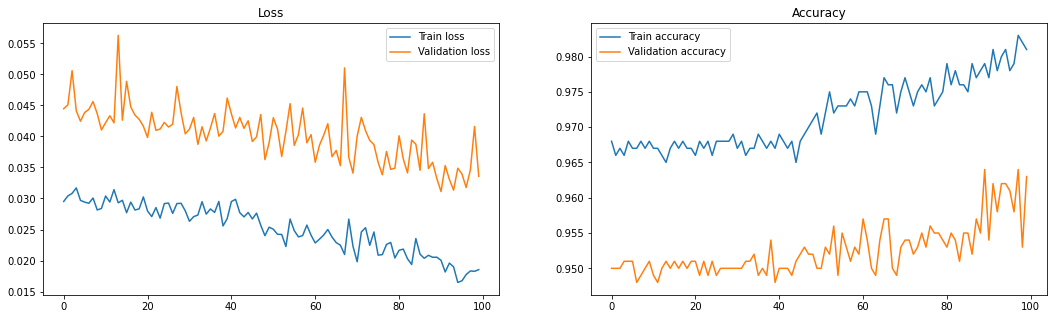

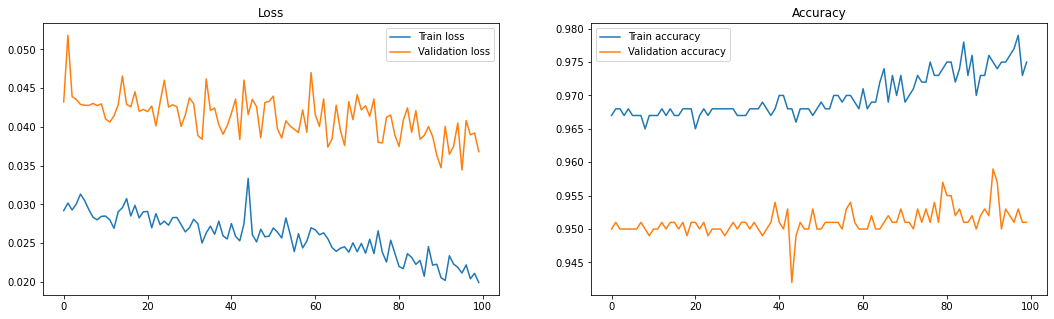

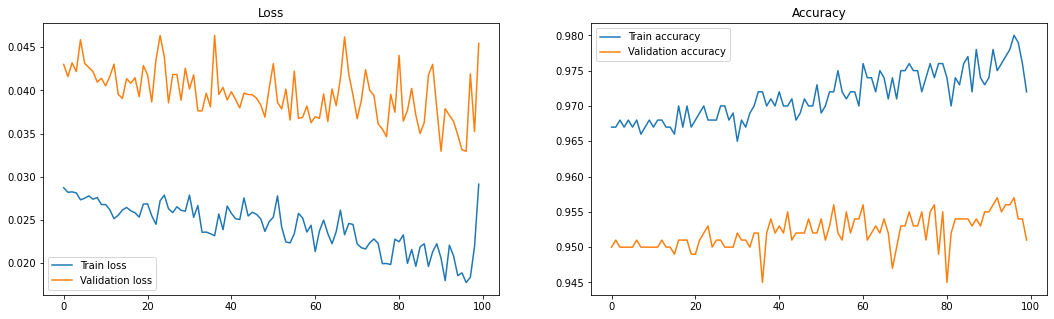

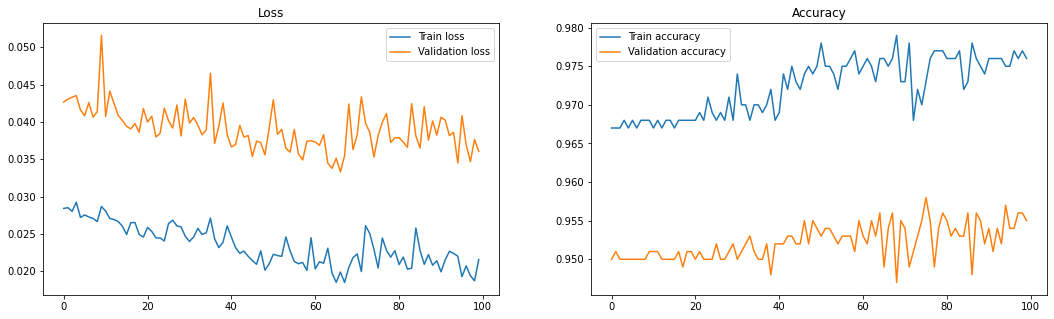

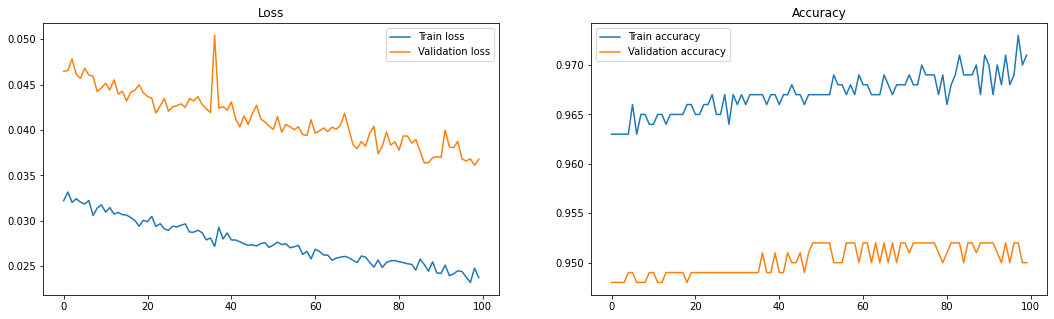

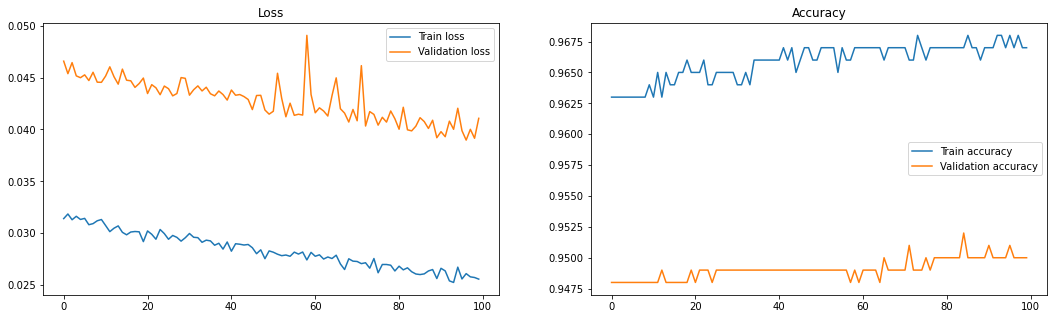

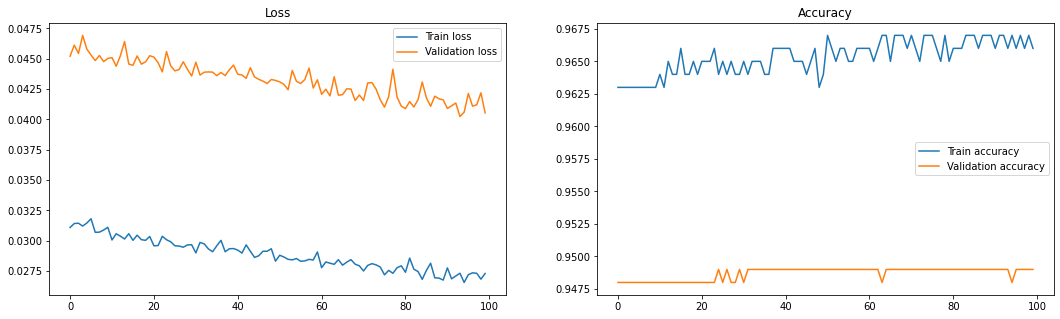

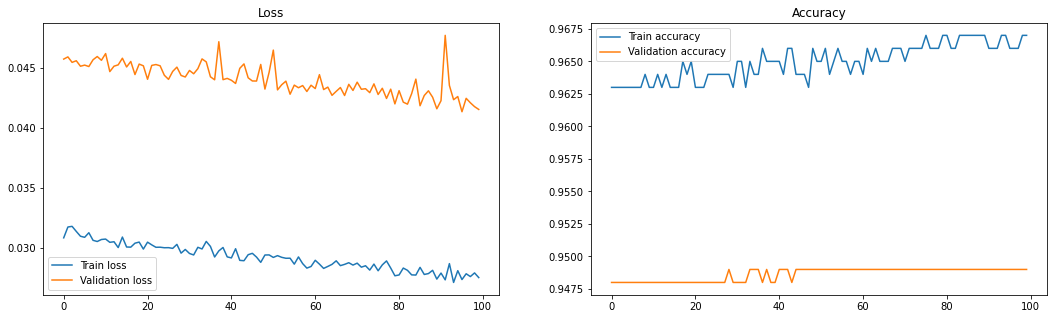

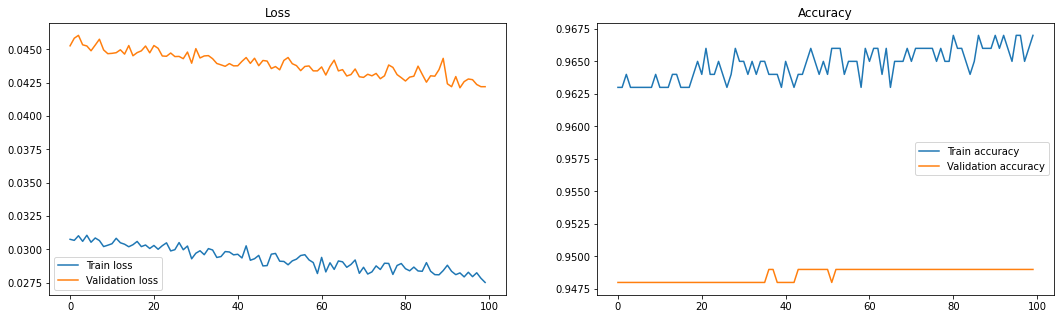

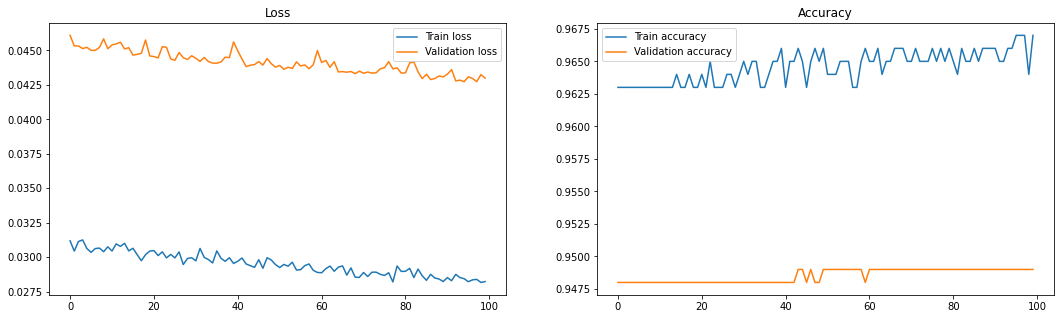

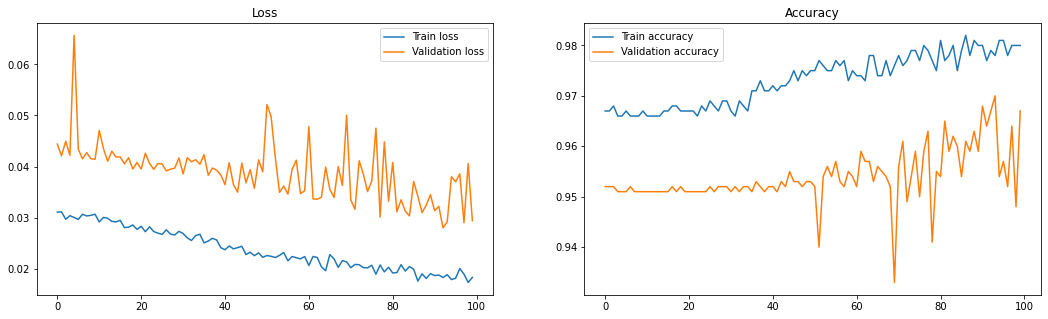

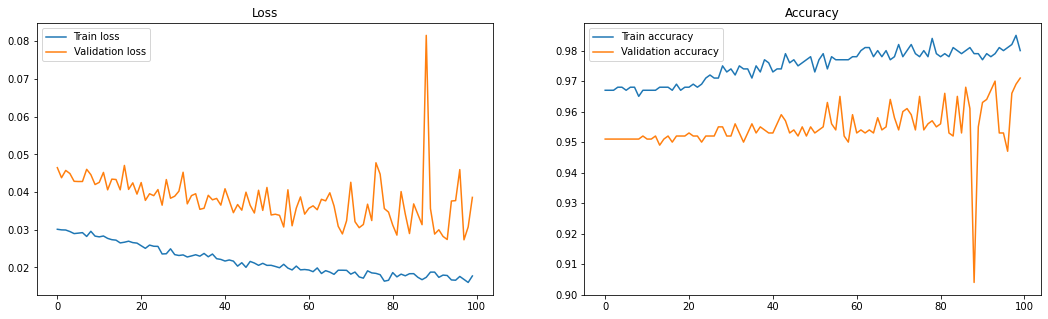

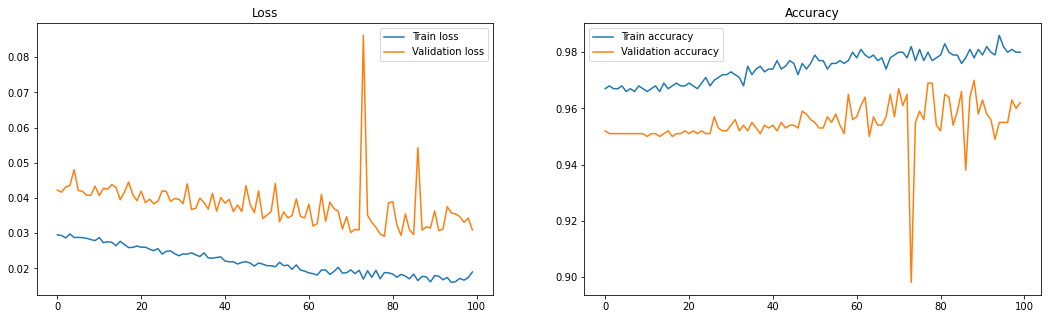

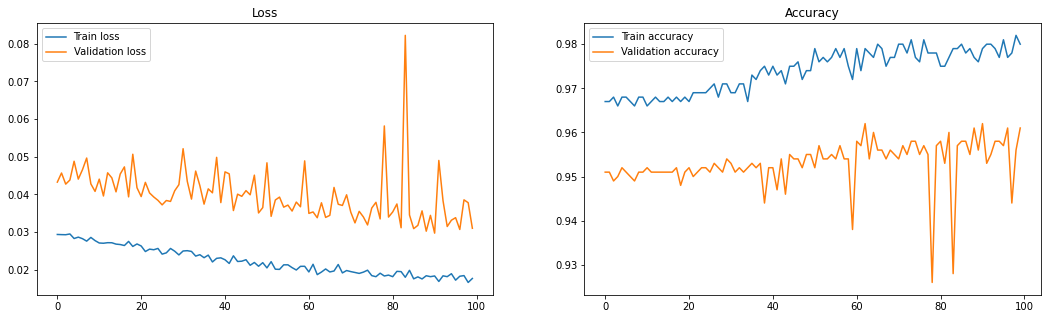

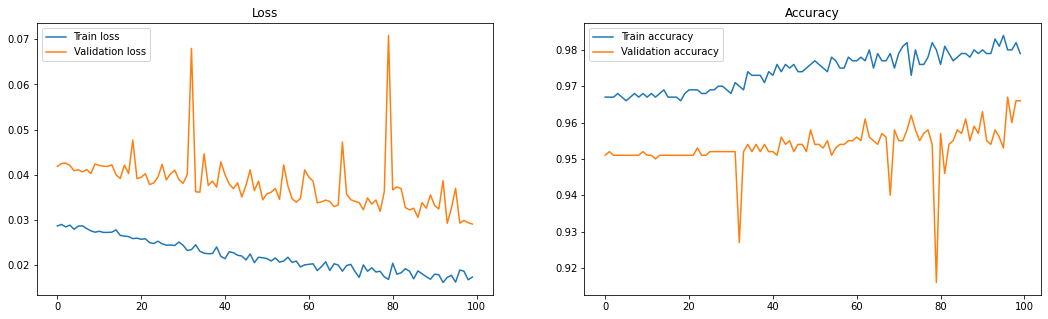

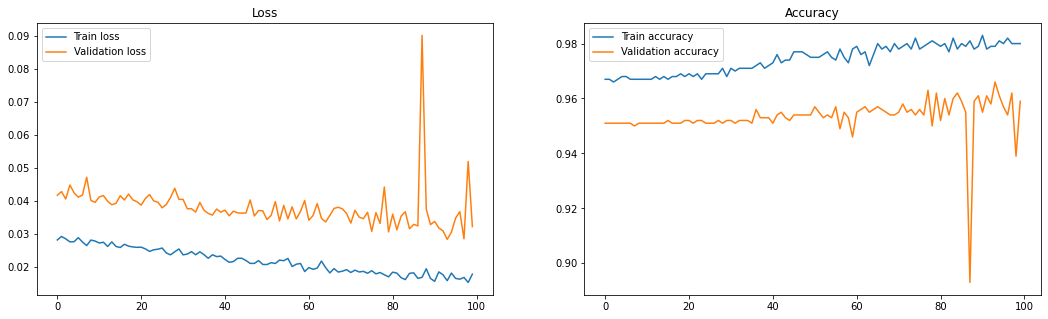

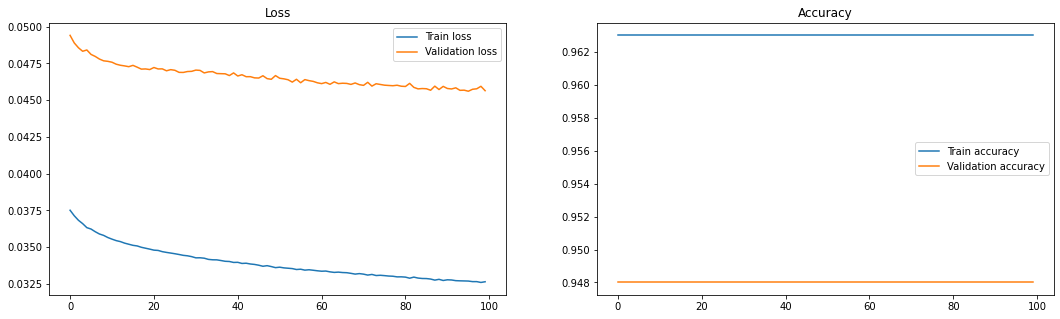

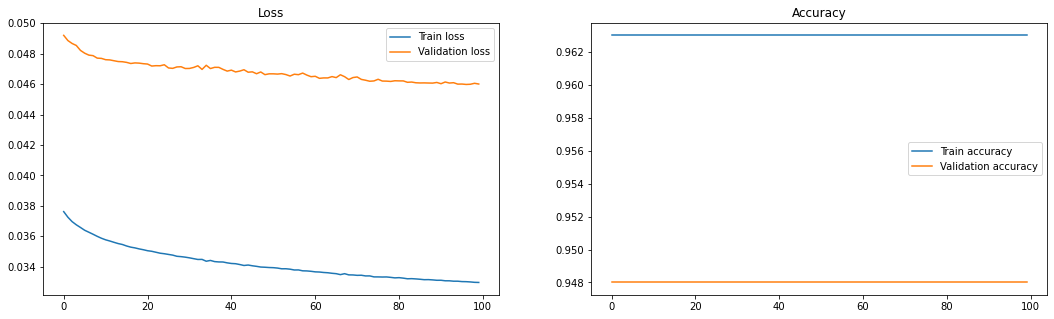

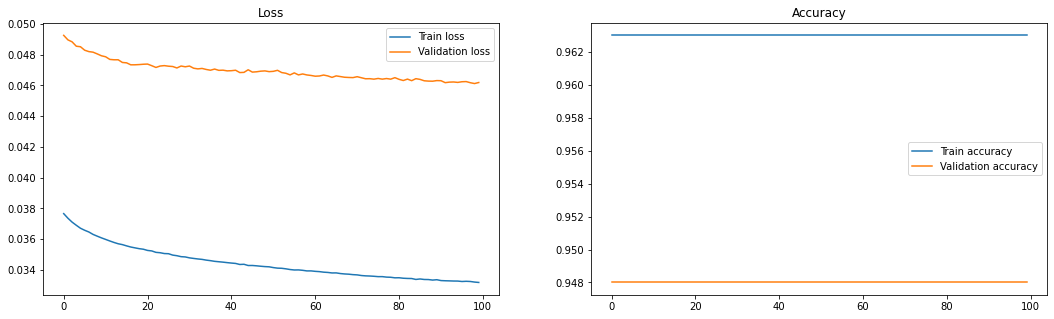

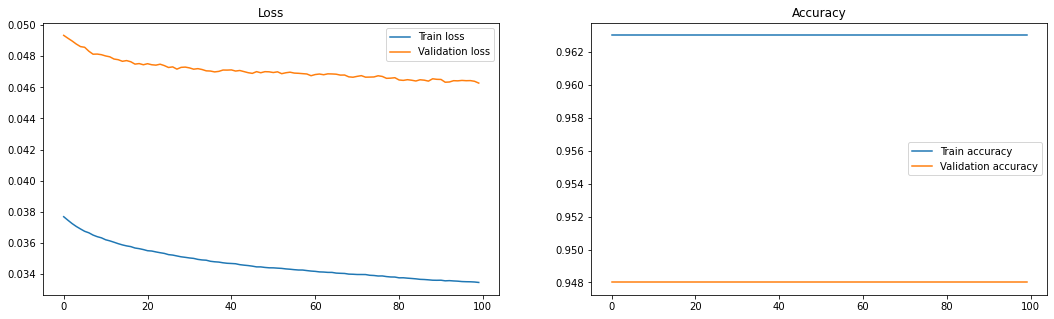

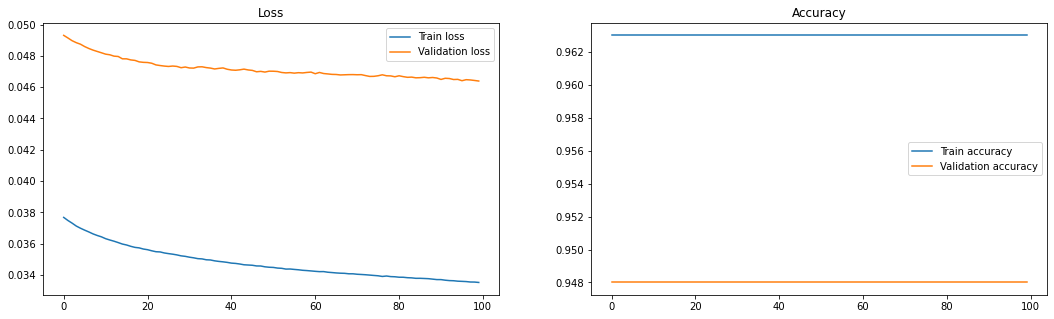

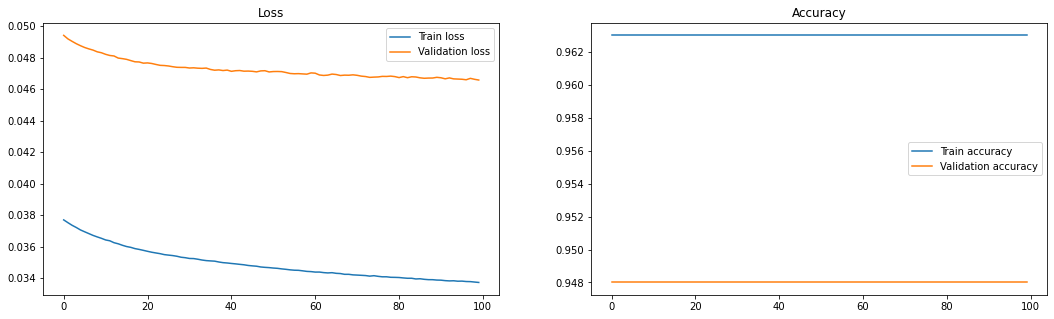

In [209]:
%%timeit -r 1 -n 1

for model_builder in model_builders_list:
    tuner = Hyperband(
        hypermodel = model_builder,
        objective = 'val_loss',
        max_epochs = 50,
        directory = 'hyperband_{}'.format(model_builders_list.index(model_builder)),
        project_name = 'water_pump_failure_prediction'
    )
    
    tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))
    
    batch_size = range(8, 49, 8)

    for i in batch_size:
        best_model = tuner.get_best_models(num_models = 3)[0]

        best_model.build(input_shape = (training_pairs[0][0].shape[0], ))
        
        epochs_history = best_model.fit(
            X_train,
            y_train,
            validation_data = (X_test, y_test),
            batch_size = i,
            epochs = 100,
            verbose = 0
        )

        show_final_history(epochs_history, "model_hyperband_{0}_batch_size_{1}".format(model_builders_list.index(model_builder), i))

        evaluate_model(best_model, "model_hyperband_{0}_batch_size_{1}".format(model_builders_list.index(model_builder), i), X_test, y_test)
    

In [210]:
model_results_df_ann = pd.DataFrame({
    'Model': models_ann_list,
    'roc_auc_score': roc_auc_score_ann_list, 
    'accuracy_score': accuracy_score_ann_list, 
    'precision_score': precision_score_ann_list,
    'recall_score': recall_score_ann_list,
    'f1_score': f1_score_ann_list
})

model_results_df_ann

Model  roc_auc_score  accuracy_score  \
0    model_hyperband_0_batch_size_8          0.596           0.958   
1   model_hyperband_0_batch_size_16          0.528           0.950   
2   model_hyperband_0_batch_size_24          0.717           0.963   
3   model_hyperband_0_batch_size_32          0.538           0.951   
4   model_hyperband_0_batch_size_40          0.556           0.951   
5   model_hyperband_0_batch_size_48          0.576           0.955   
6    model_hyperband_1_batch_size_8          0.537           0.950   
7   model_hyperband_1_batch_size_16          0.519           0.950   
8   model_hyperband_1_batch_size_24          0.510           0.949   
9   model_hyperband_1_batch_size_32          0.510           0.949   
10  model_hyperband_1_batch_size_40          0.510           0.949   
11  model_hyperband_1_batch_size_48          0.510           0.949   
12   model_hyperband_2_batch_size_8          0.710           0.967   
13  model_hyperband_2_batch_size_16          0.812           0.971   
14  model_hyperband_2_batch_size_24          0.698           0.962   
15  model_hyperband_2_batch_size_32          0.625           0.961   
16  model_hyperband_2_batch_size_40          0.673           0.966   
17  model_hyperband_2_batch_size_48          0.606           0.959   
18   model_hyperband_3_batch_size_8          0.500           0.948   
19  model_hyperband_3_batch_size_16          0.500           0.948   
20  model_hyperband_3_batch_size_24          0.500           0.948   
21  model_hyperband_3_batch_size_32          0.500           0.948   
22  model_hyperband_3_batch_size_40          0.500           0.948   
23  model_hyperband_3_batch_size_48          0.500           0.948   

    precision_score  recall_score  f1_score  
0             1.000         0.192     0.323  
1             0.750         0.058     0.107  
2             0.742         0.442     0.554  
3             0.800         0.077     0.140  
4             0.667         0.115     0.197  
5             0.889         0.154     0.262  
6             0.667         0.077     0.138  
7             1.000         0.038     0.074  
8             1.000         0.019     0.038  
9             1.000         0.019     0.038  
10            1.000         0.019     0.038  
11            1.000         0.019     0.038  
12            0.880         0.423     0.571  
13            0.767         0.635     0.695  
14            0.750         0.404     0.525  
15            1.000         0.250     0.400  
16            1.000         0.346     0.514  
17            1.000         0.212     0.349  
18            0.000         0.000     0.000  
19            0.000         0.000     0.000  
20            0.000         0.000     0.000  
21            0.000         0.000     0.000  
22            0.000         0.000     0.000  
23            0.000         0.000     0.000

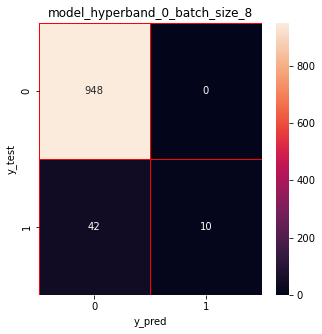

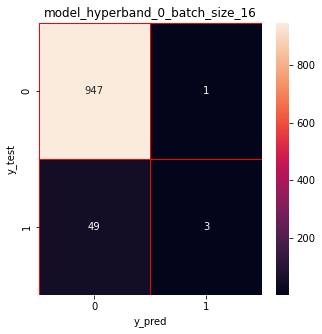

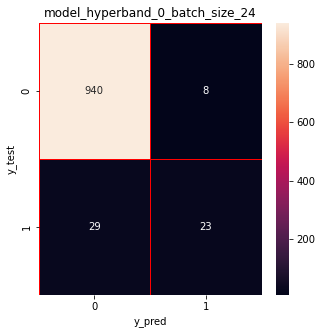

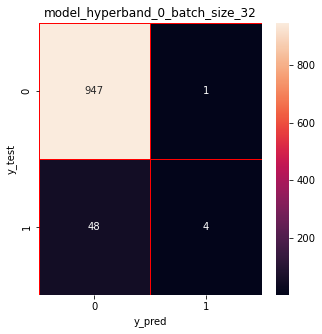

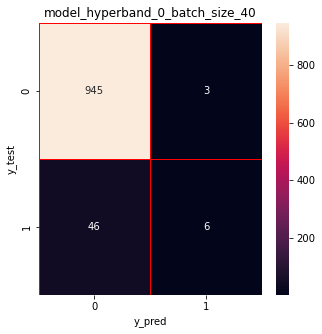

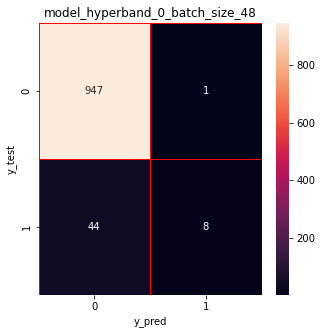

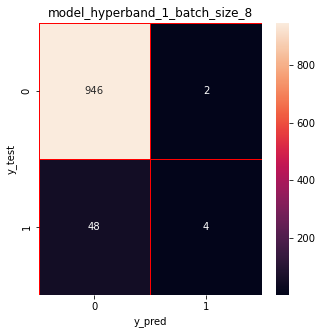

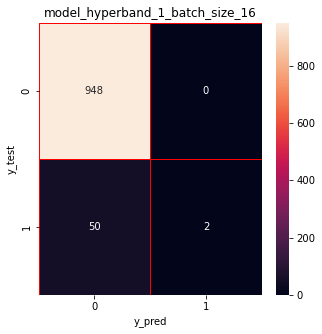

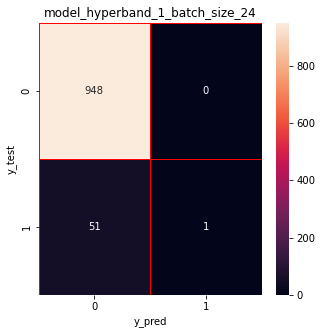

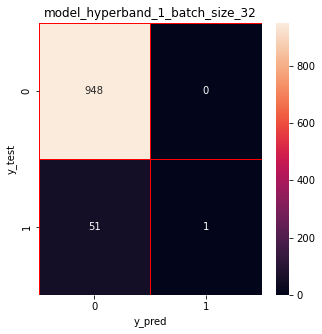

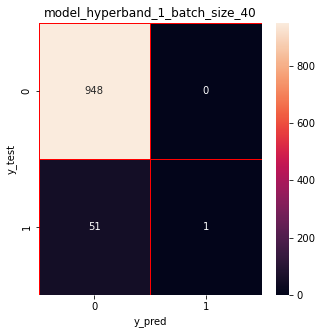

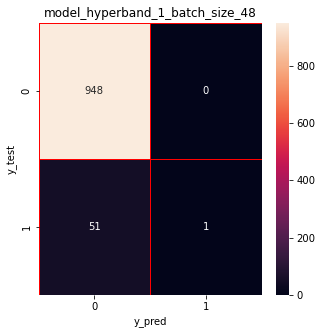

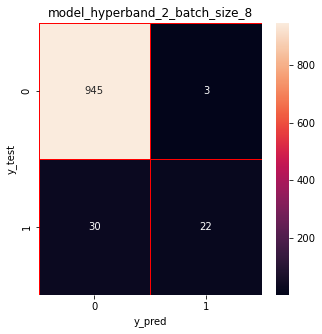

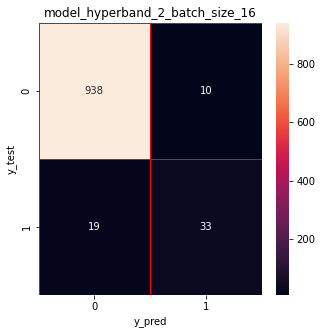

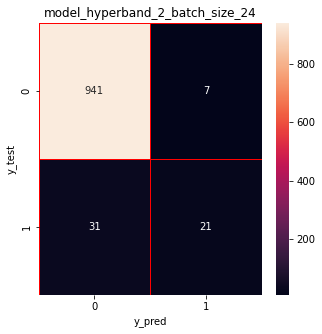

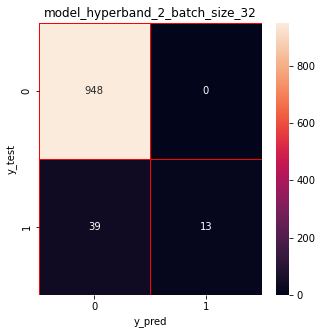

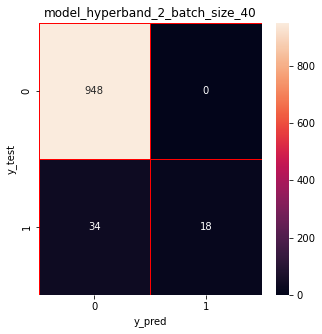

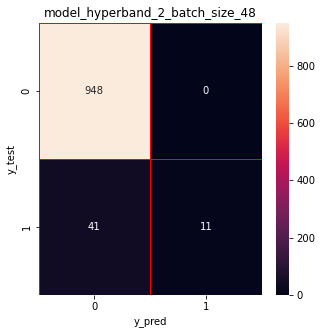

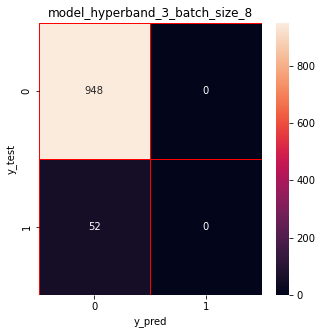

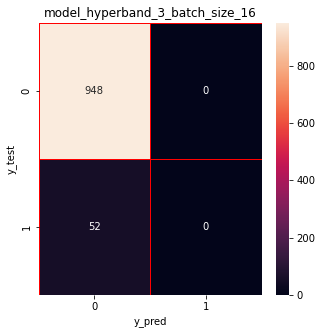

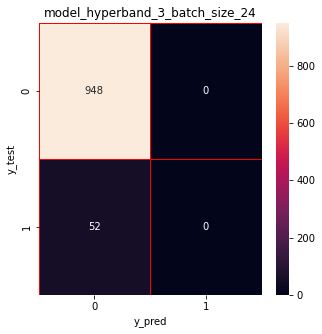

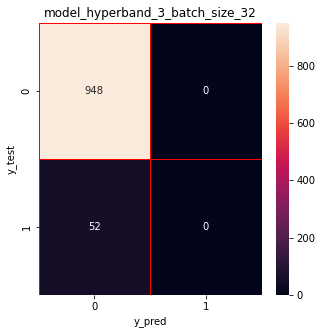

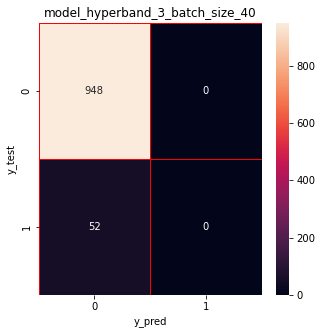

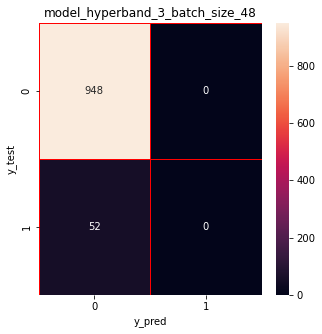

In [211]:
for model, cm in zip(models_ann_list, cm_ann_list):
    plot_cm(model, cm)

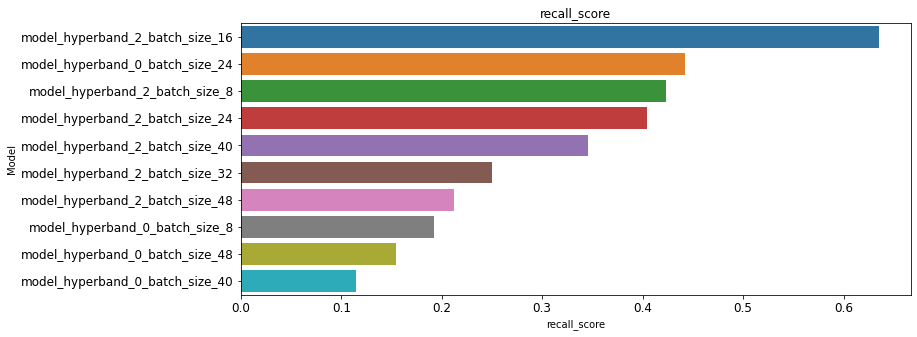

In [212]:
results_plot("recall_score", model_results_df_ann)

### Random Search

Trial 10 Complete [00h 00m 26s]
val_loss: 0.04688766598701477

Best val_loss So Far: 0.04688766598701477
Total elapsed time: 00h 04m 05s
INFO:tensorflow:Oracle triggered exit


26min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


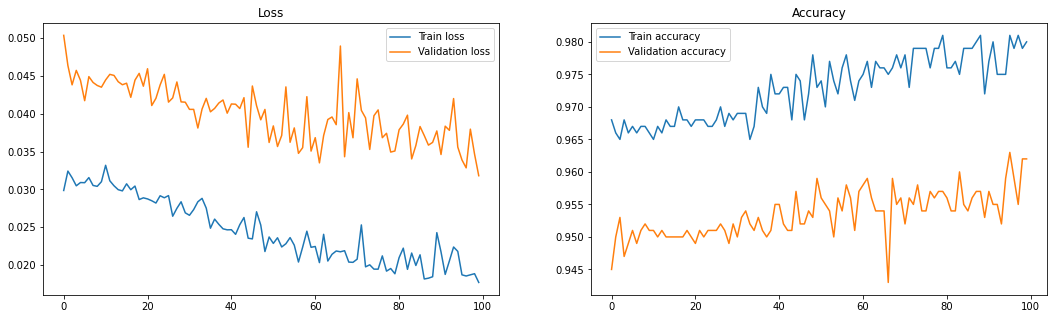

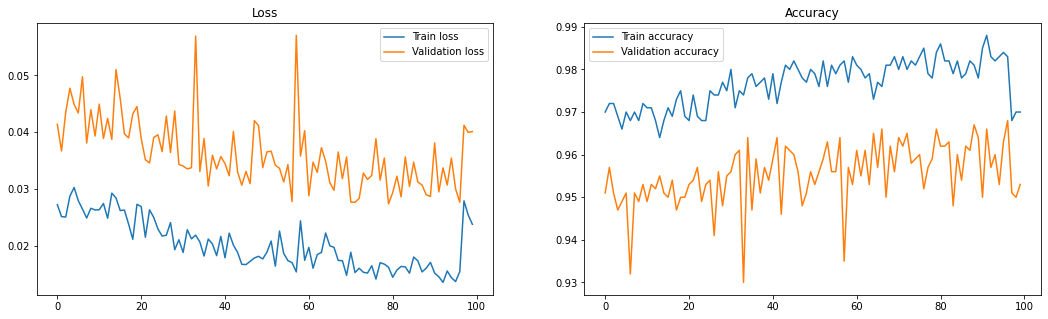

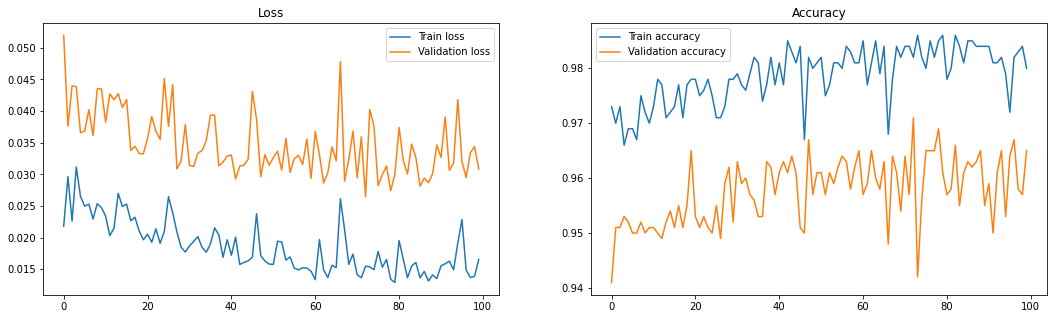

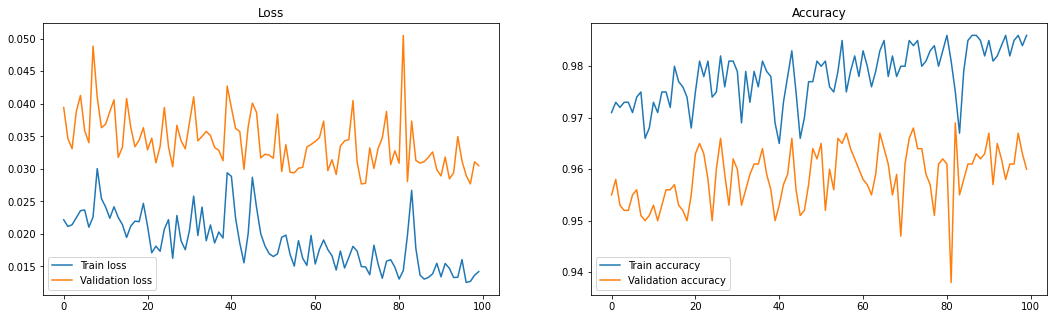

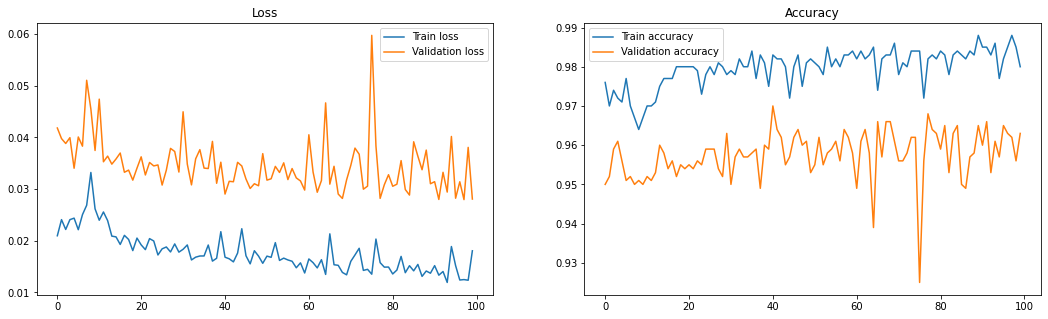

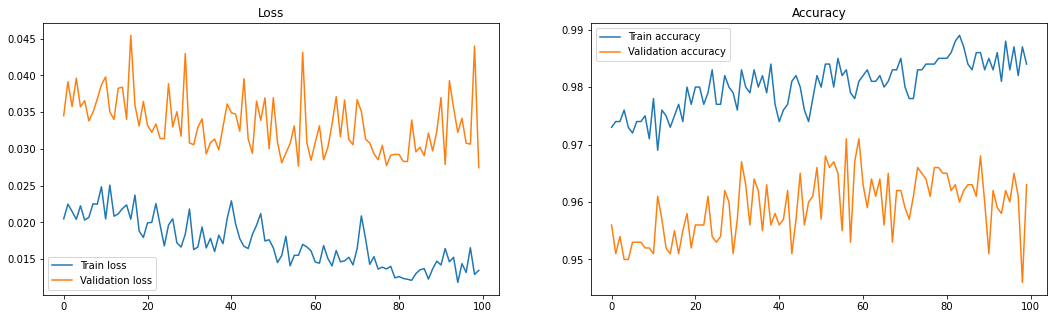

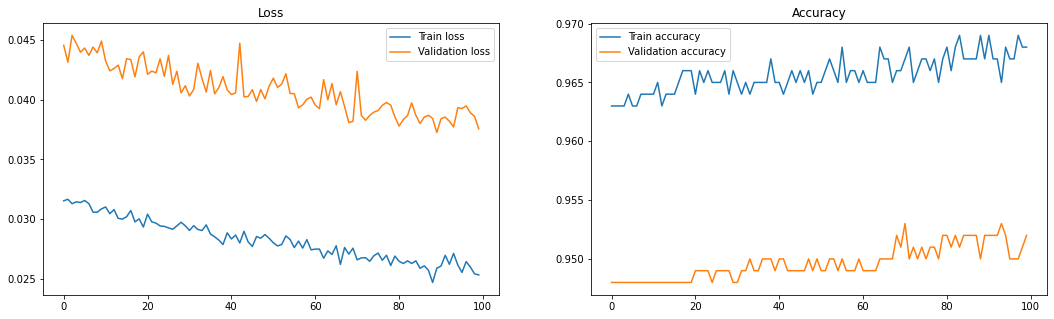

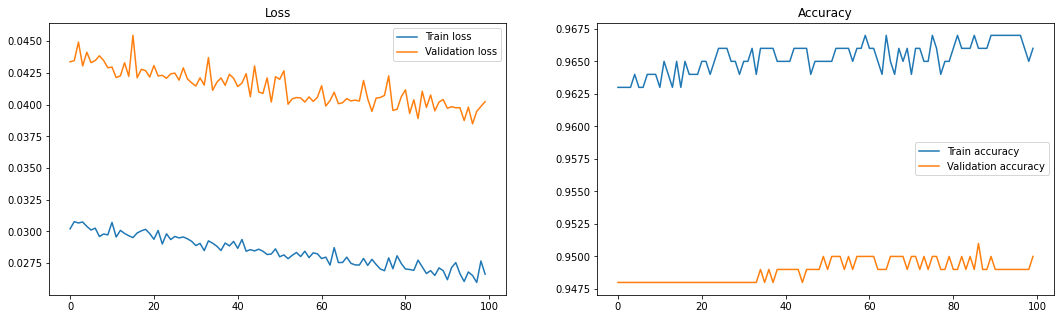

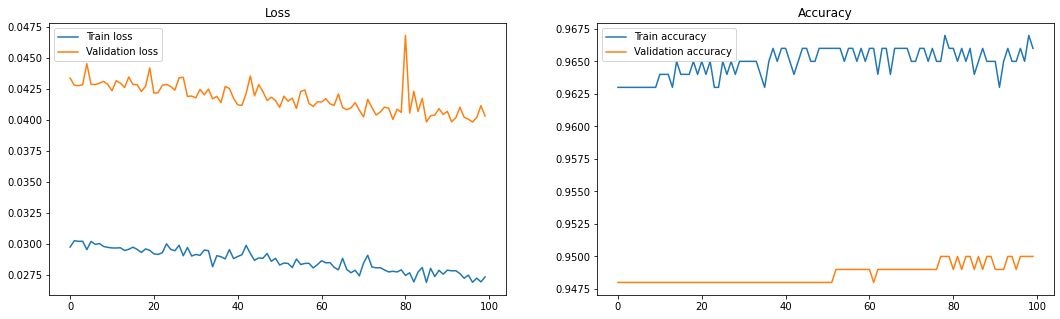

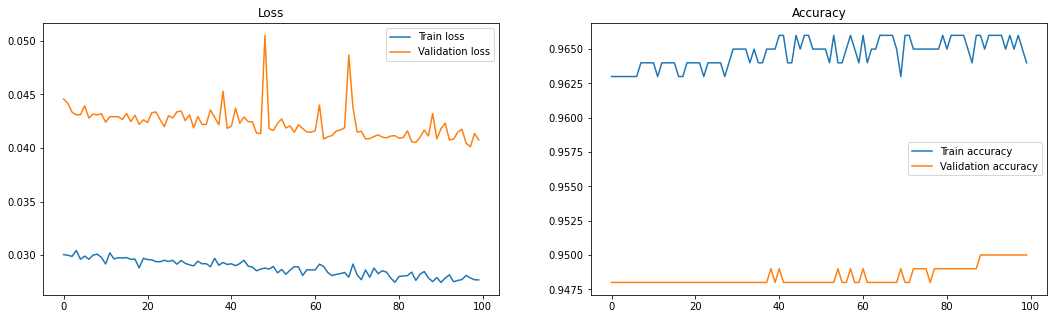

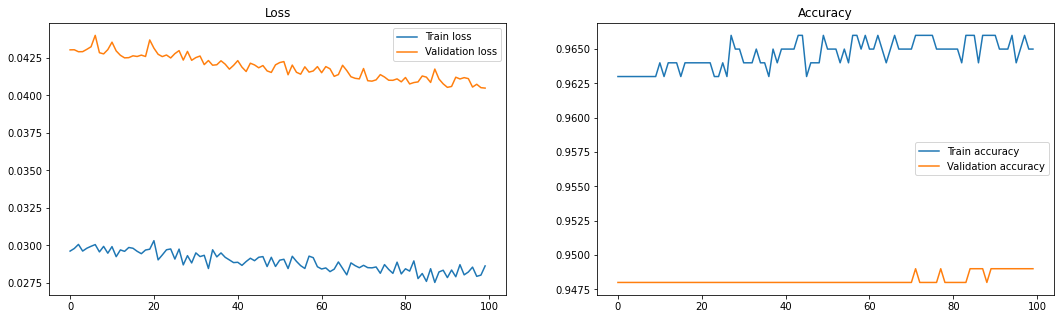

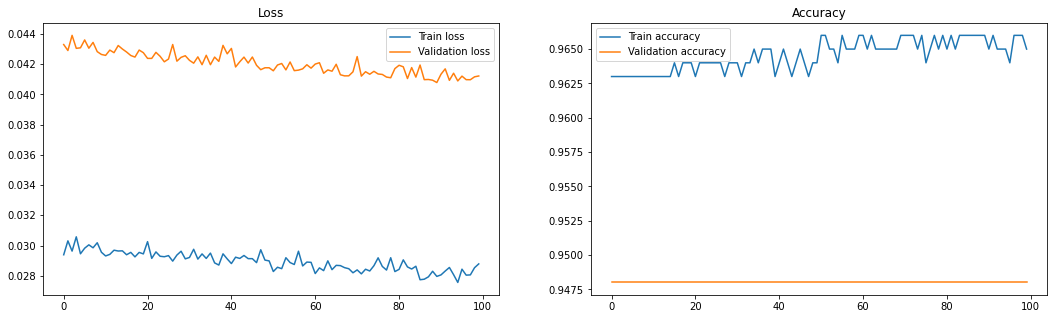

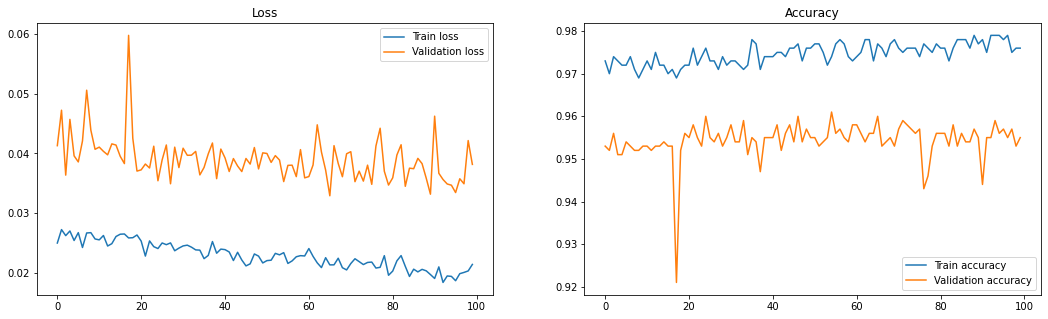

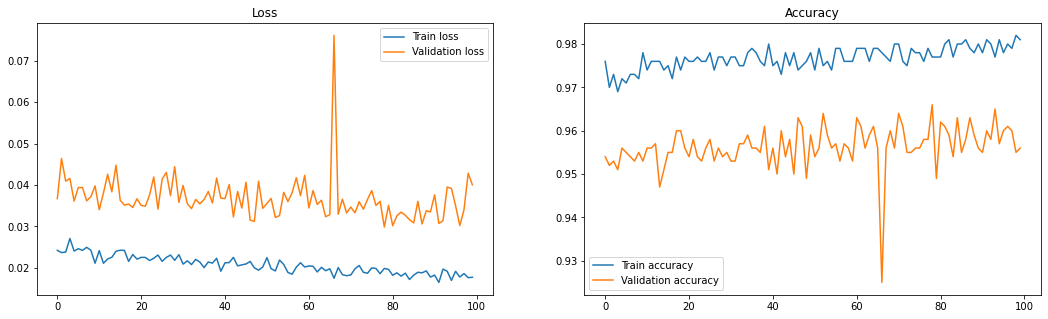

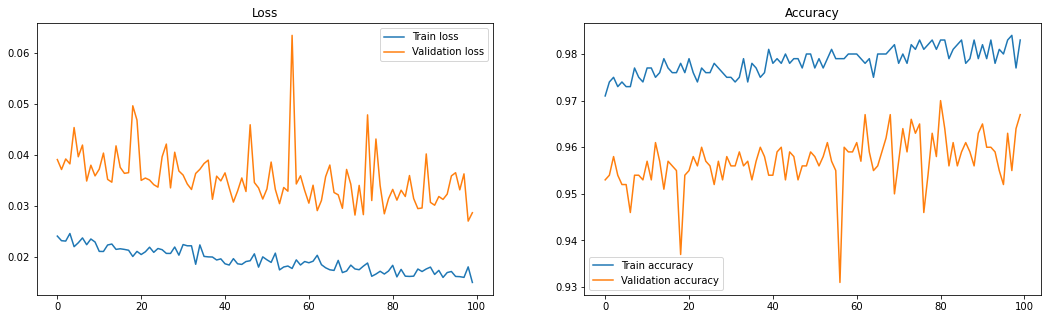

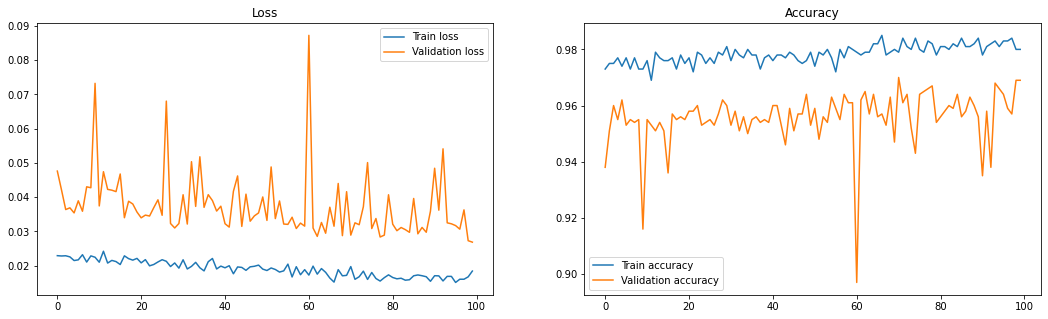

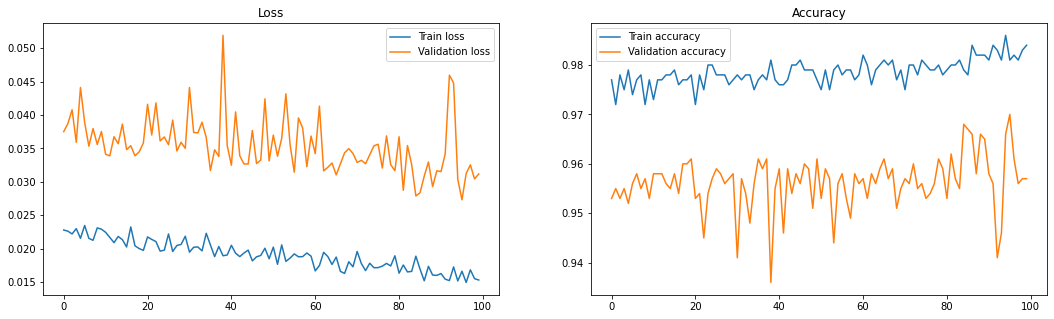

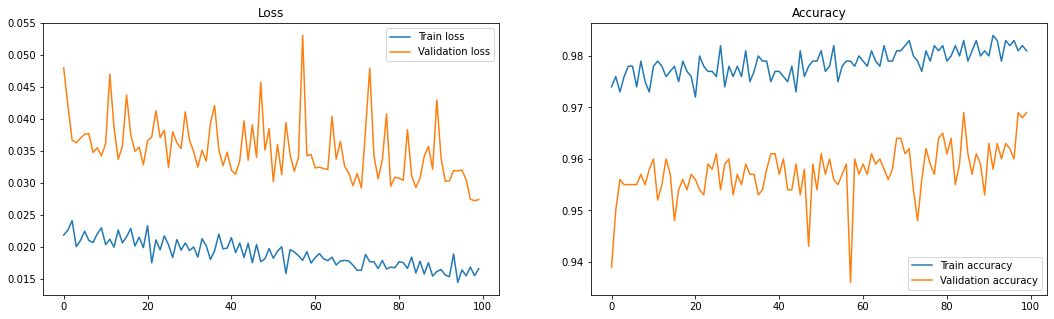

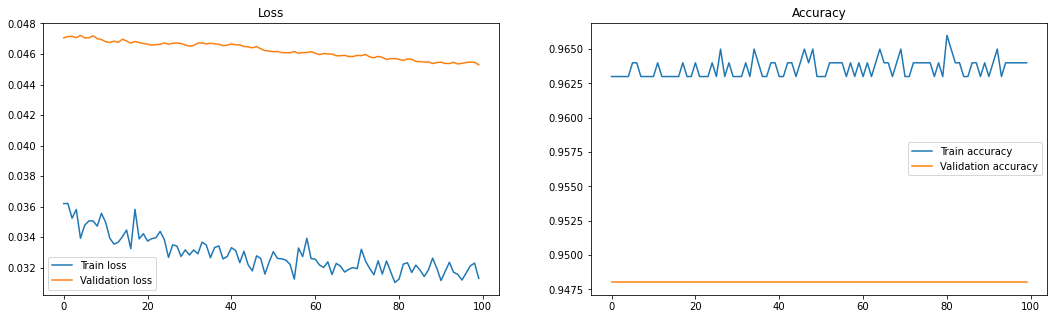

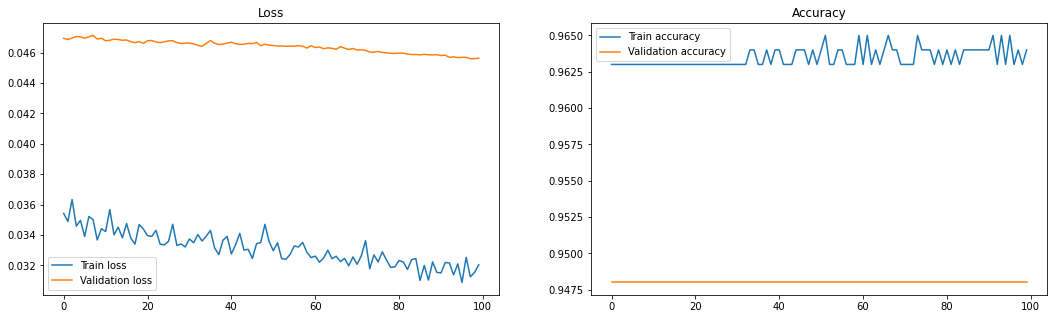

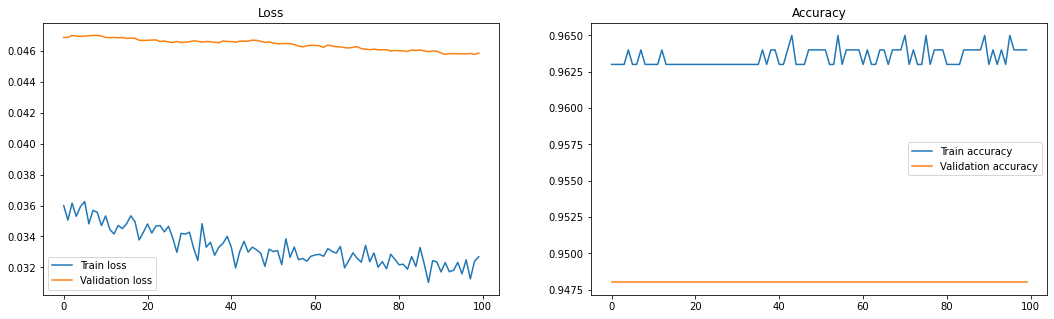

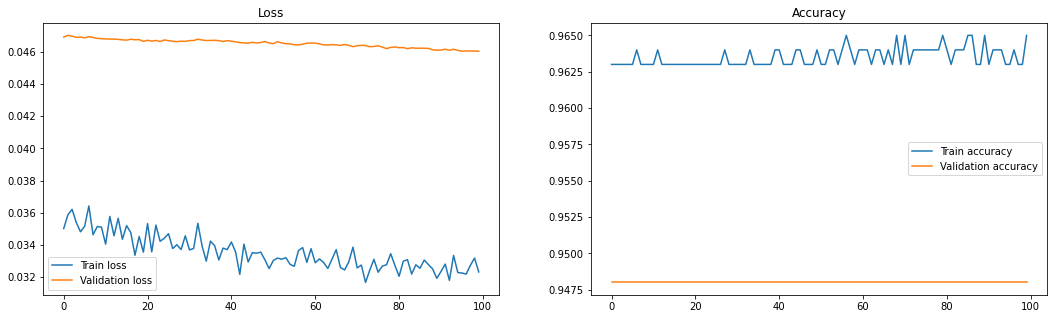

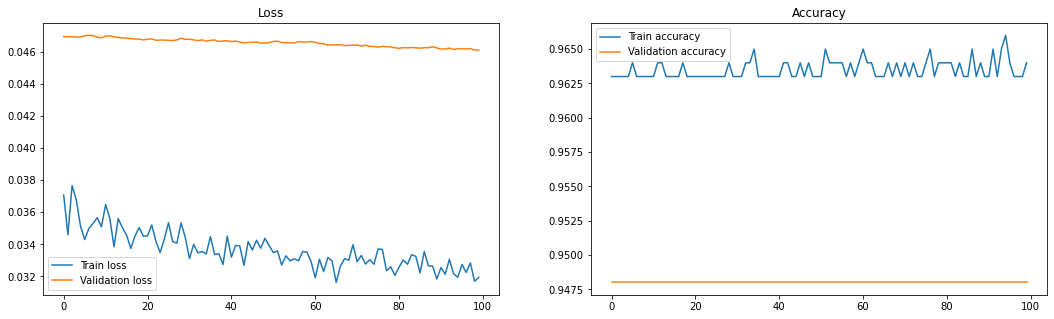

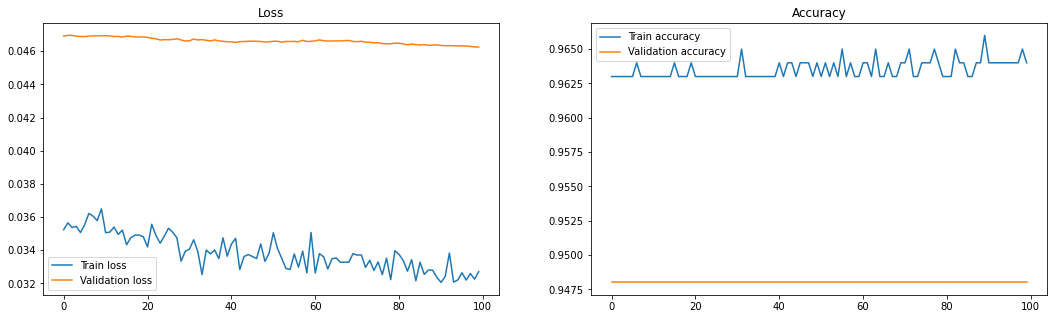

In [213]:
%%timeit -r 1 -n 1

for model_builder in model_builders_list:
    tuner = RandomSearch(
        hypermodel = model_builder,
        objective = "val_loss",
        directory = "random_search_{}".format(model_builders_list.index(model_builder)),
        project_name = "water_pump_failure_prediction"
    )

    tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))
    
    batch_size = range(8, 49, 8)

    for i in batch_size:
        best_model = tuner.get_best_models(num_models = 3)[0]

        best_model.build(input_shape = (training_pairs[0][0].shape[0], ))
        
        epochs_history = best_model.fit(
            X_train,
            y_train,
            validation_data = (X_test, y_test),
            batch_size = i,
            epochs = 100,
            verbose = 0
        )

        show_final_history(epochs_history, "model_random_search_{0}_batch_size_{1}".format(model_builders_list.index(model_builder), i))

        evaluate_model(best_model, "model_random_search_{0}_batch_size_{1}".format(model_builders_list.index(model_builder), i), X_test, y_test)
    

In [214]:
model_results_df_ann = pd.DataFrame({
    'Model': models_ann_list,
    'roc_auc_score': roc_auc_score_ann_list, 
    'accuracy_score': accuracy_score_ann_list, 
    'precision_score': precision_score_ann_list,
    'recall_score': recall_score_ann_list,
    'f1_score': f1_score_ann_list
})

model_results_df_ann

Model  roc_auc_score  accuracy_score  \
0        model_hyperband_0_batch_size_8          0.596           0.958   
1       model_hyperband_0_batch_size_16          0.528           0.950   
2       model_hyperband_0_batch_size_24          0.717           0.963   
3       model_hyperband_0_batch_size_32          0.538           0.951   
4       model_hyperband_0_batch_size_40          0.556           0.951   
5       model_hyperband_0_batch_size_48          0.576           0.955   
6        model_hyperband_1_batch_size_8          0.537           0.950   
7       model_hyperband_1_batch_size_16          0.519           0.950   
8       model_hyperband_1_batch_size_24          0.510           0.949   
9       model_hyperband_1_batch_size_32          0.510           0.949   
10      model_hyperband_1_batch_size_40          0.510           0.949   
11      model_hyperband_1_batch_size_48          0.510           0.949   
12       model_hyperband_2_batch_size_8          0.710           0.967   
13      model_hyperband_2_batch_size_16          0.812           0.971   
14      model_hyperband_2_batch_size_24          0.698           0.962   
15      model_hyperband_2_batch_size_32          0.625           0.961   
16      model_hyperband_2_batch_size_40          0.673           0.966   
17      model_hyperband_2_batch_size_48          0.606           0.959   
18       model_hyperband_3_batch_size_8          0.500           0.948   
19      model_hyperband_3_batch_size_16          0.500           0.948   
20      model_hyperband_3_batch_size_24          0.500           0.948   
21      model_hyperband_3_batch_size_32          0.500           0.948   
22      model_hyperband_3_batch_size_40          0.500           0.948   
23      model_hyperband_3_batch_size_48          0.500           0.948   
24   model_random_search_0_batch_size_8          0.662           0.962   
25  model_random_search_0_batch_size_16          0.566           0.953   
26  model_random_search_0_batch_size_24          0.718           0.965   
27  model_random_search_0_batch_size_32          0.652           0.960   
28  model_random_search_0_batch_size_40          0.717           0.963   
29  model_random_search_0_batch_size_48          0.708           0.963   
30   model_random_search_1_batch_size_8          0.548           0.952   
31  model_random_search_1_batch_size_16          0.519           0.950   
32  model_random_search_1_batch_size_24          0.519           0.950   
33  model_random_search_1_batch_size_32          0.519           0.950   
34  model_random_search_1_batch_size_40          0.510           0.949   
35  model_random_search_1_batch_size_48          0.500           0.948   
36   model_random_search_2_batch_size_8          0.576           0.955   
37  model_random_search_2_batch_size_16          0.577           0.956   
38  model_random_search_2_batch_size_24          0.710           0.967   
39  model_random_search_2_batch_size_32          0.702           0.969   
40  model_random_search_2_batch_size_40          0.596           0.957   
41  model_random_search_2_batch_size_48          0.729           0.969   
42   model_random_search_3_batch_size_8          0.500           0.948   
43  model_random_search_3_batch_size_16          0.500           0.948   
44  model_random_search_3_batch_size_24          0.500           0.948   
45  model_random_search_3_batch_size_32          0.500           0.948   
46  model_random_search_3_batch_size_40          0.500           0.948   
47  model_random_search_3_batch_size_48          0.500           0.948   

    precision_score  recall_score  f1_score  
0             1.000         0.192     0.323  
1             0.750         0.058     0.107  
2             0.742         0.442     0.554  
3             0.800         0.077     0.140  
4             0.667         0.115     0.197  
5             0.889         0.154     0.262  
6             0.667         0.077     0.138  
7             1.000         0.038     0

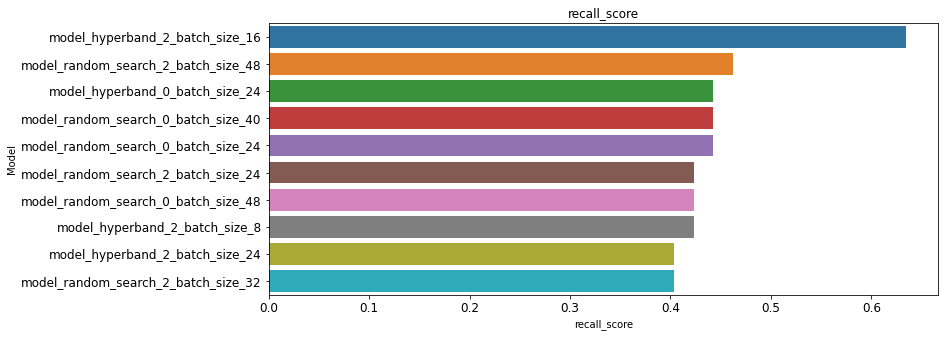

In [215]:
# We use recall score as a main metric, because data is imbalanced. We are not able to trust accuracy score.
results_plot("recall_score", model_results_df_ann)

## Results

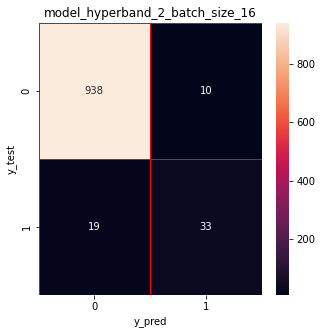

In [217]:
for model, cm in zip(models_ann_list, cm_ann_list):
    if (model == "model_hyperband_2_batch_size_16"):
        plot_cm(model, cm)

We trained 48 keras models with different optimizer and different batch size.

As you can see, the best model was trained with hyperband, RMSprop optimizer and 16 batch size.

The main goal of this project was to predict pump failure.
As shown on the confusion matrix above, there was only 10 times where model incorrectly predict the pump failure.